<a href="https://colab.research.google.com/github/Rochakr4/CAPSTONE-PROJECT-3--Cardiovascular-Risk-Prediction/blob/main/CAPSTONE_PROJECT_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [79]:
#libraries used in this project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import chi2
from scipy.stats import chi2, chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif

from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [80]:
#Mounting drive to google account
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

In [82]:
data_df.head()#how does the data set looklike

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [83]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [84]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [85]:
#Running describe function
data_df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [86]:
#Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

# NaN value handling

In [87]:
#Checking Nan Value count
data_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Nan value handling iam simple imputer("most_frequent") for categorical features and Knn imputer for numerical features.

In [88]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [89]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

In [90]:
data_df.groupby('TenYearCHD')['id'].count()

TenYearCHD
0    2879
1     511
Name: id, dtype: int64

# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





**Analysing each categorical feature with respect to each other :**

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

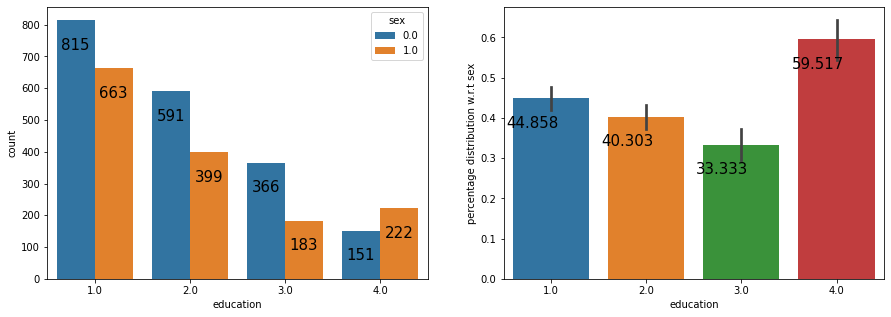

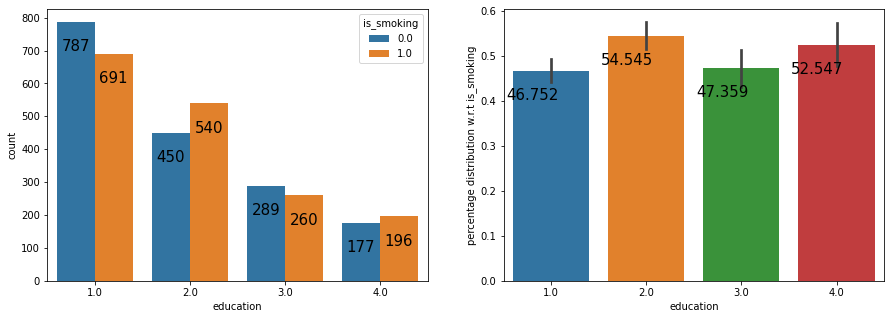

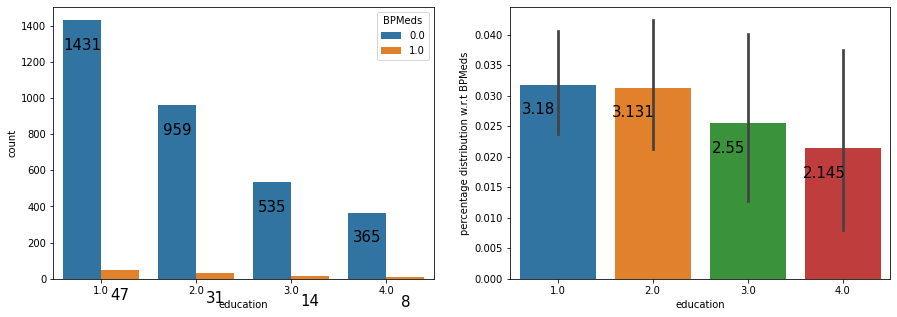

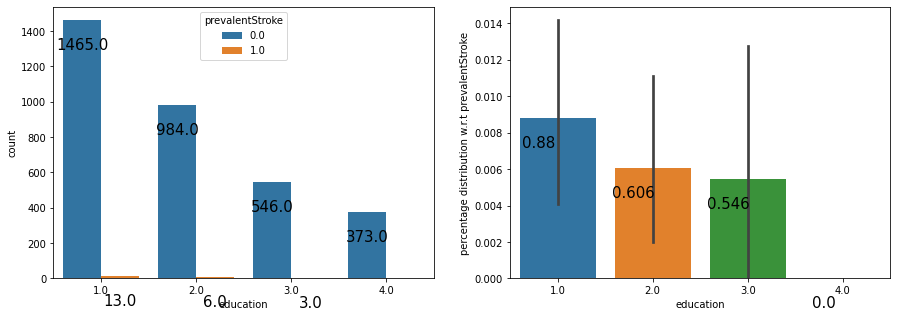

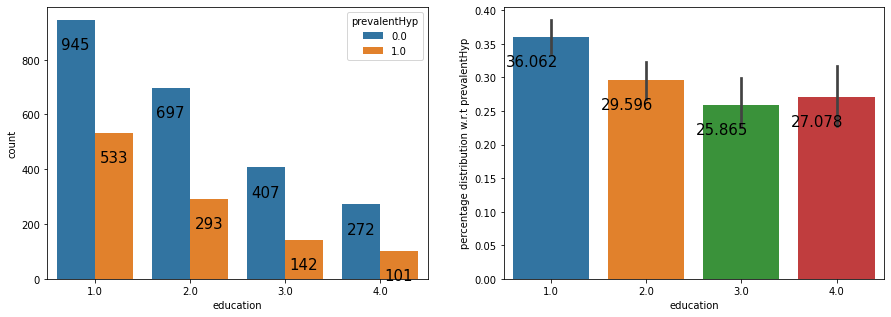

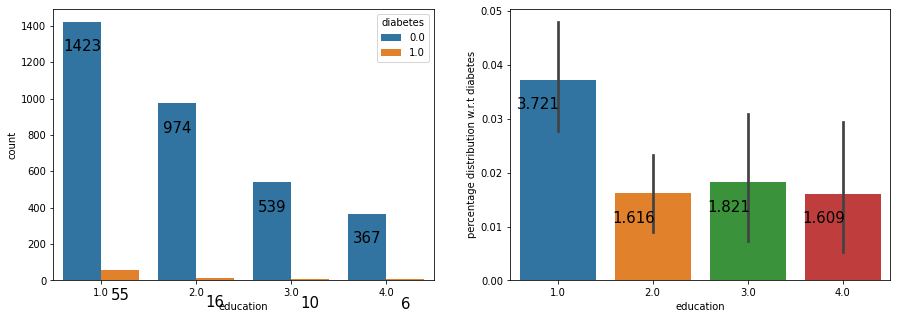

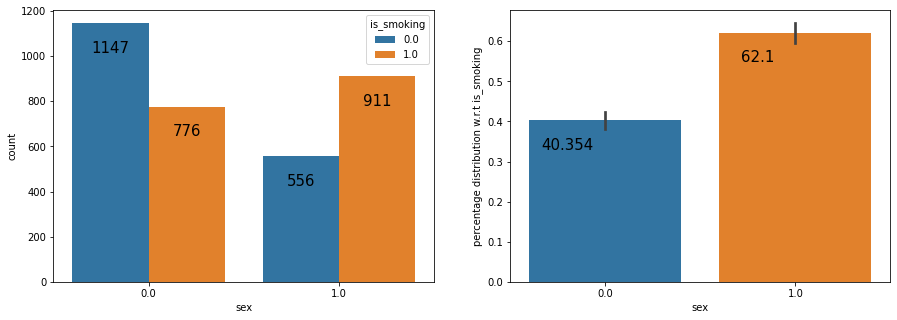

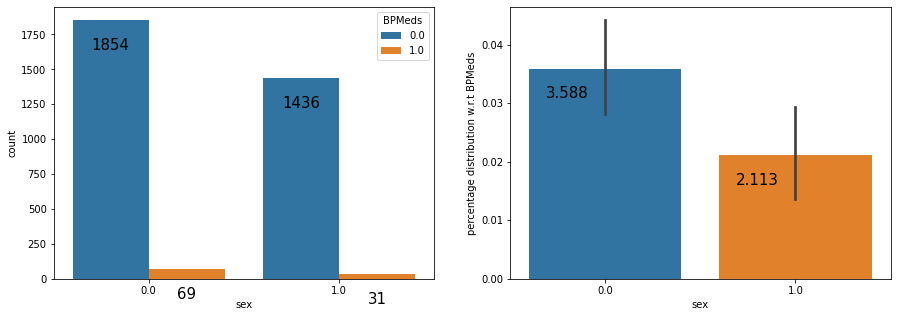

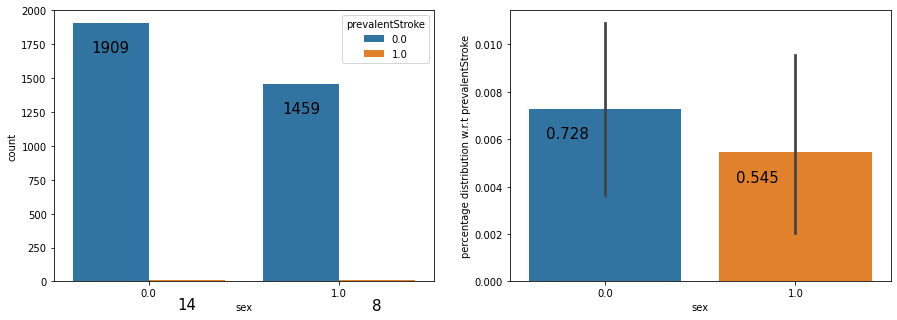

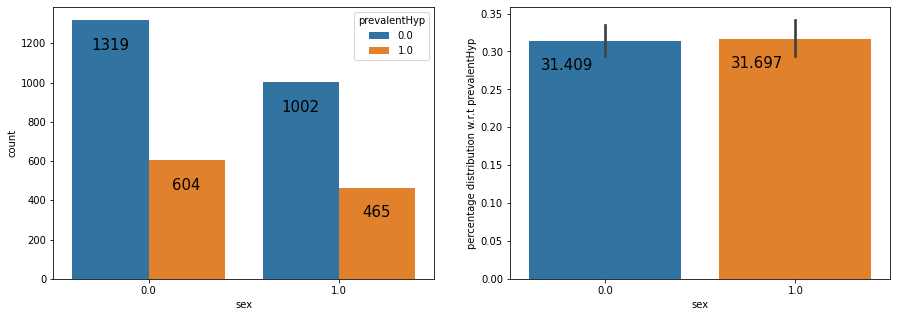

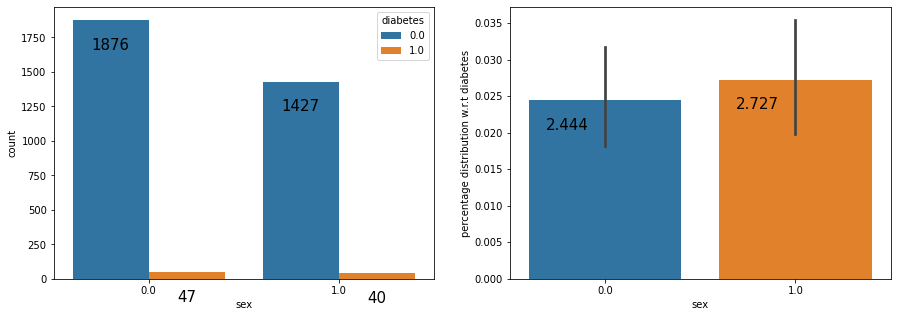

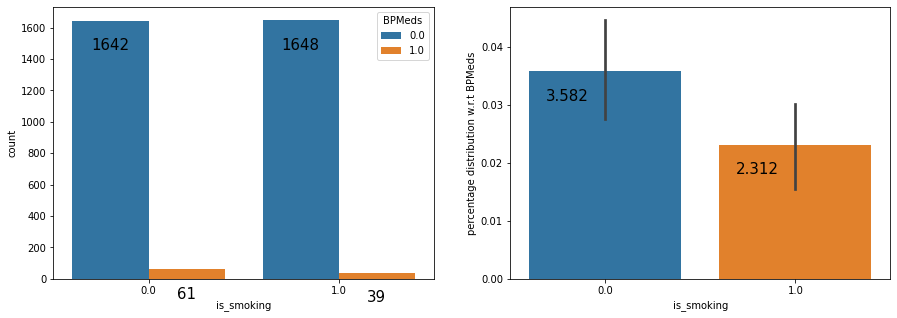

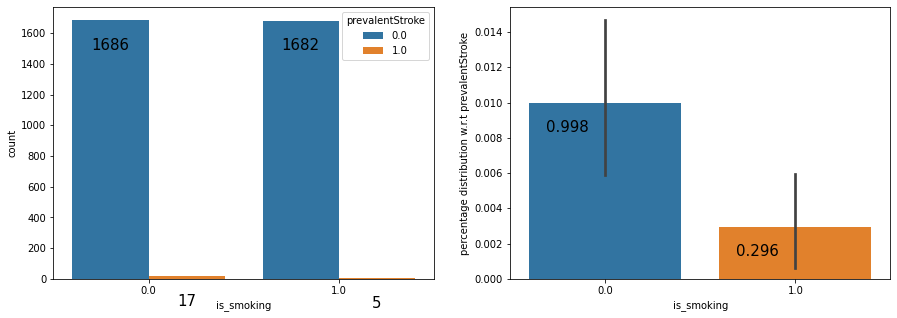

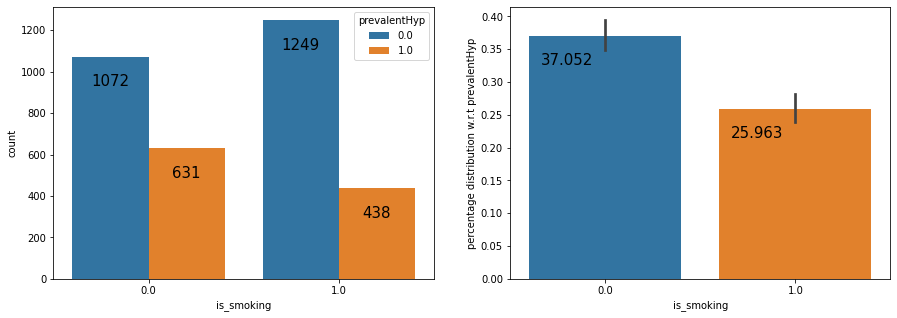

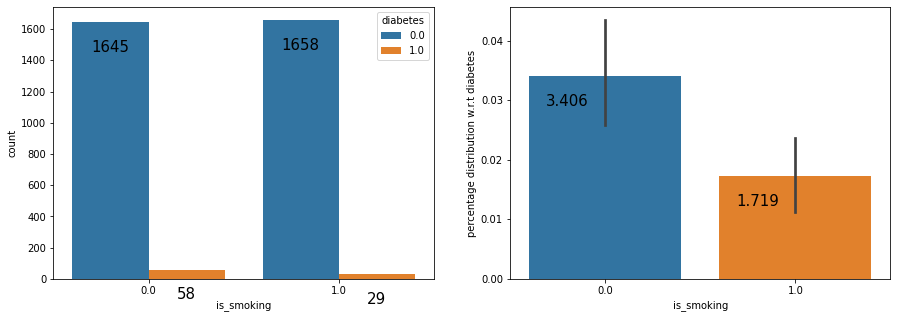

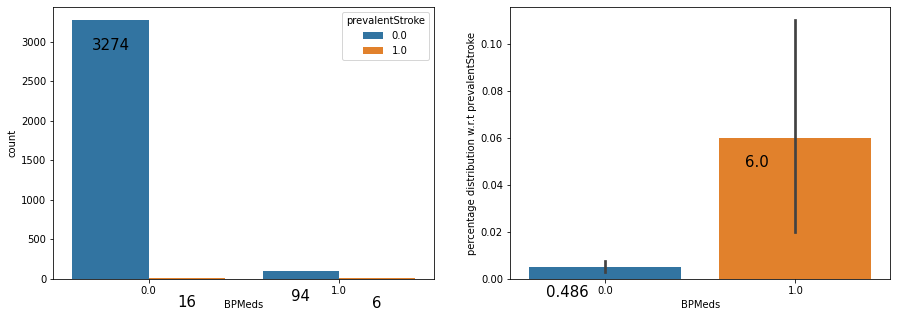

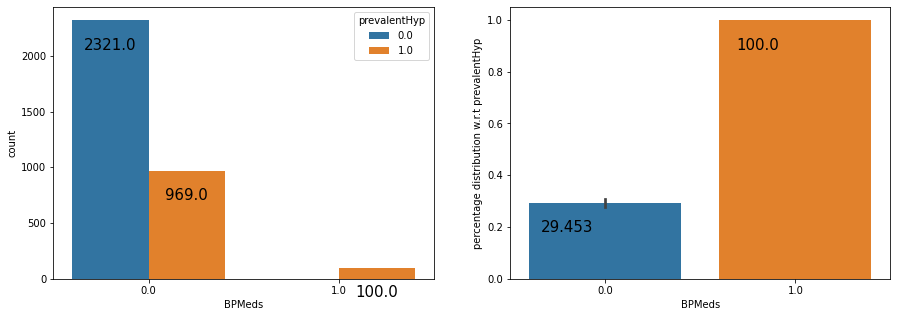

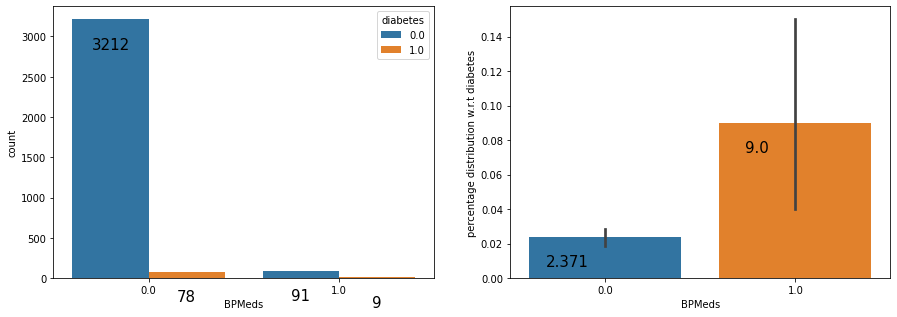

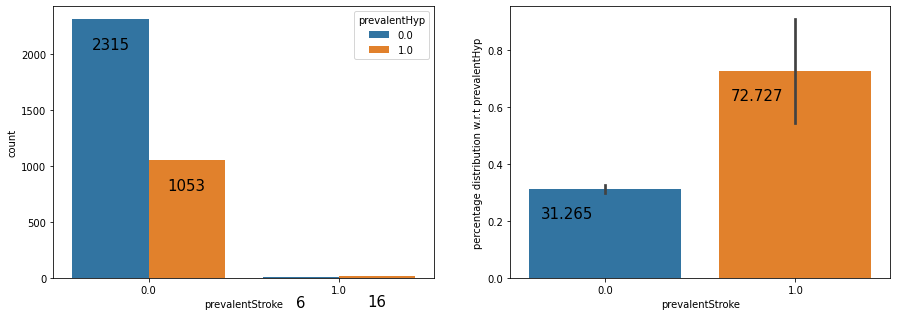

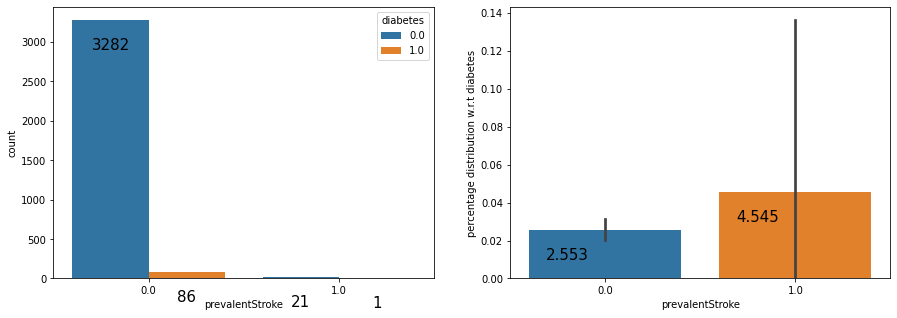

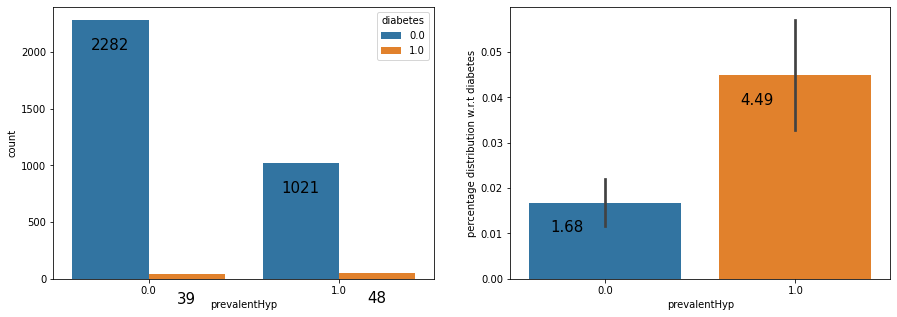

In [91]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   37% of non-smokers tend to have hypertension issues compared to 25% of smokers.
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance of 72% of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









**Categorical features with respect to target feature :**

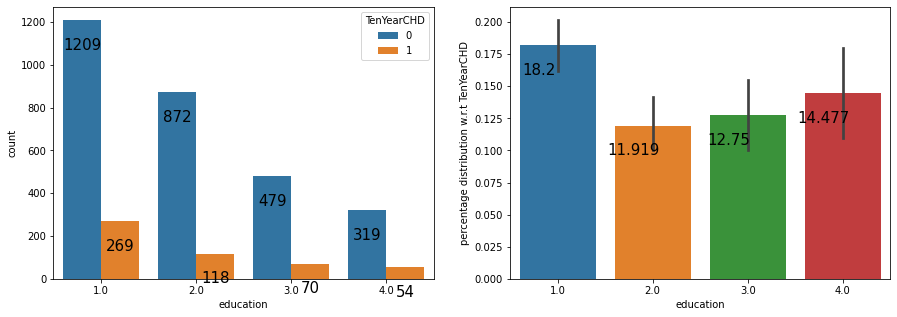

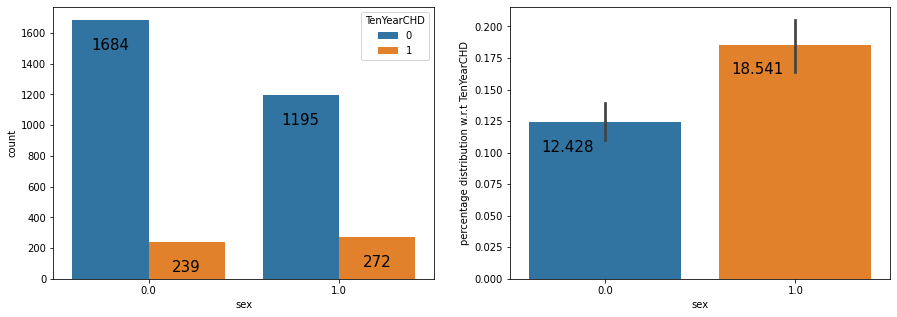

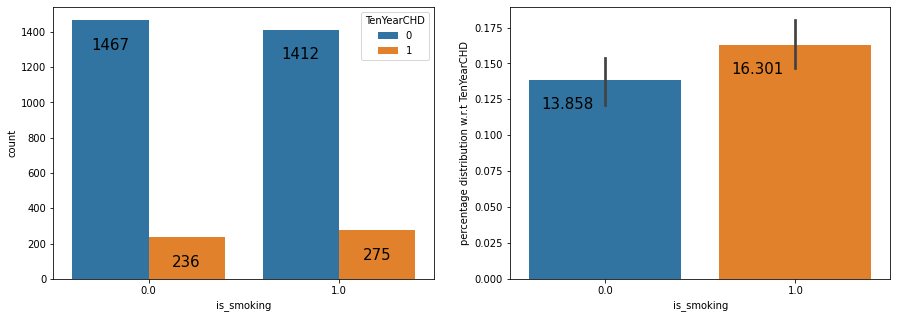

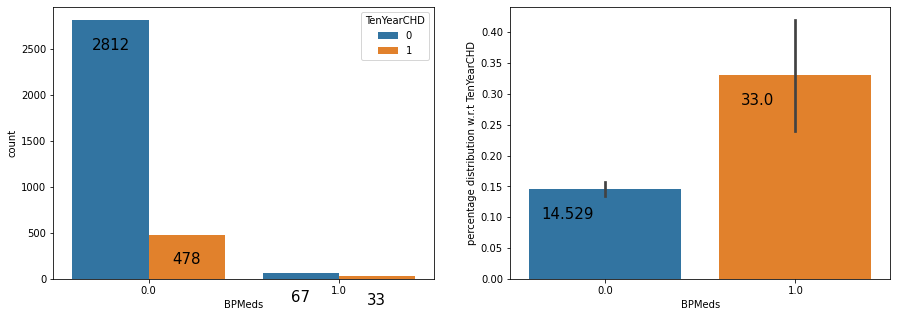

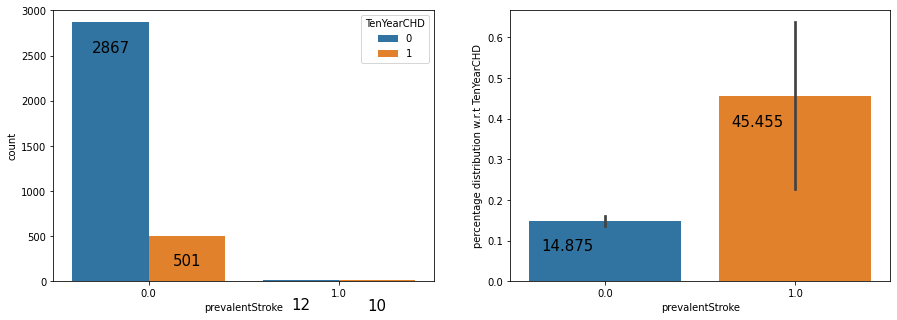

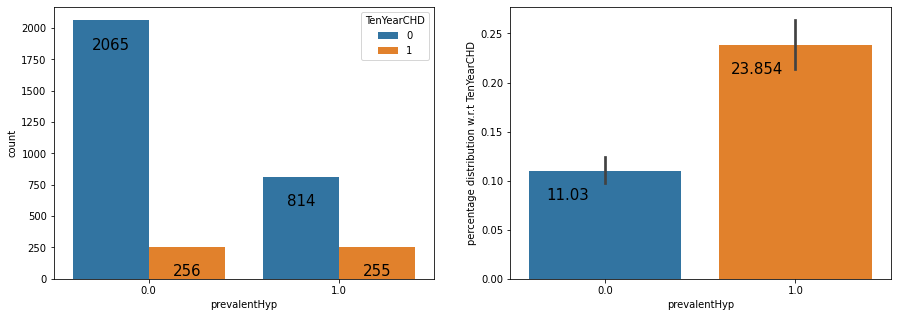

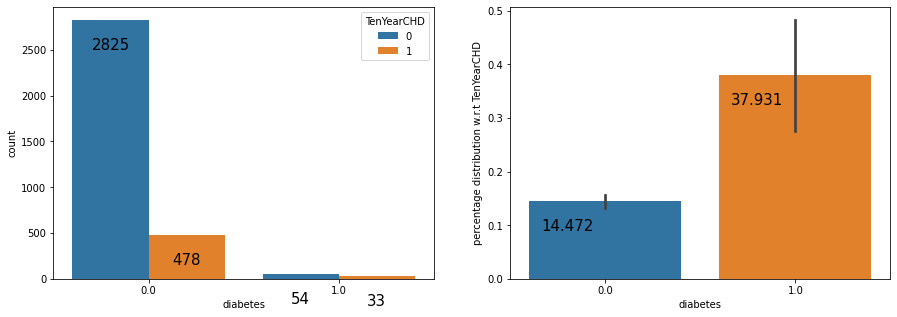

In [92]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



# Numerical features

**Analysis with respect to age :**

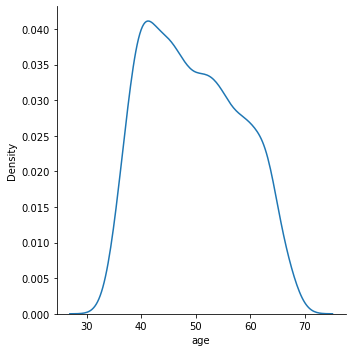

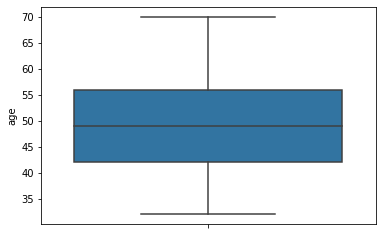

In [93]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='age', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='age')#boxplot for outlier analysis
plt.show()

REMARKS:

No outliers and good distribution is observed.

**Analysising age feature with respect to other categorical features :**

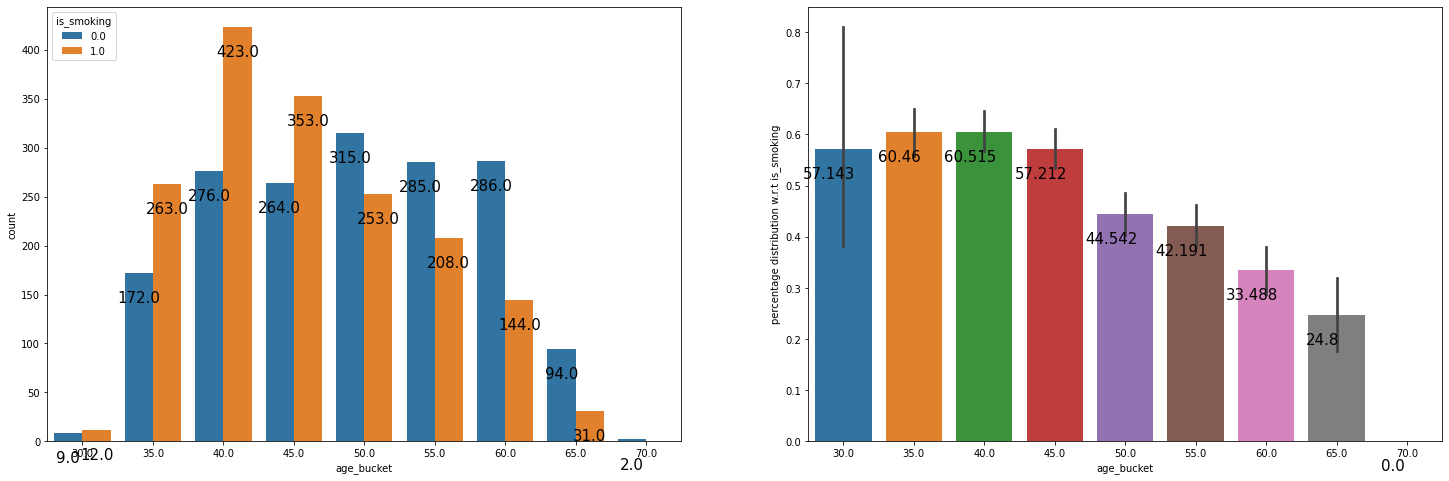

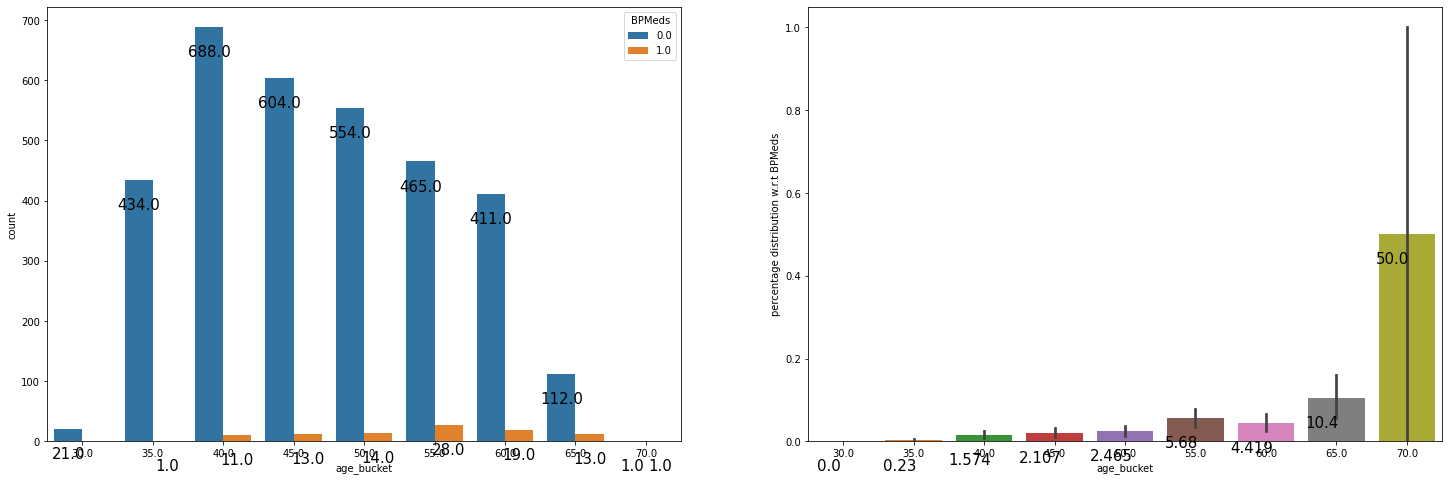

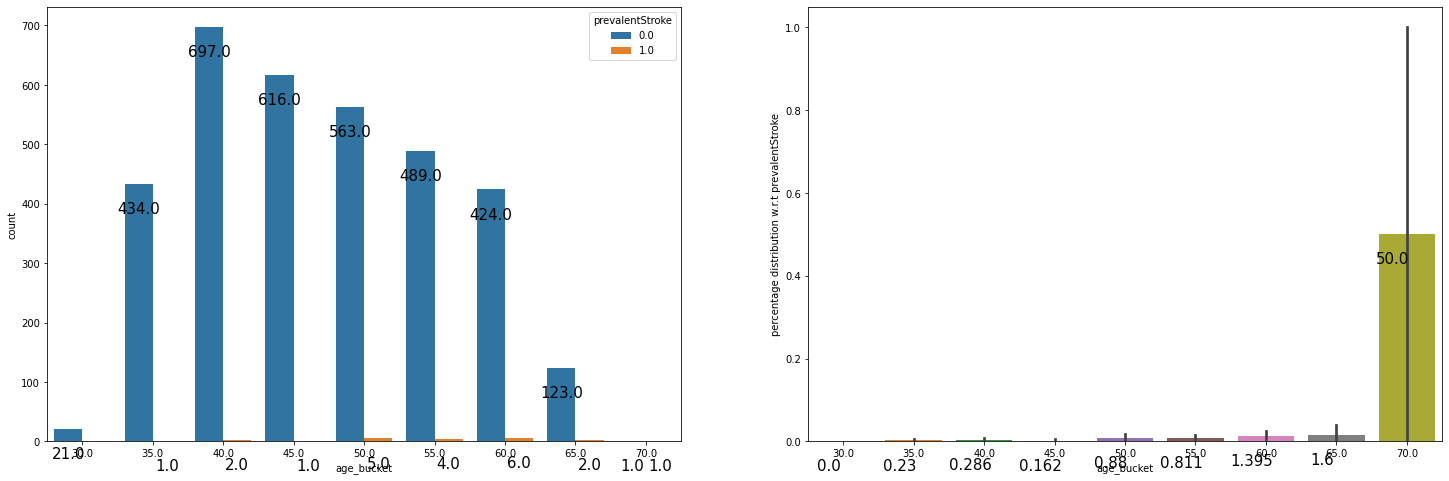

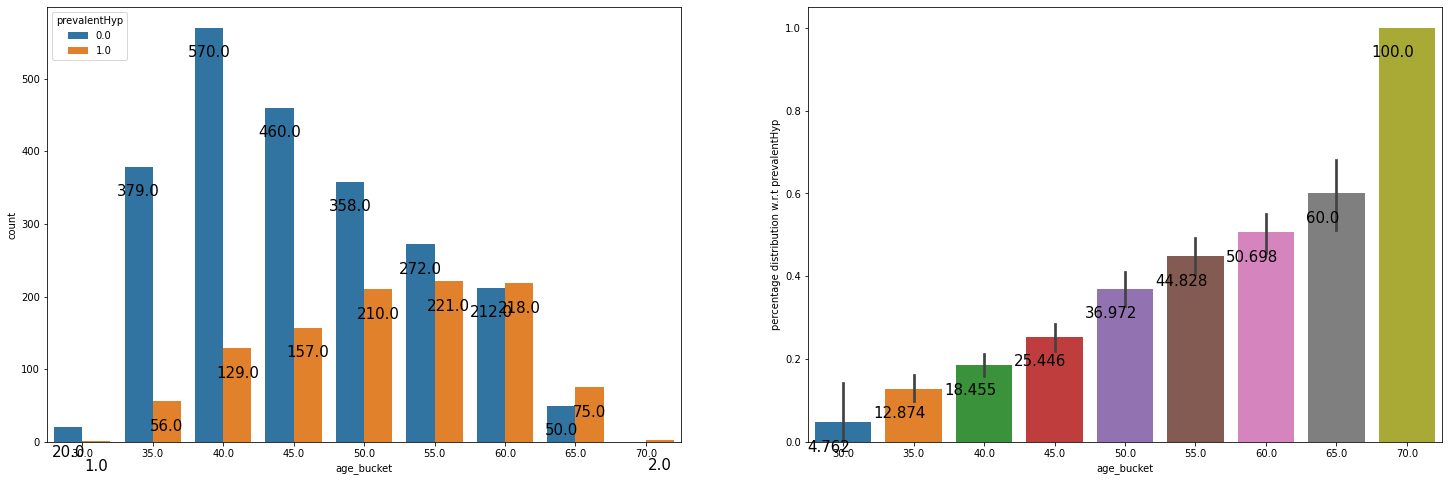

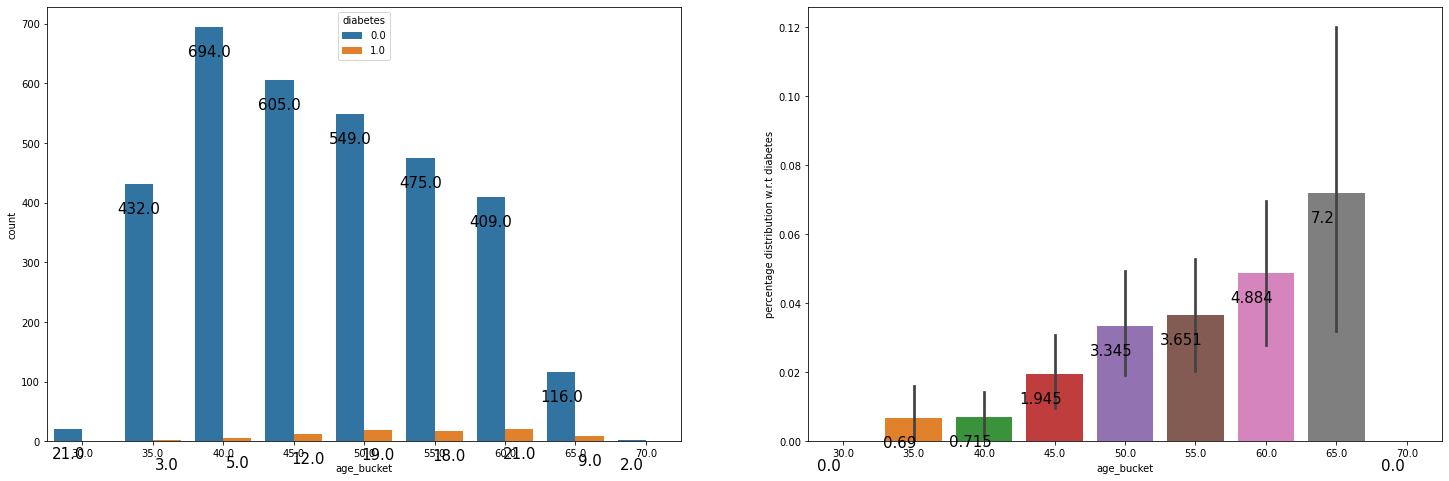

In [94]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.



**Analysis with respect to totChol :**

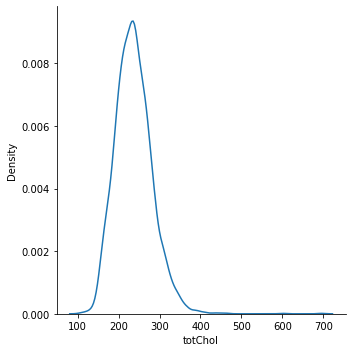

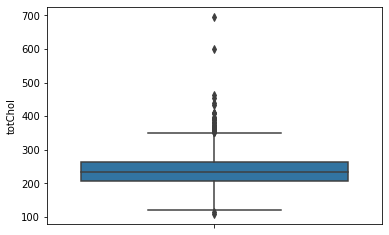

In [95]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='totChol', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='totChol')#boxplot for outlier analysis
plt.show()

Outliers are observed in totChol feature.So, in order to handle those outliers IQR method is implemented.

In [96]:
#Implementing IQR method 
vals = data_df.totChol.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['totChol'] = data_df['totChol'].apply(lambda x : min_lim if x < min_lim else x)
data_df['totChol'] = data_df['totChol'].apply(lambda x : max_lim if x > max_lim else x)

0.25    206.0
0.75    264.0
Name: totChol, dtype: float64


**Analysising totChol feature with respect to other categorical features :**

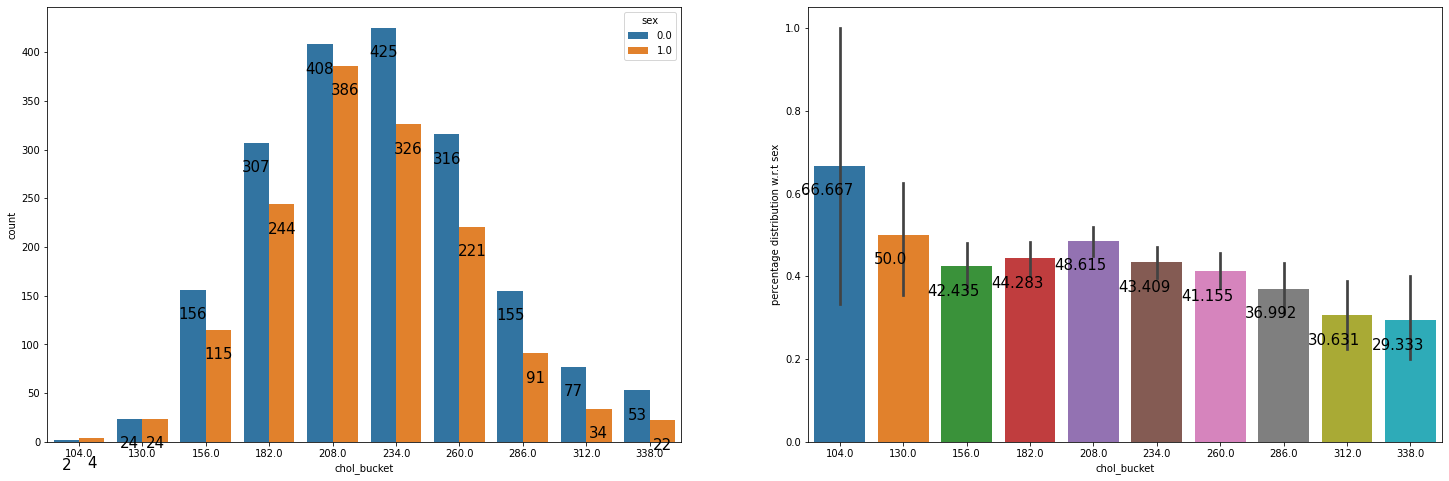

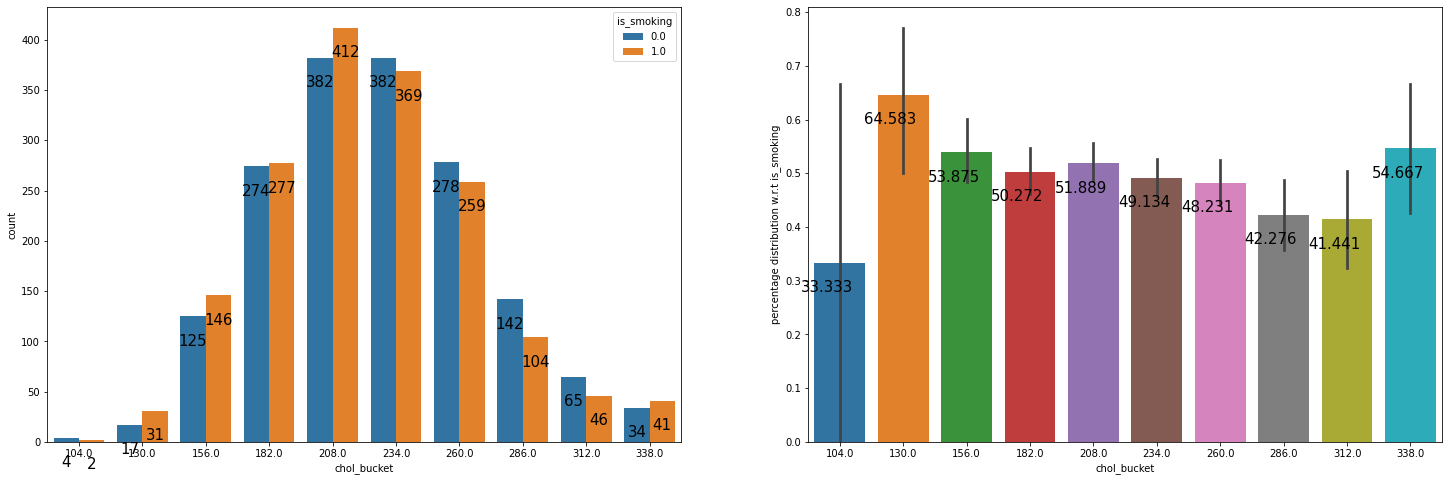

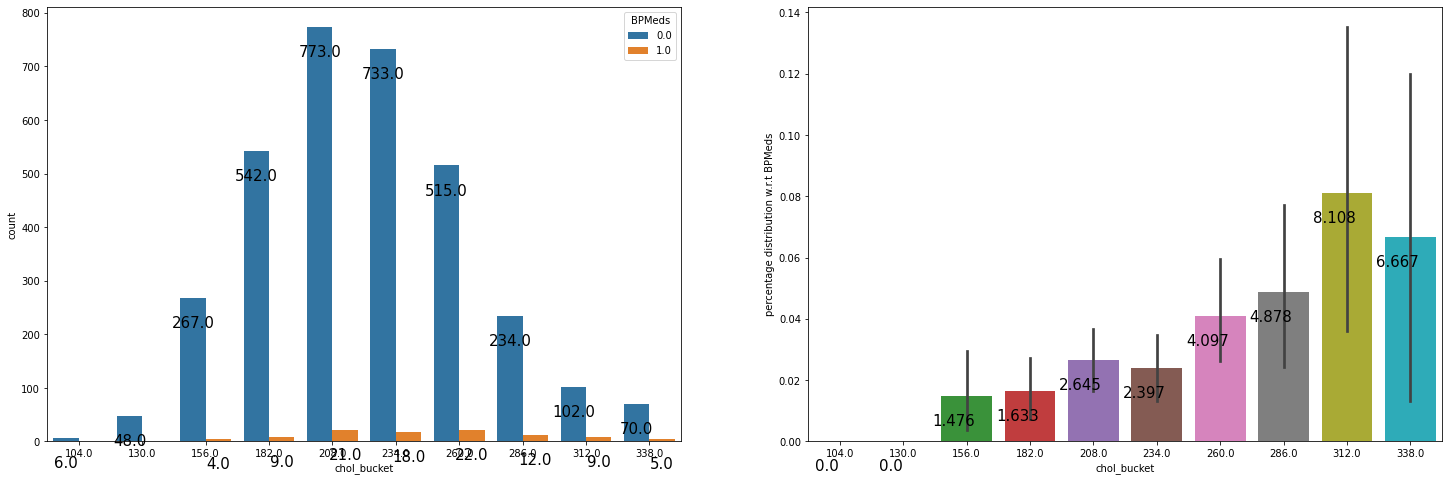

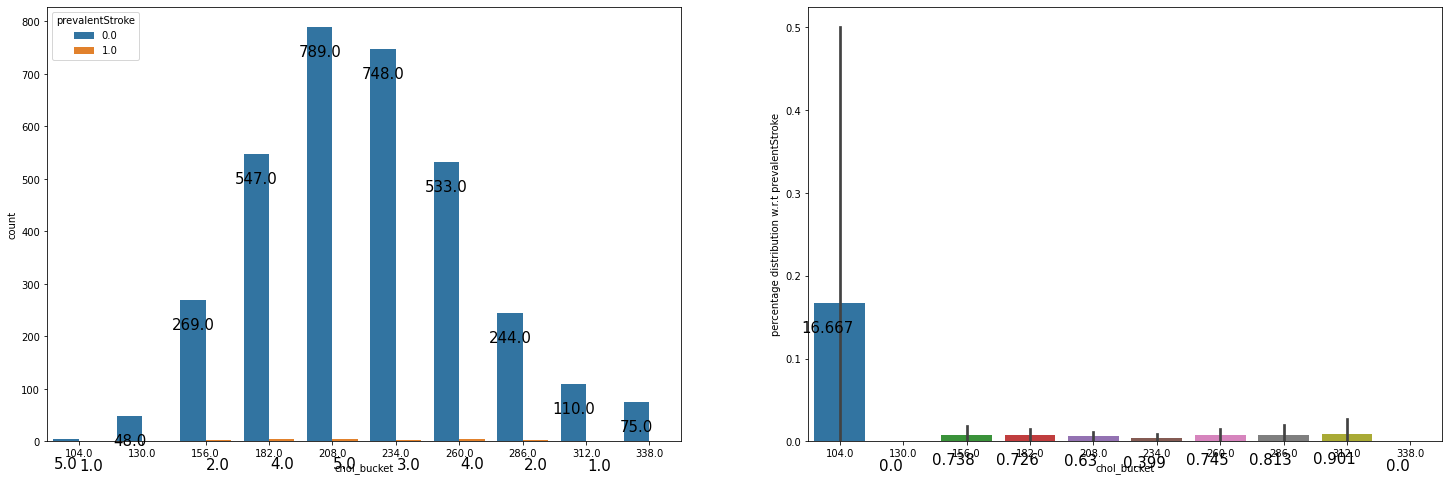

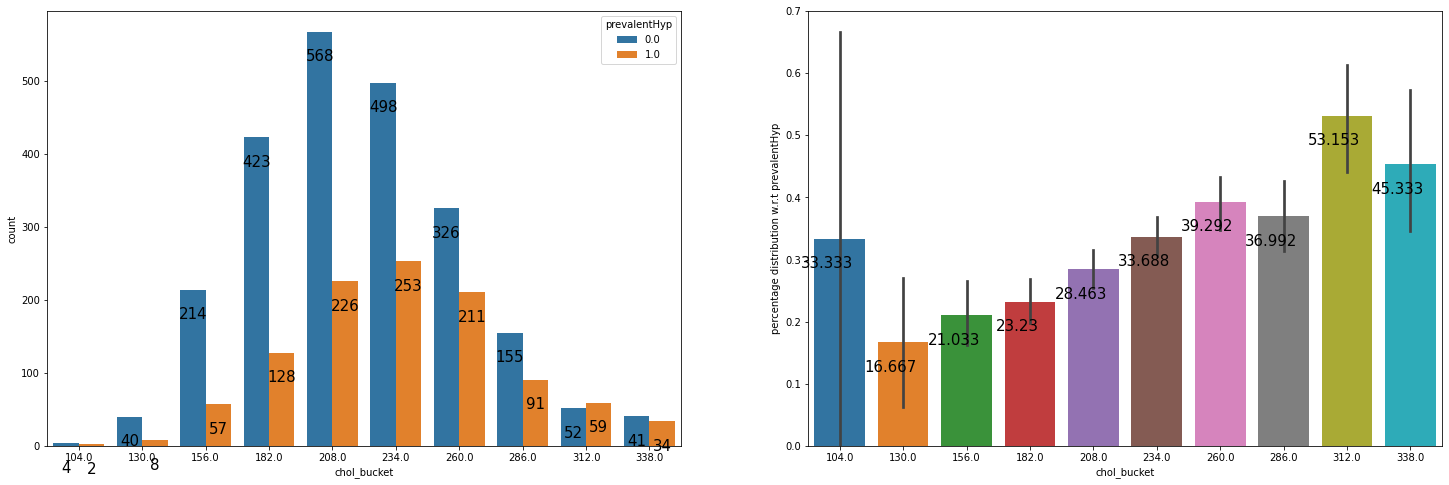

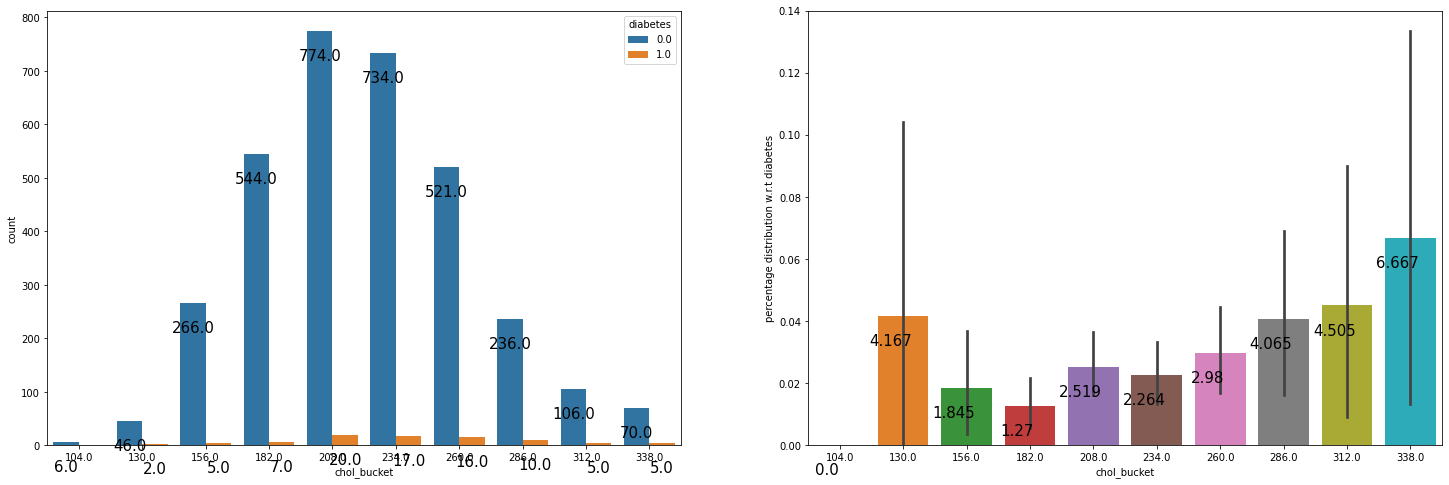

In [97]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels



**Analysis with respect to cigsPerDay**

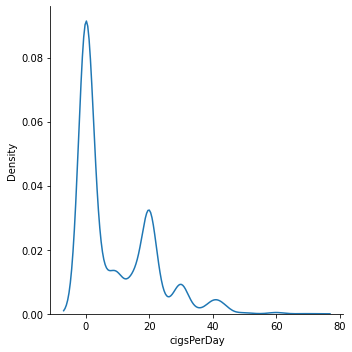

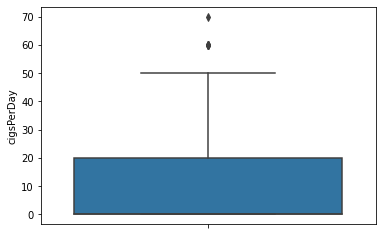

In [98]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='cigsPerDay', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='cigsPerDay')#boxplot for outlier analysis
plt.show()

Outliers are observed in cigsPerDay feature.So, in order to handle those outliers IQR method is implemented.

In [99]:
#Implementing IQR method 
vals = data_df.cigsPerDay.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : min_lim if x < min_lim else x)
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : max_lim if x > max_lim else x)

0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64


**Analysising cigsPerDay feature with respect to other categorical features :**

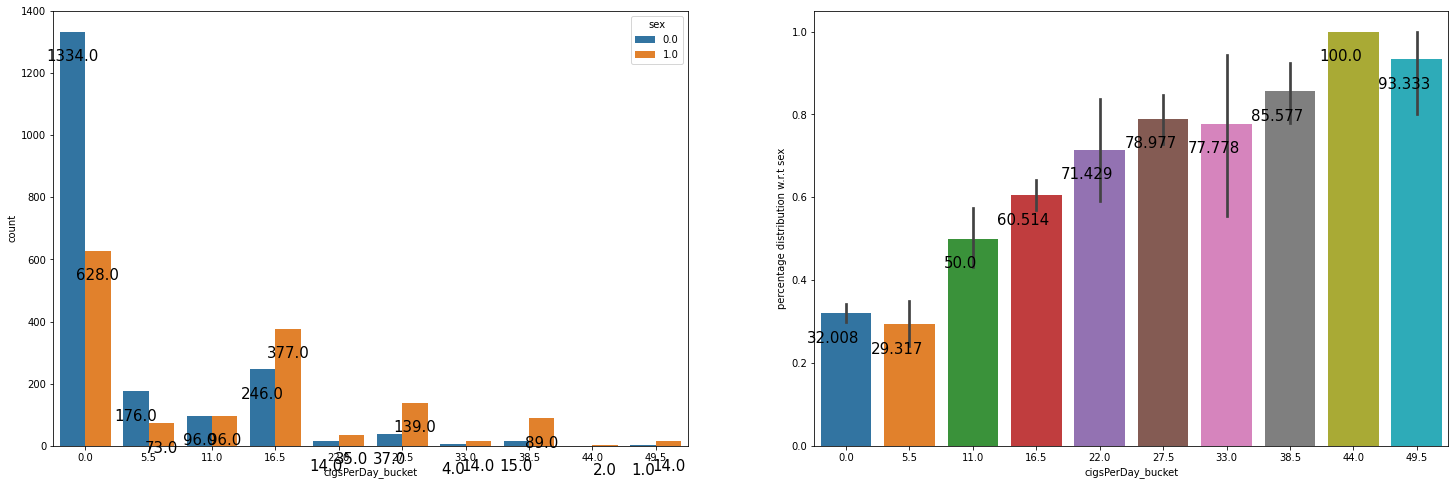

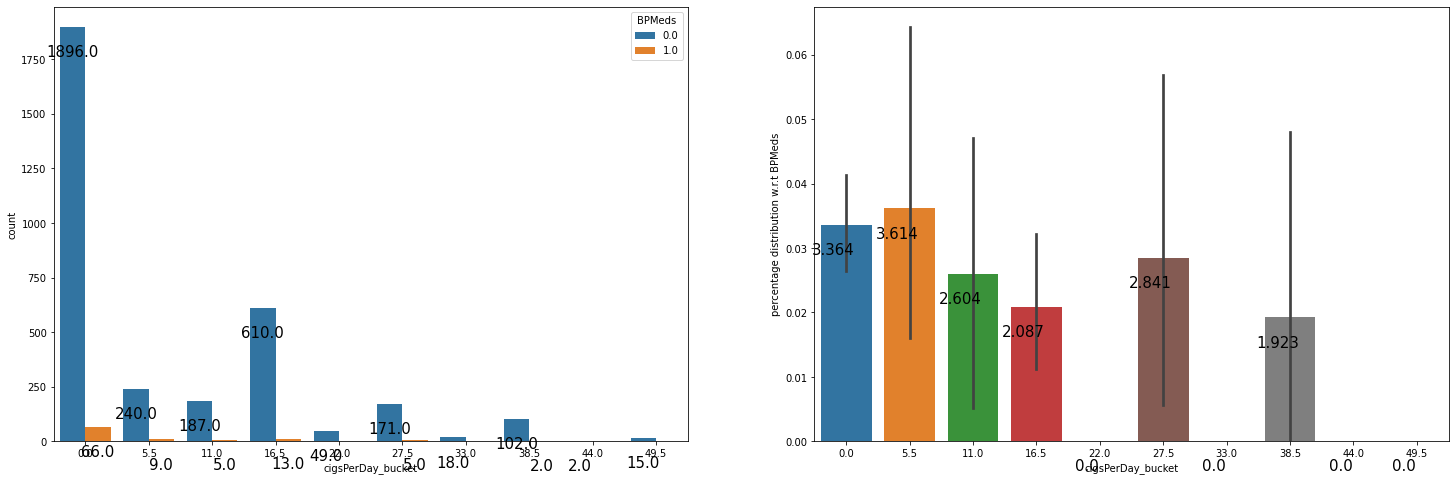

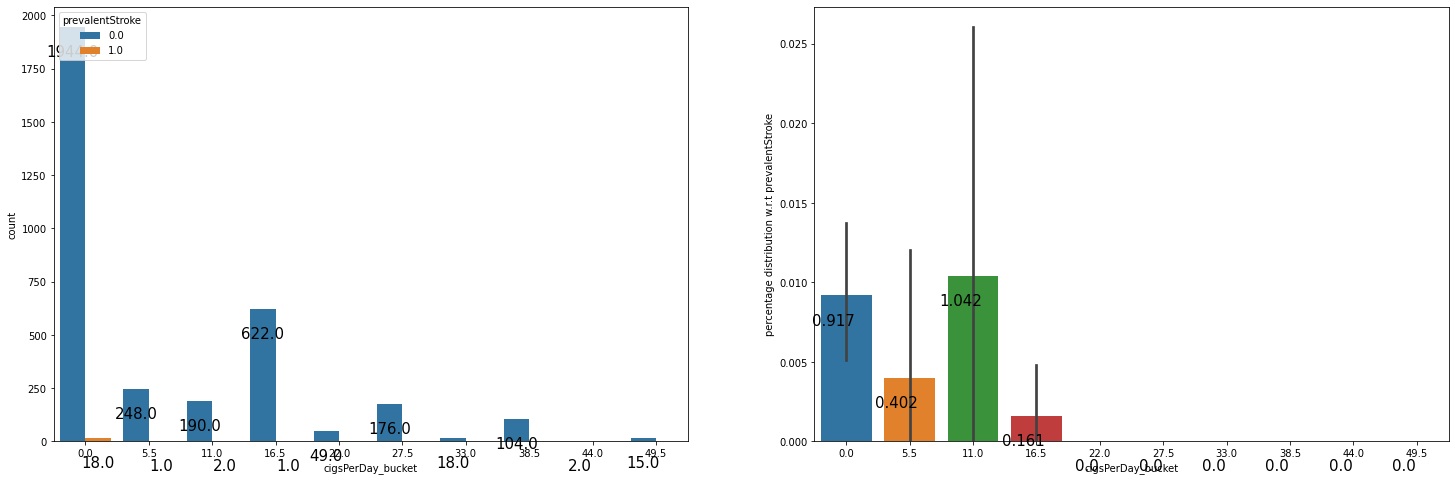

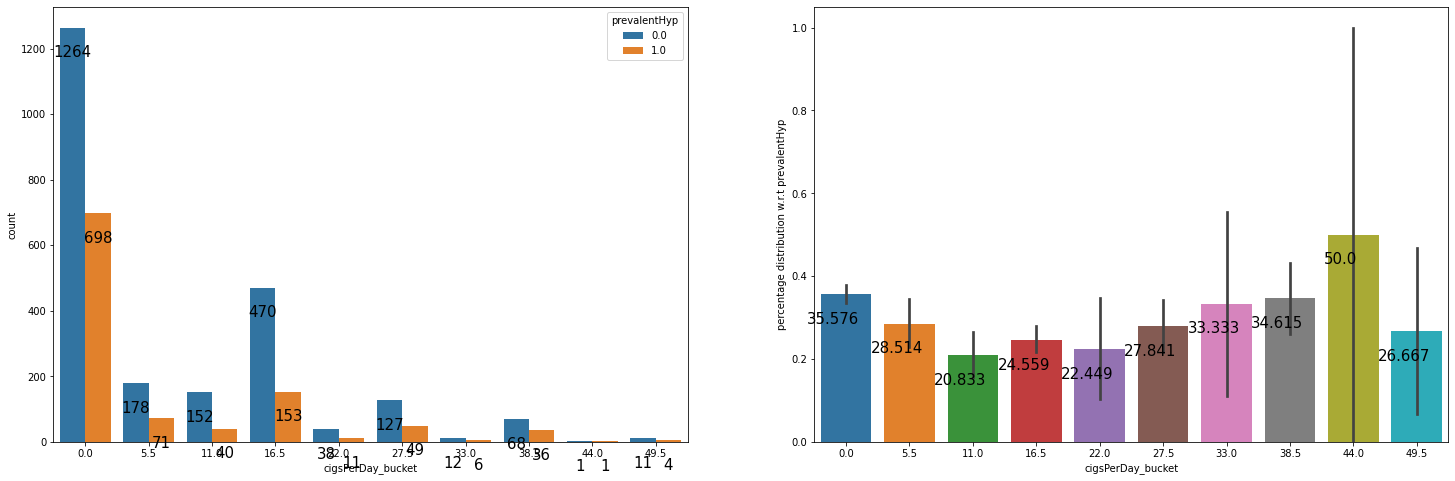

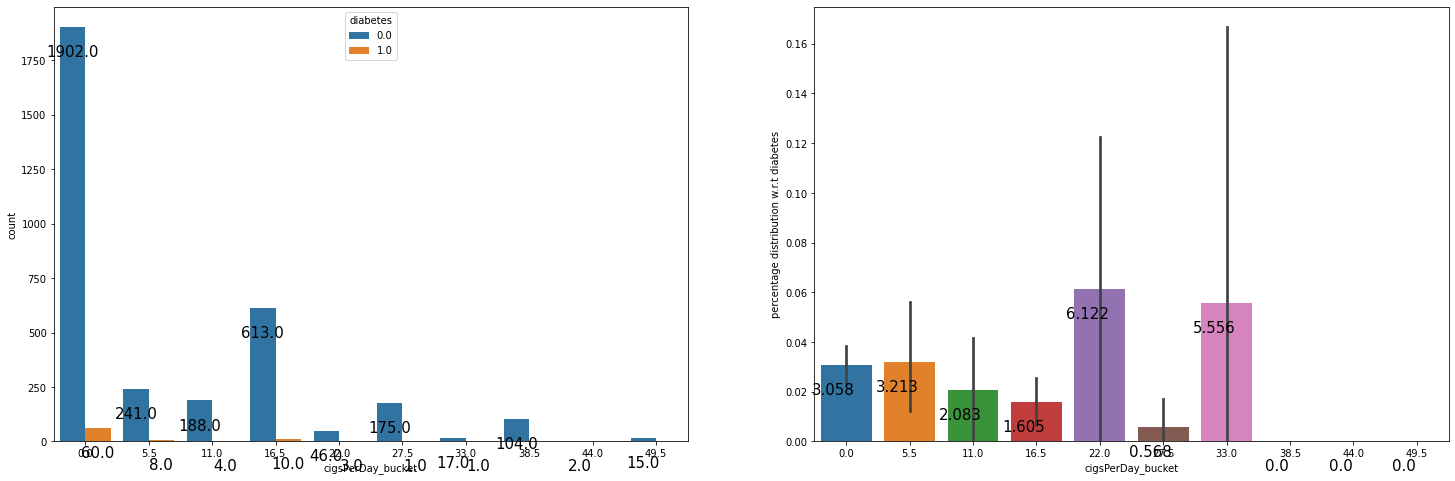

In [100]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   Males tend to smoke more cigarettes compared to females.



**Analysis with respect to sysBP :**

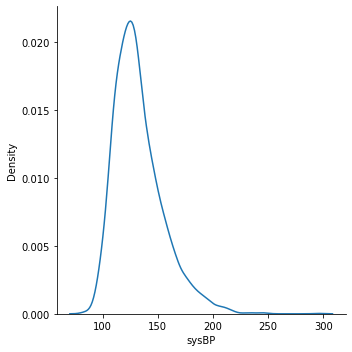

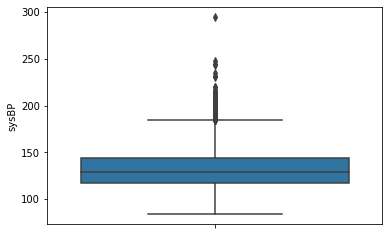

In [101]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='sysBP', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='sysBP')#boxplot for outlier analysis
plt.show()

Outliers are observed in sysBP feature.So, in order to handle those outliers IQR method is implemented.

In [102]:
#Implementing IQR method 
vals = data_df.sysBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    117.0
0.75    144.0
Name: sysBP, dtype: float64


**Analysising sysBP feature with respect to other categorical features :**

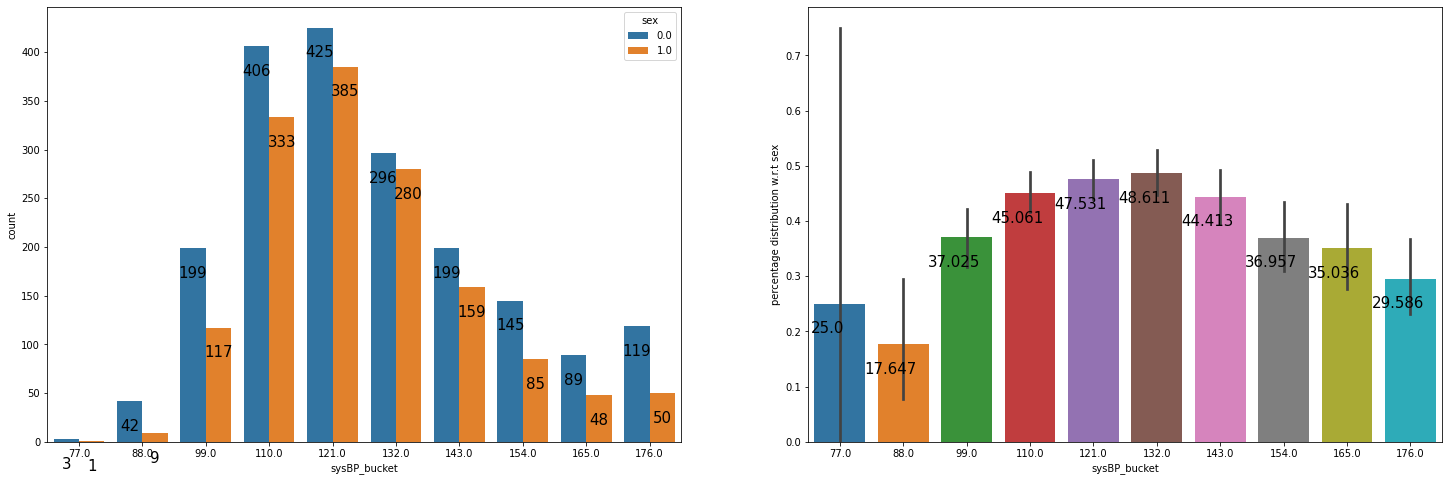

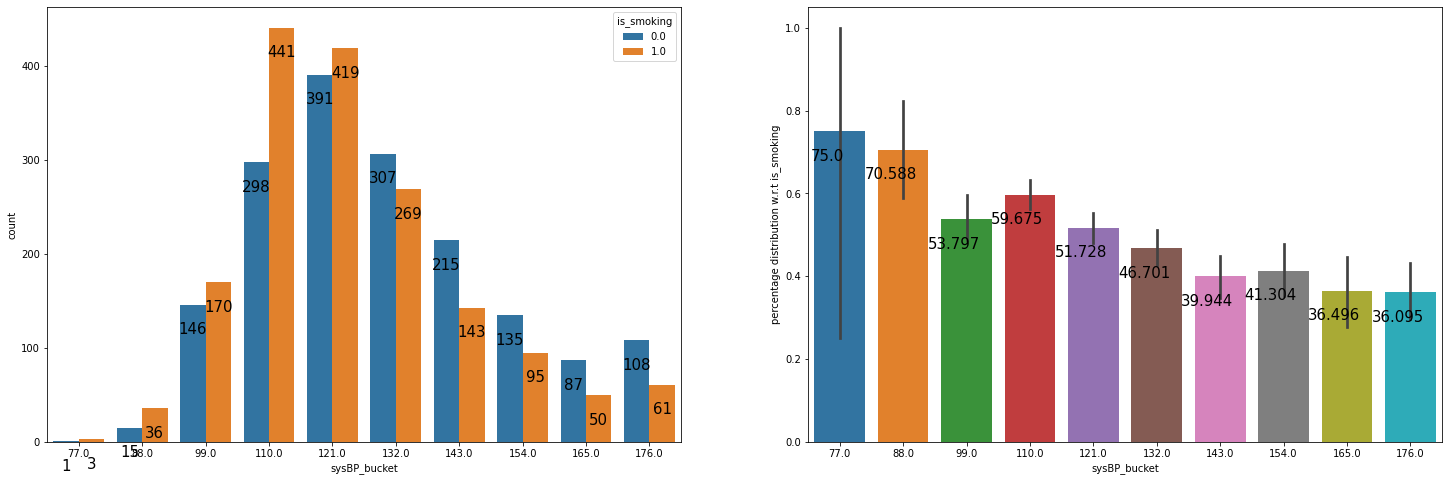

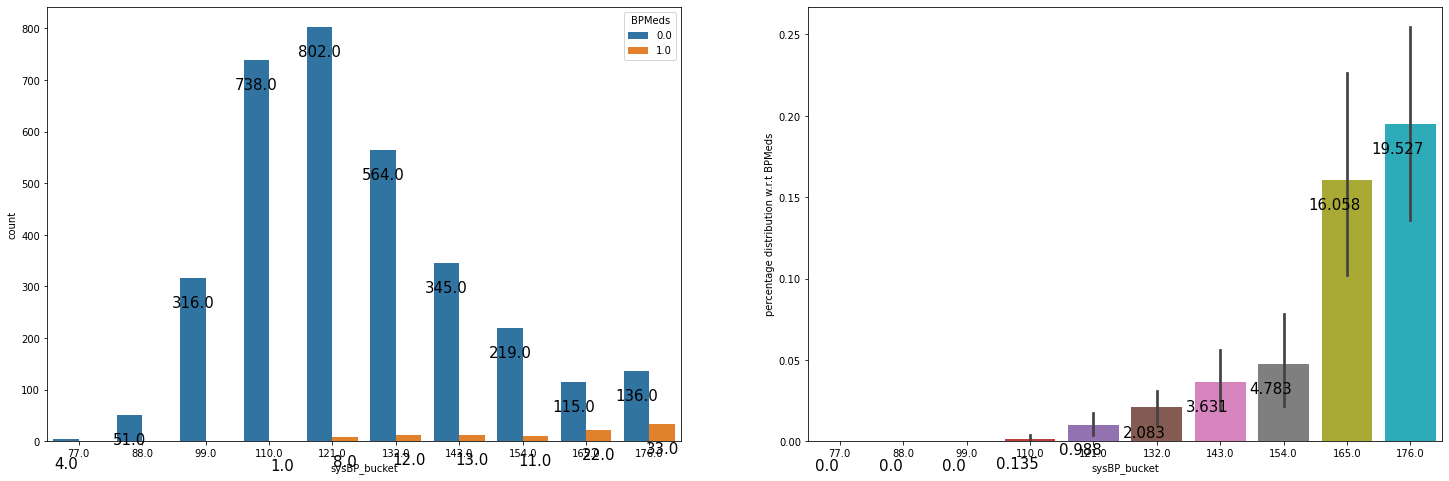

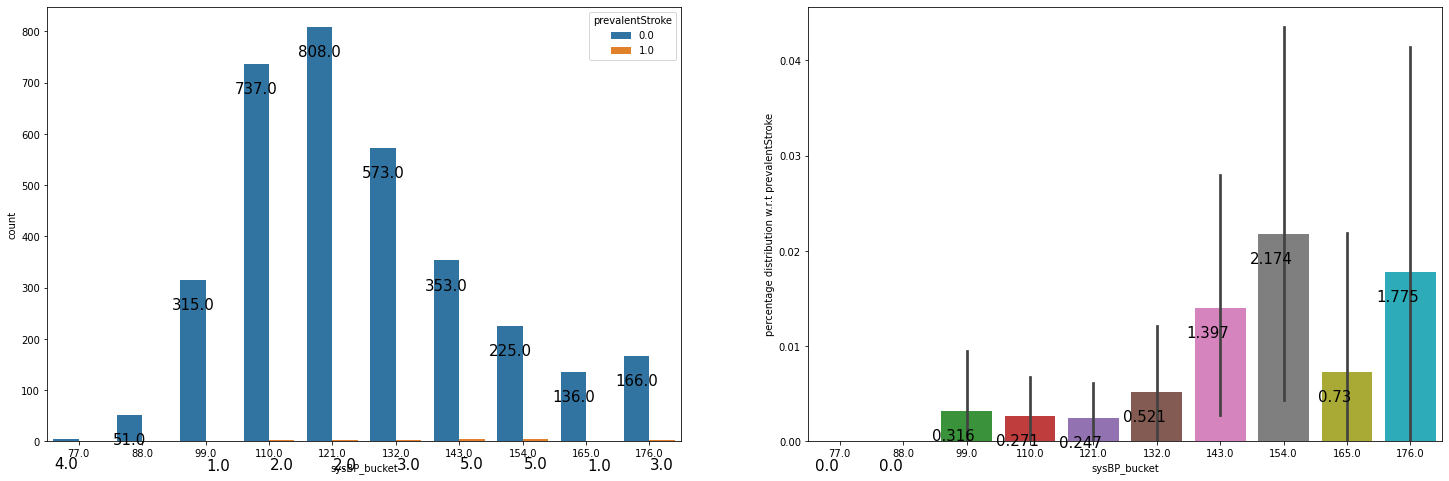

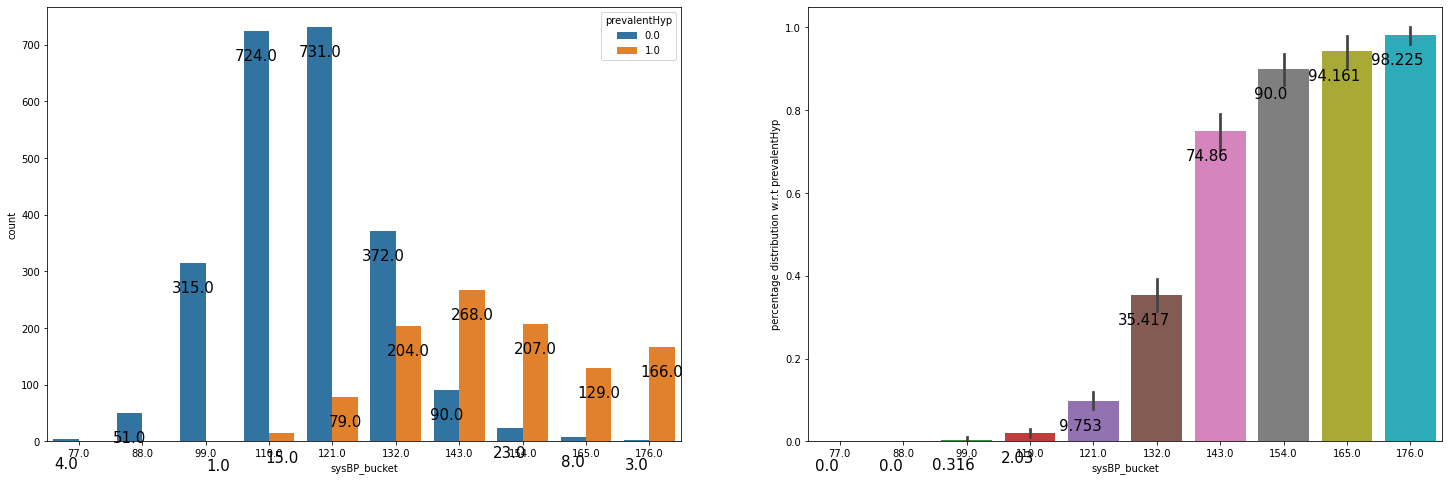

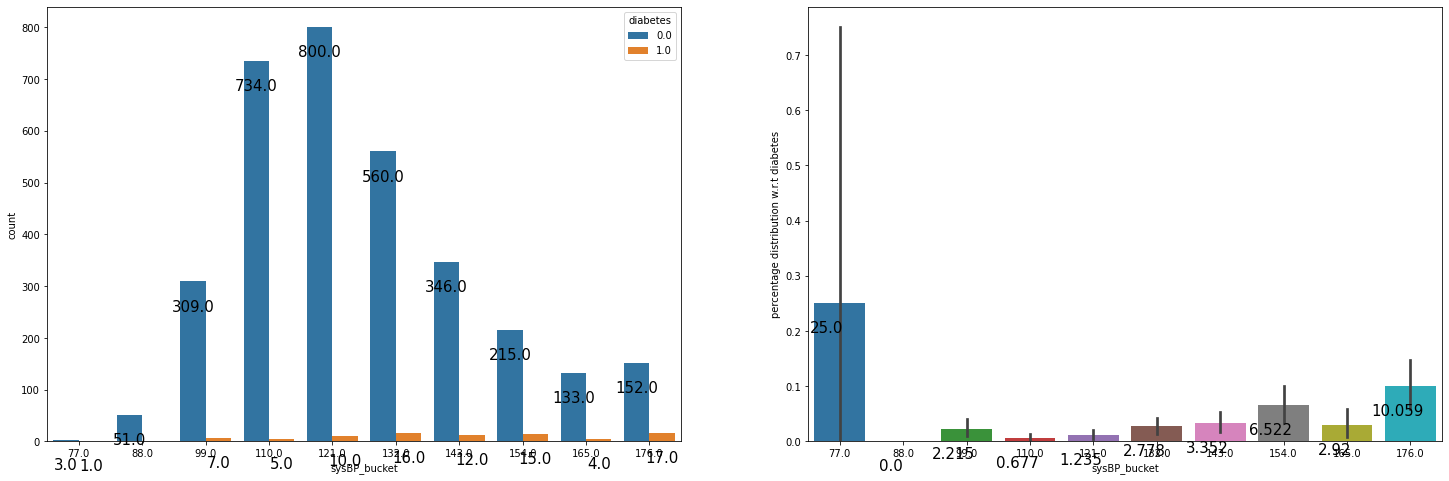

In [103]:
#For better further analysis binning is implemented on age feature
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   SysBp tends to be low for smokers.
*   SysBp tends to be high for people with BP medication and hypertension issues.




**Analysis with respect to diaBP**

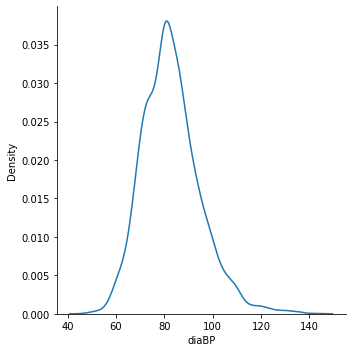

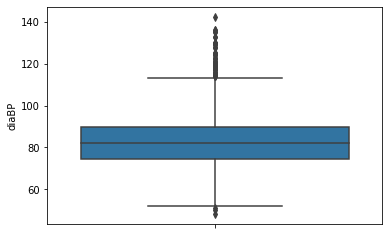

In [104]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='diaBP', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='diaBP')#boxplot for outlier analysis
plt.show()

Outliers are observed in diaBP feature.So, in order to handle those outliers IQR method is implemented.

In [105]:
#Implementing IQR method 
vals = data_df.diaBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr

#Assigning those outliers with min and max values
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    74.5
0.75    90.0
Name: diaBP, dtype: float64


**Analysising diaBP feature with respect to other categorical features :**

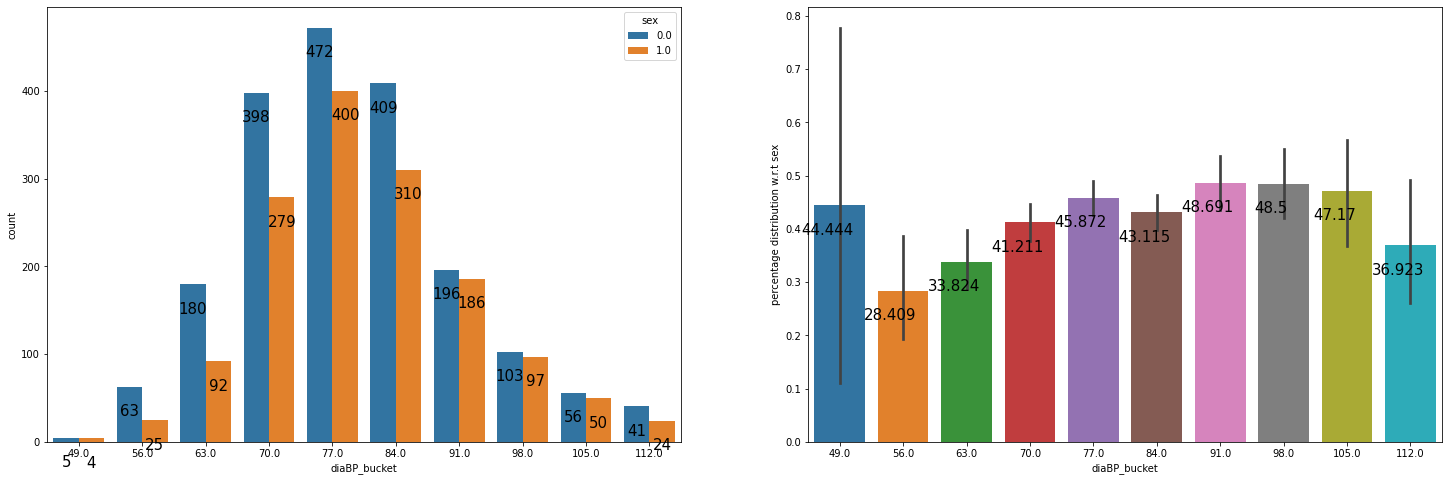

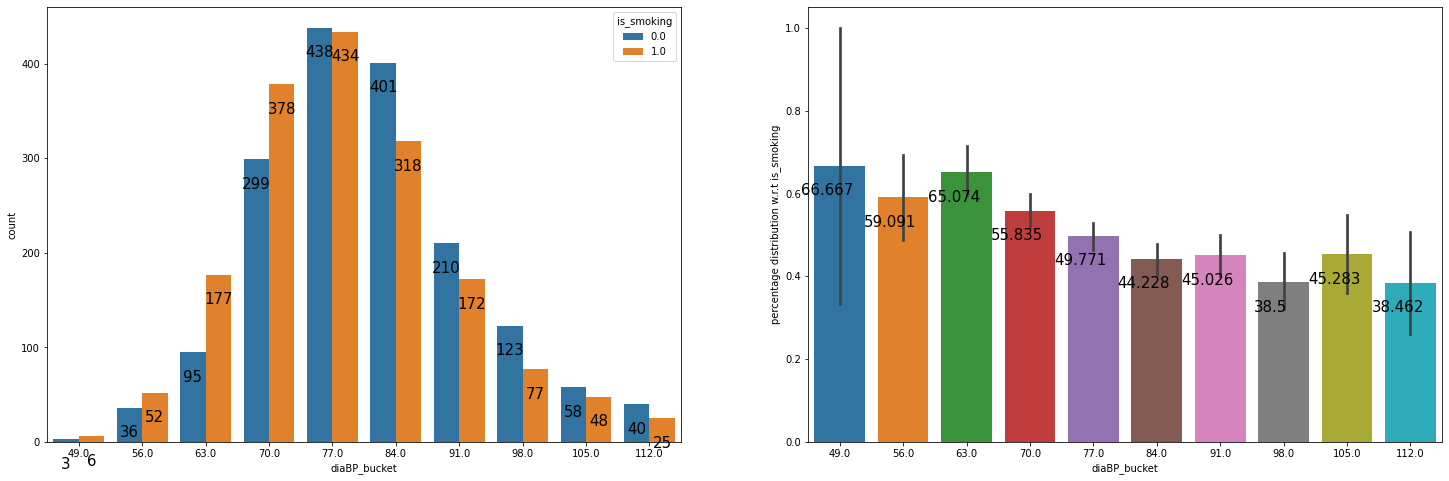

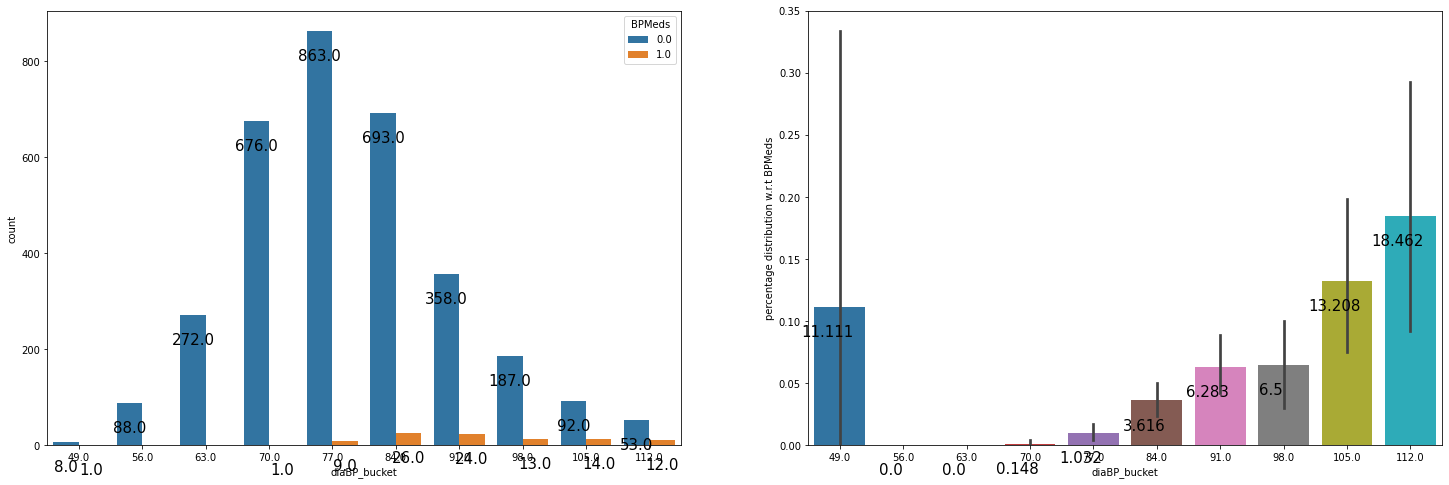

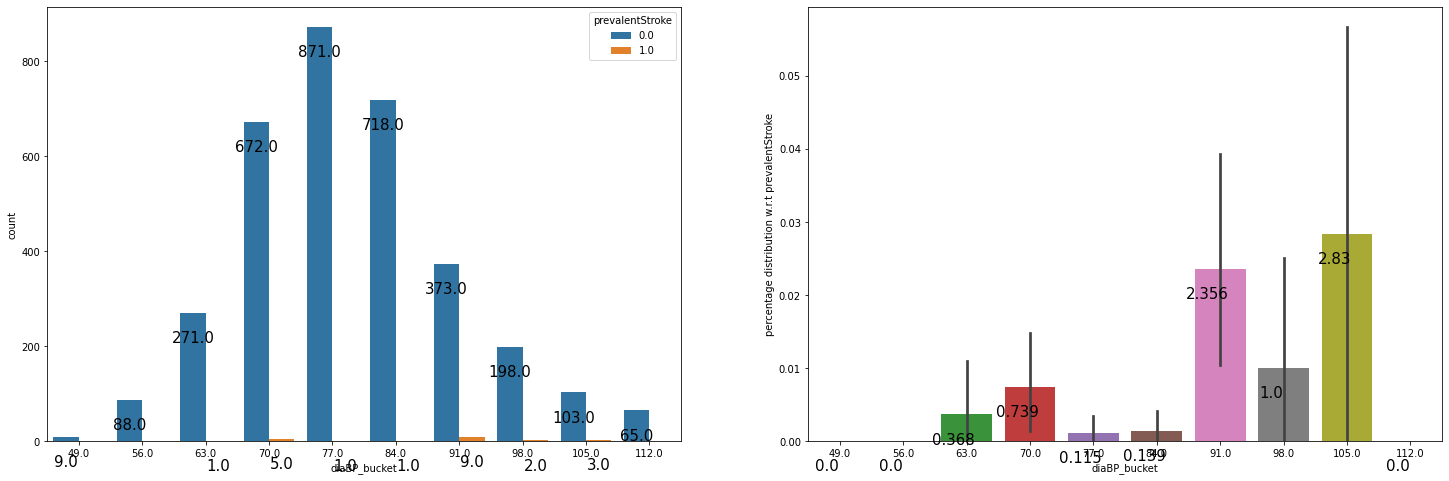

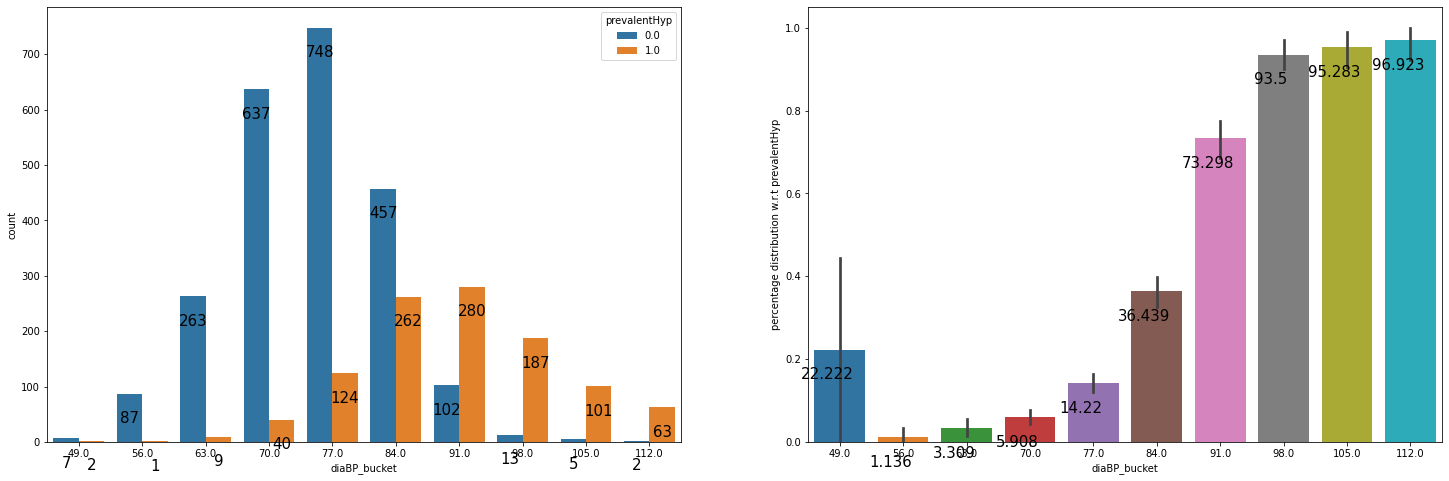

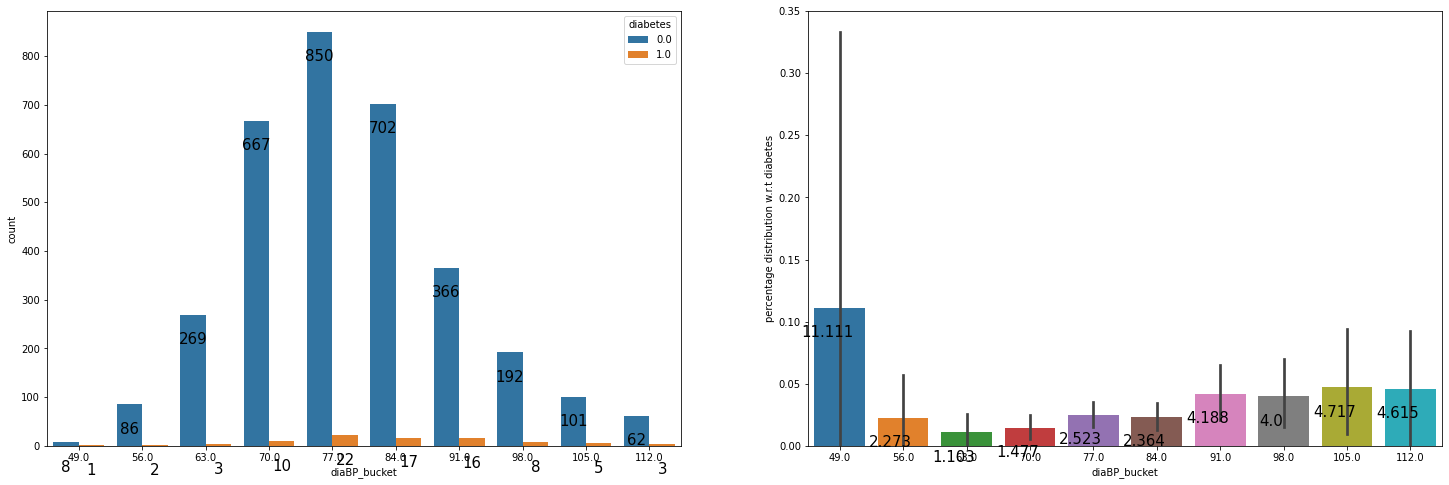

In [106]:
#For better further analysis binning is implemented on age feature
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   DiaBp tends to be low for smokers.
*   DiaBp tends to be high for people with BP medication and hypertension issues.



**Analysis with respect to BMI**

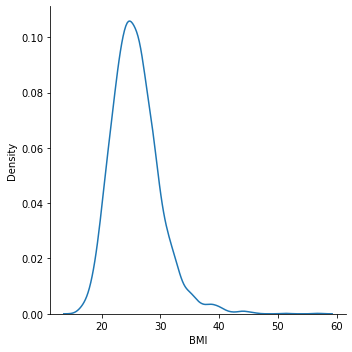

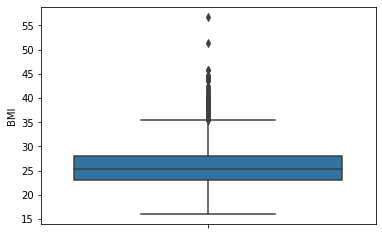

In [107]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='BMI', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='BMI')#boxplot for outlier analysis
plt.show()

Outliers are observed in diaBP feature.So, in order to handle those outliers IQR method is implemented.

In [108]:
#Implementing IQR method 
vals = data_df.BMI.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr

#Assigning those outliers with min and max values
data_df['BMI'] = data_df['BMI'].apply(lambda x : min_lim if x < min_lim else x)
data_df['BMI'] = data_df['BMI'].apply(lambda x : max_lim if x > max_lim else x)

0.25    23.0300
0.75    27.9975
Name: BMI, dtype: float64


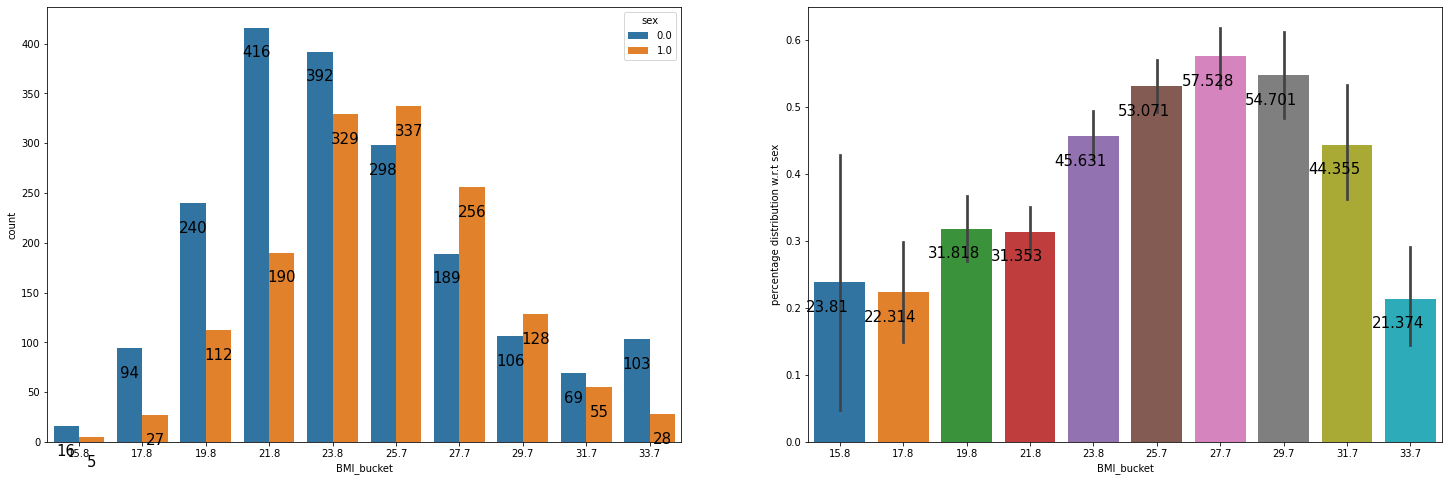

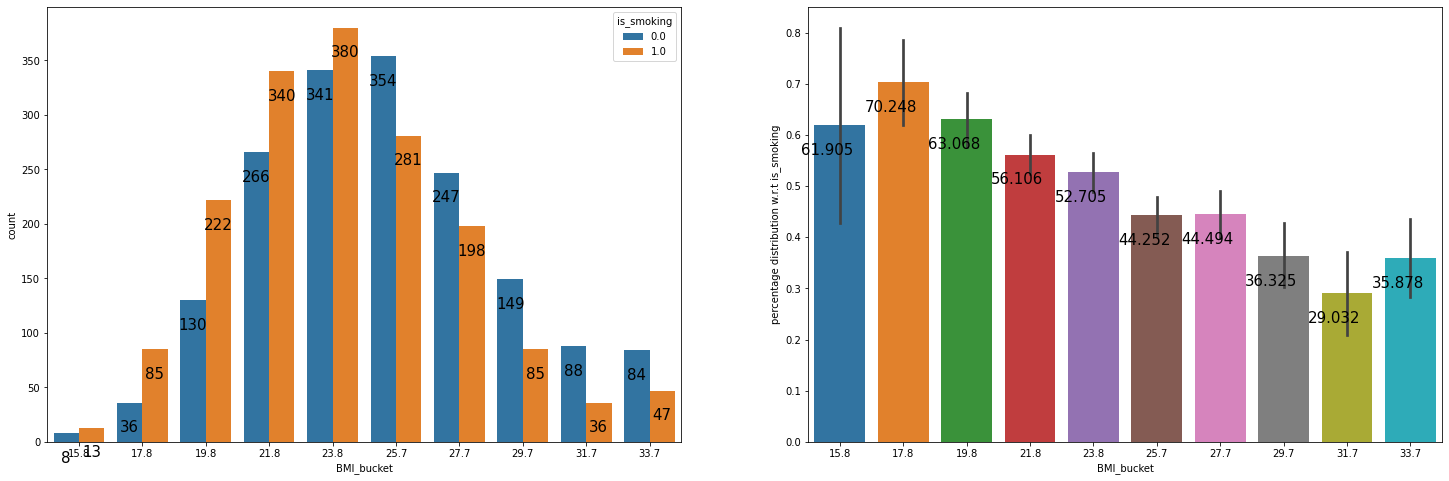

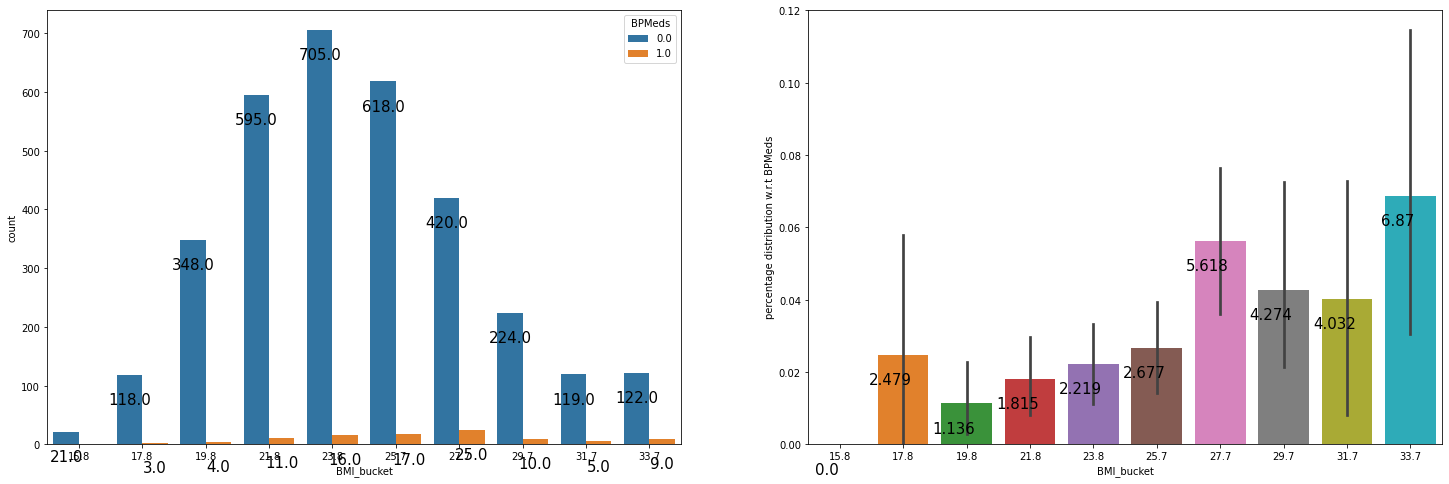

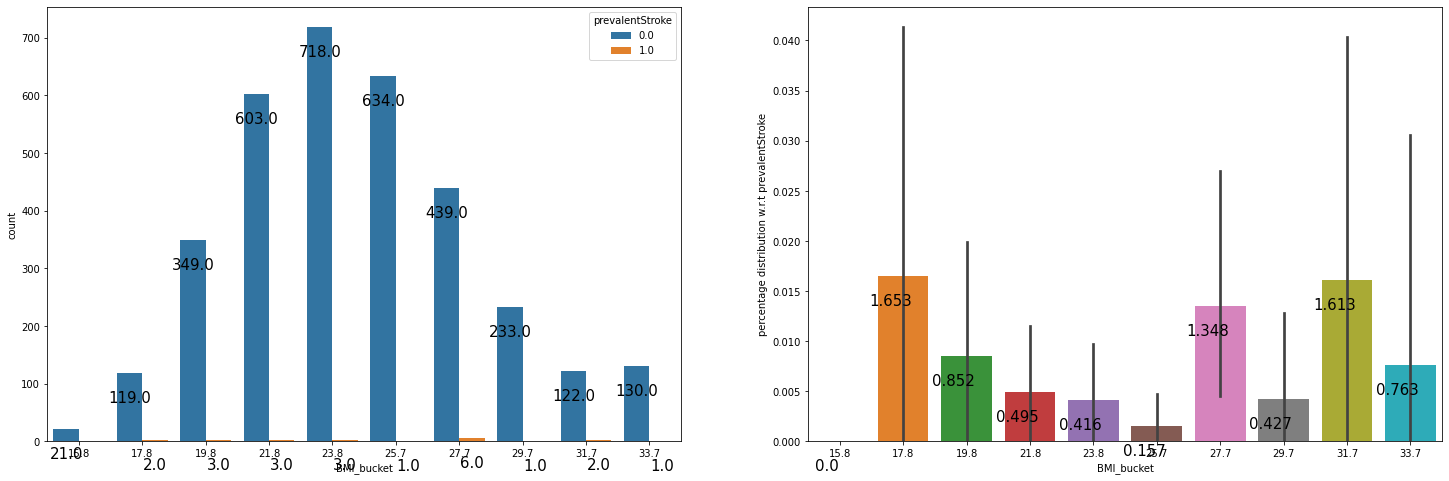

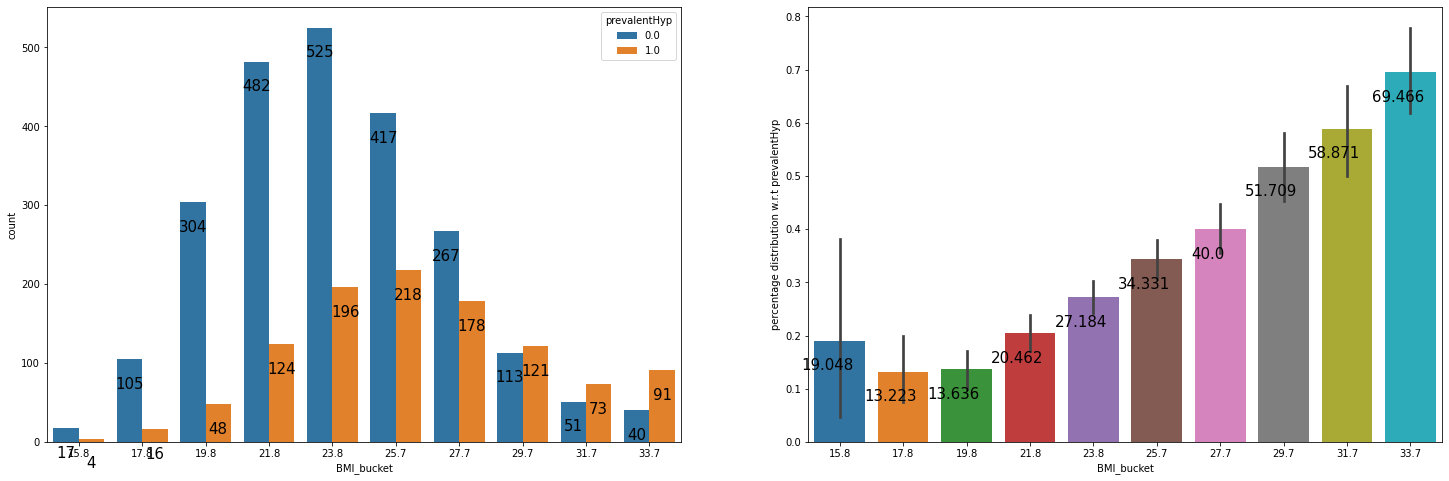

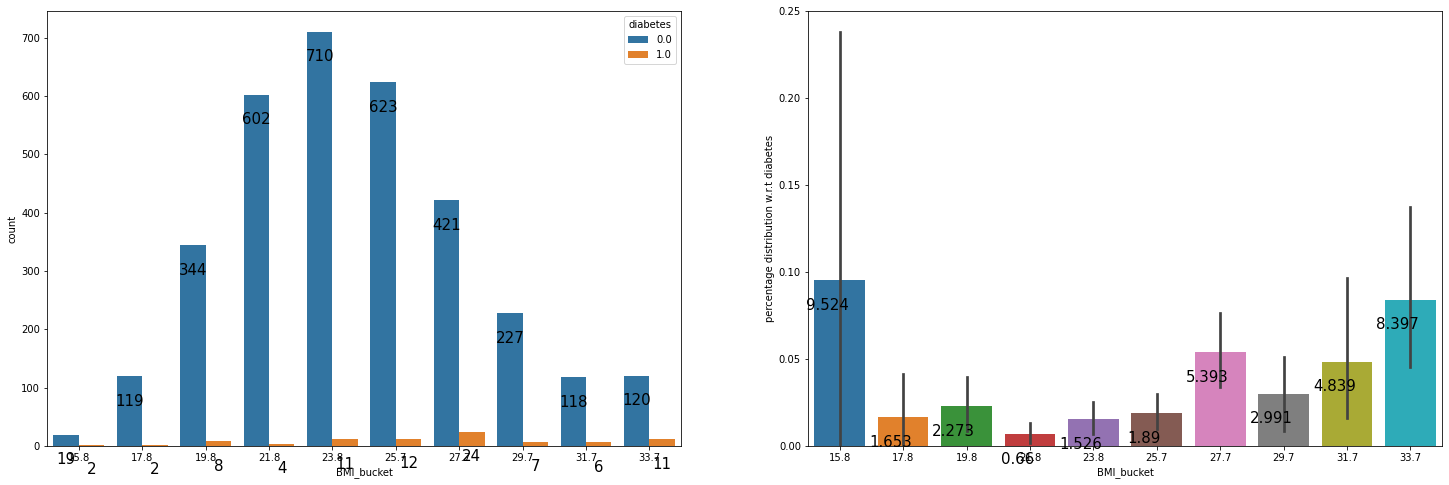

In [109]:
#For better further analysis binning is implemented on age feature
data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   BMI levels from 15 to 22 and 30 to 34 are more prevalent in females.
*   Smokers tend to have lower BMI.
*   People with prevalent hypertension tend to have higher BMI.





**Analysis with respect to heartRate :**

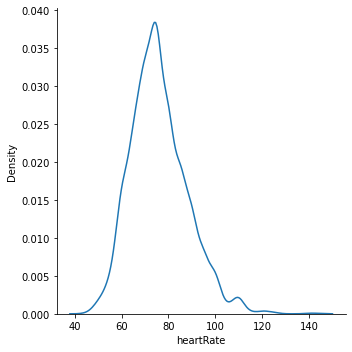

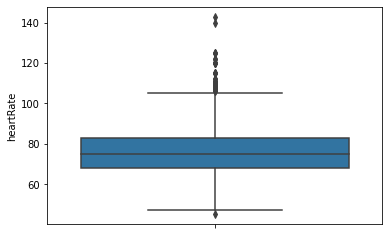

In [110]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='heartRate', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='heartRate')#boxplot for outlier analysis
plt.show()

Outliers are observed in heartRate feature.So, in order to handle those outliers IQR method is implemented.

In [111]:
#Implementing IQR method 
vals = data_df.heartRate.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr

#Assigning those outliers with min and max values
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : min_lim if x < min_lim else x)
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : max_lim if x > max_lim else x)

0.25    68.0
0.75    83.0
Name: heartRate, dtype: float64


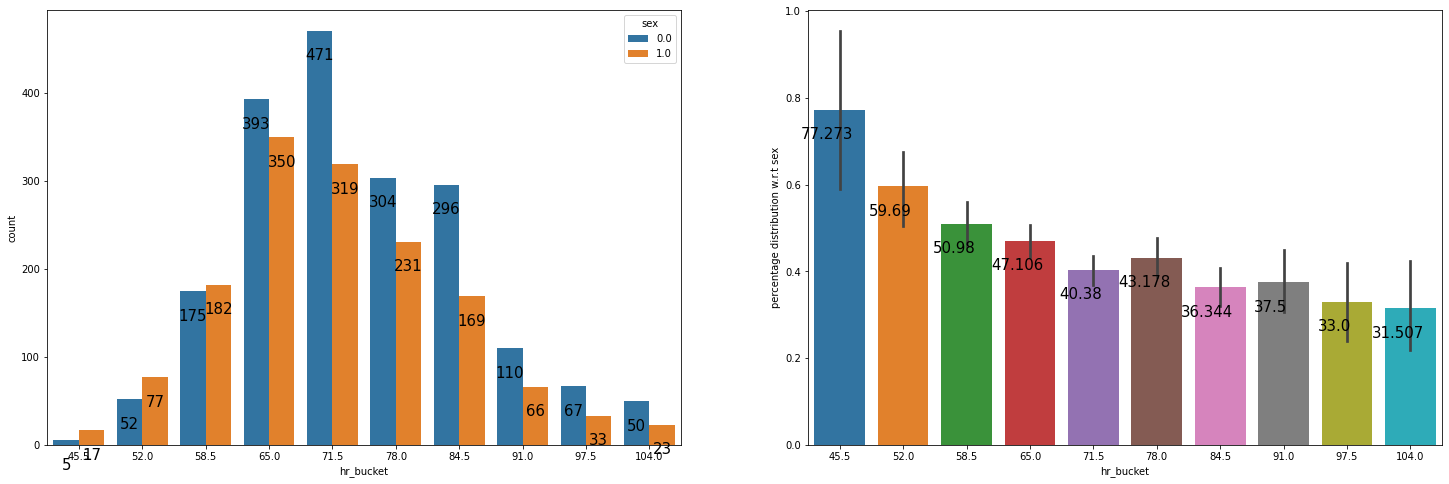

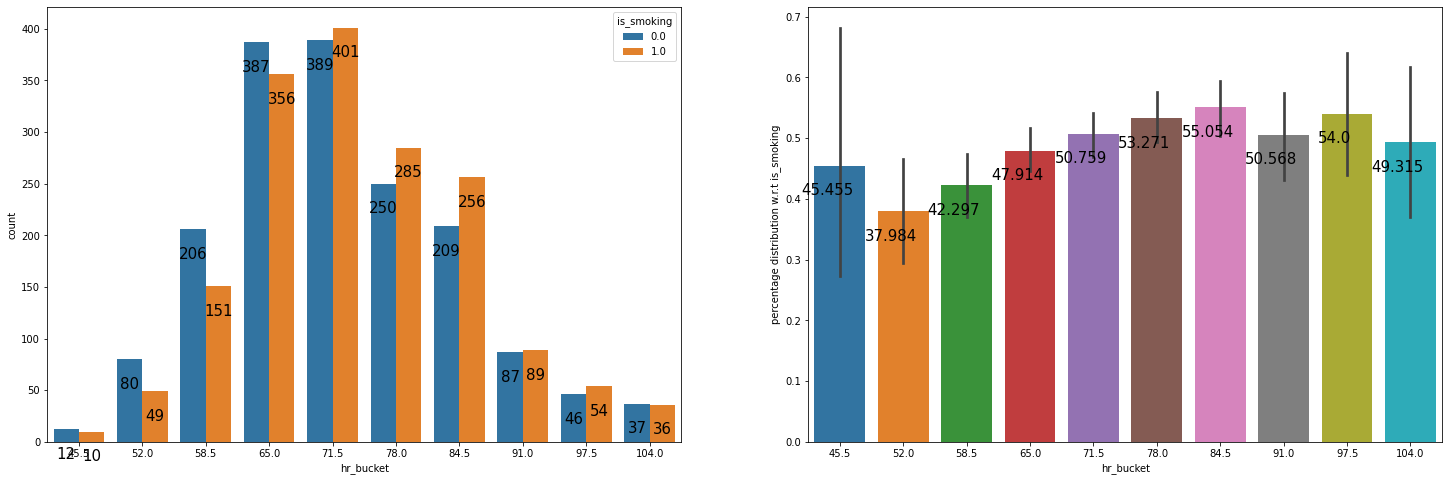

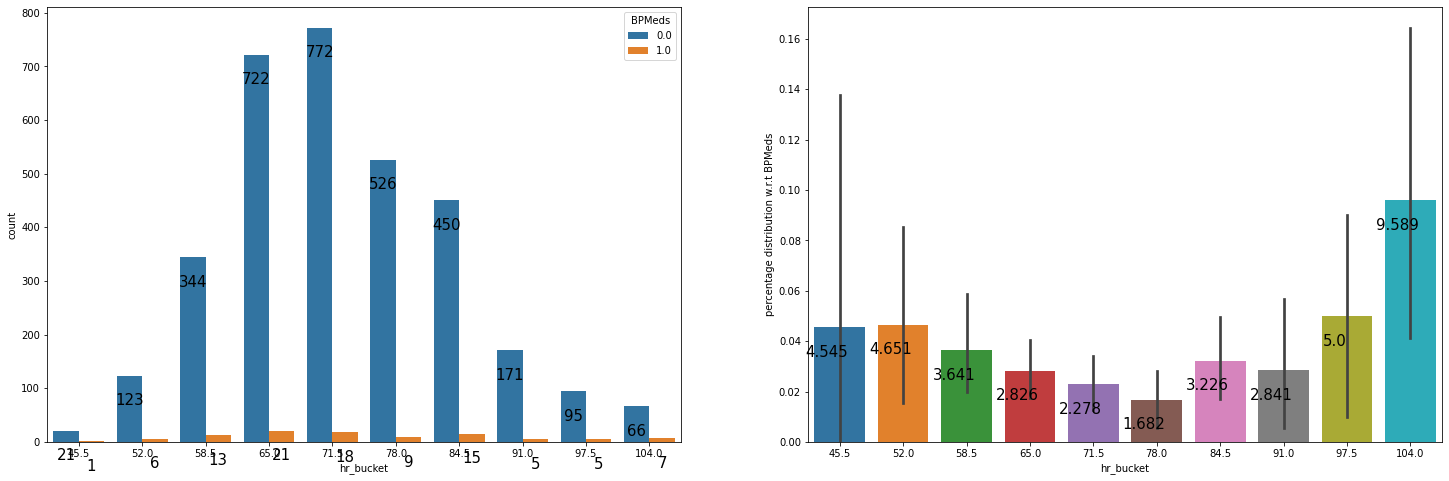

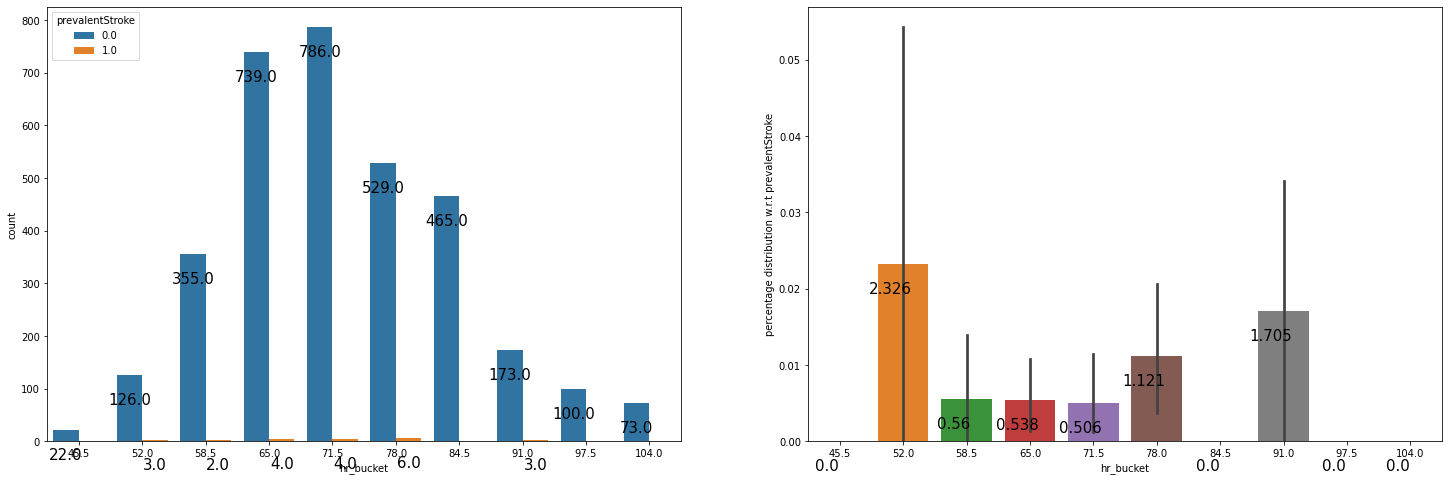

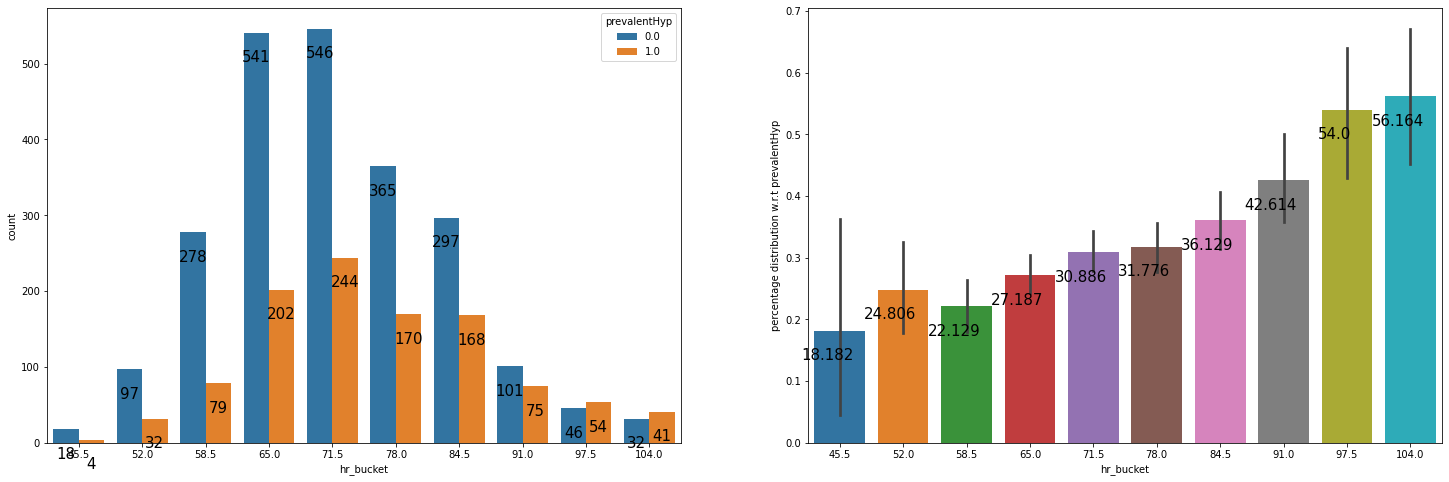

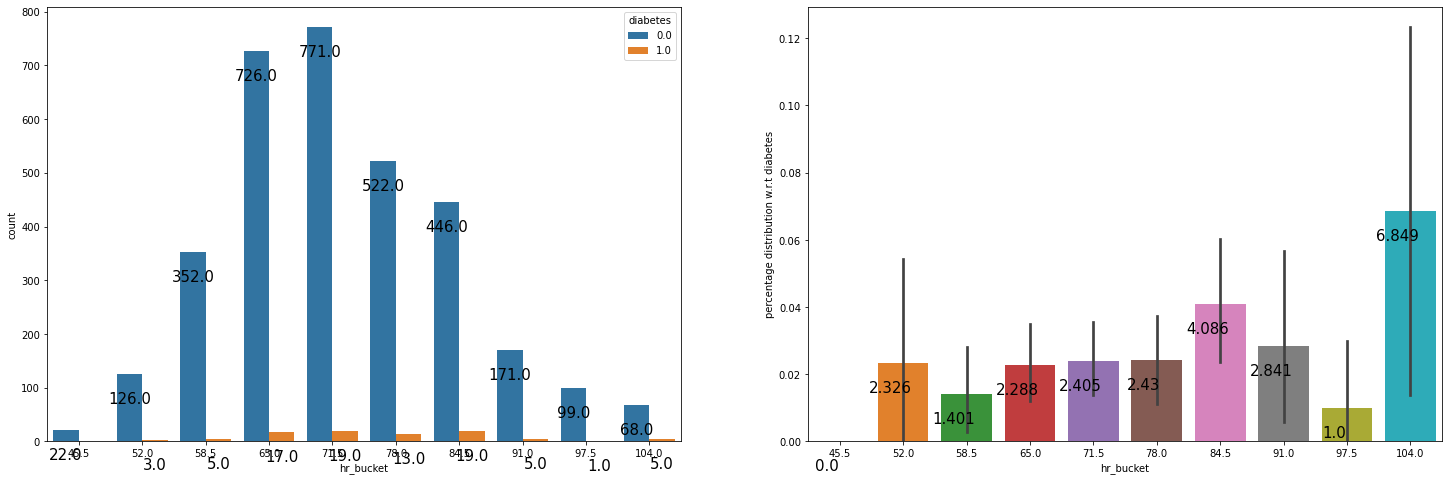

In [112]:
#For better further analysis binning is implemented on age feature
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   Females and people with prevalent hypertension tend to have higher heart rates.



**Analysis with respect to glucose :**

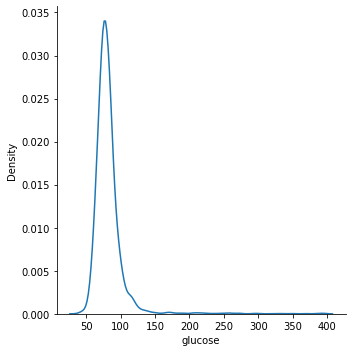

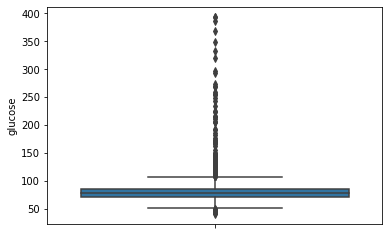

In [113]:
#Disrtribution and outlier analysis
sns.displot(data=data_df, x='glucose', kind="kde")#displot for distribution analysis
plt.show()

sns.boxplot(data=data_df,y='glucose')#boxplot for outlier analysis
plt.show()

In [114]:
#Implementing IQR method 
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


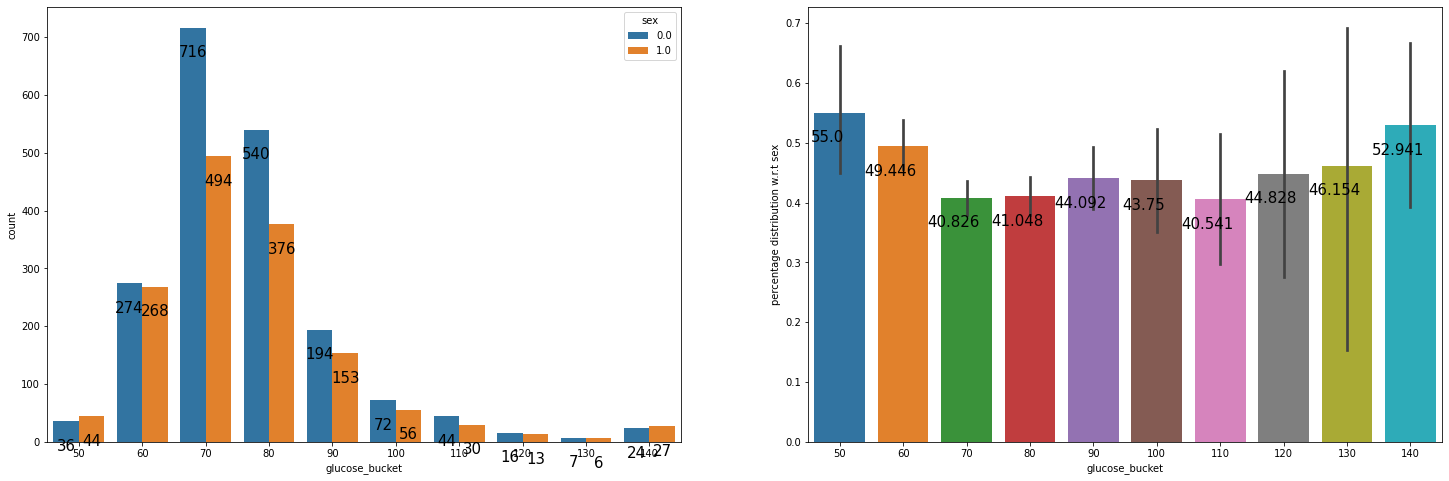

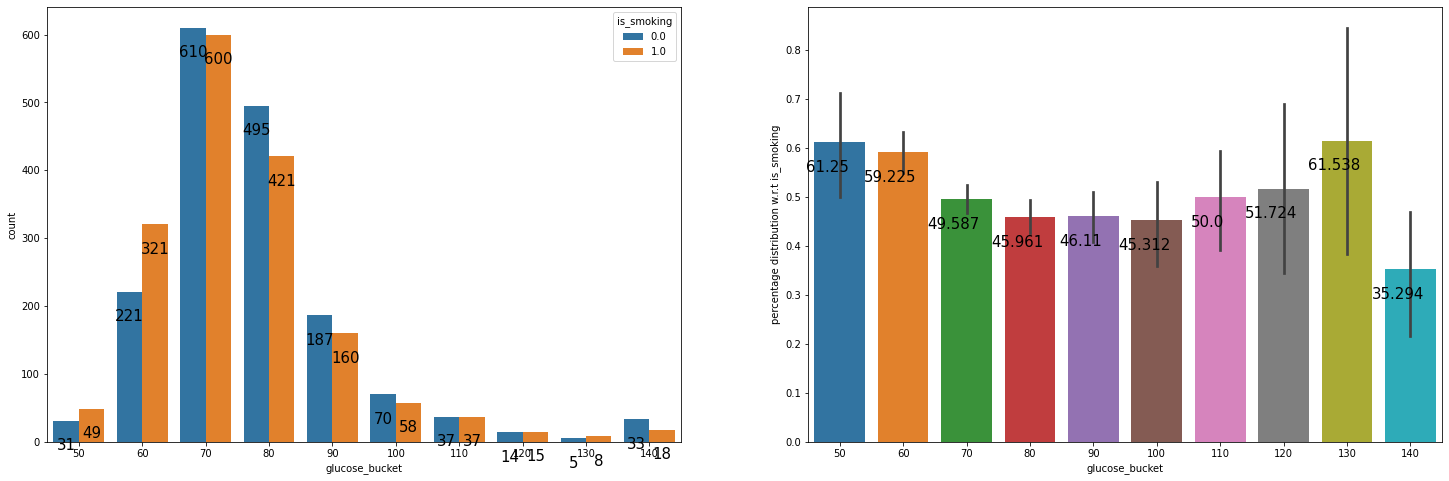

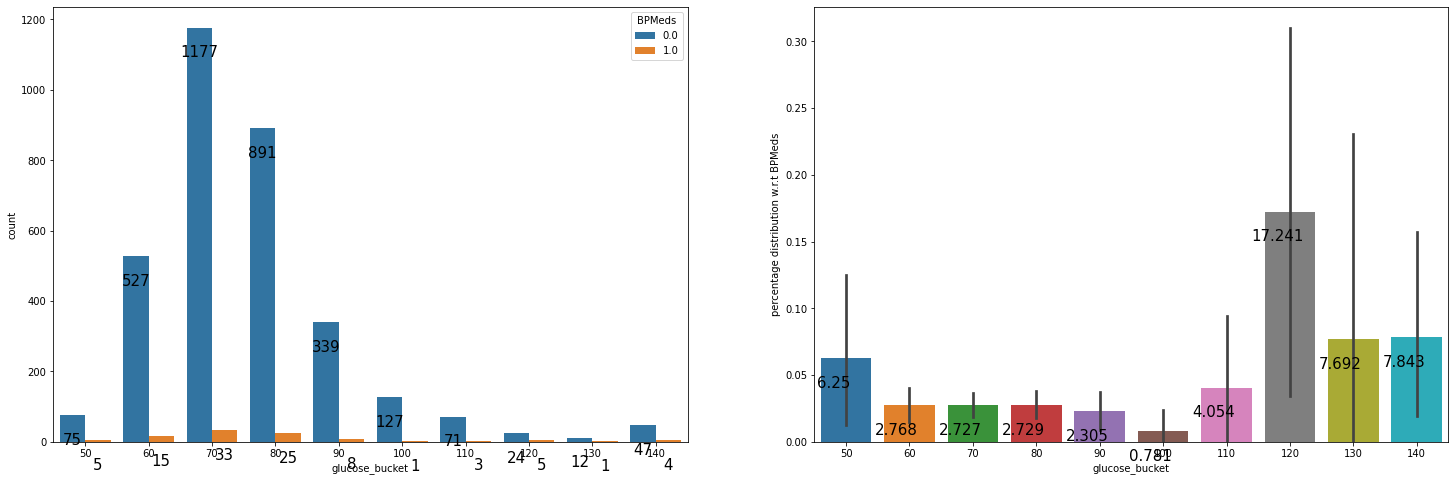

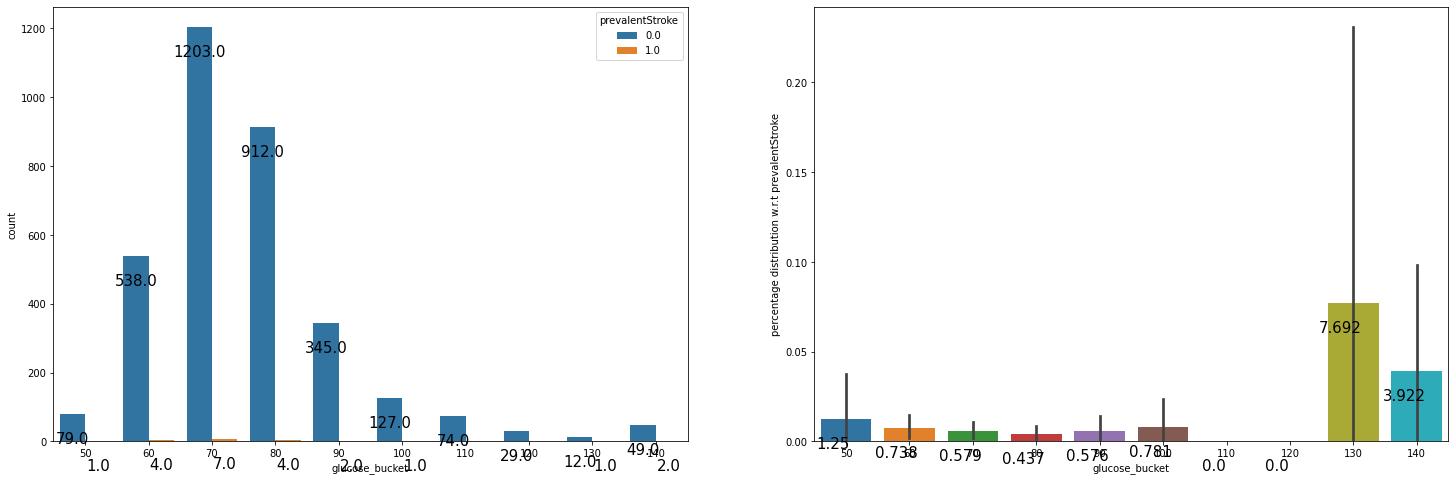

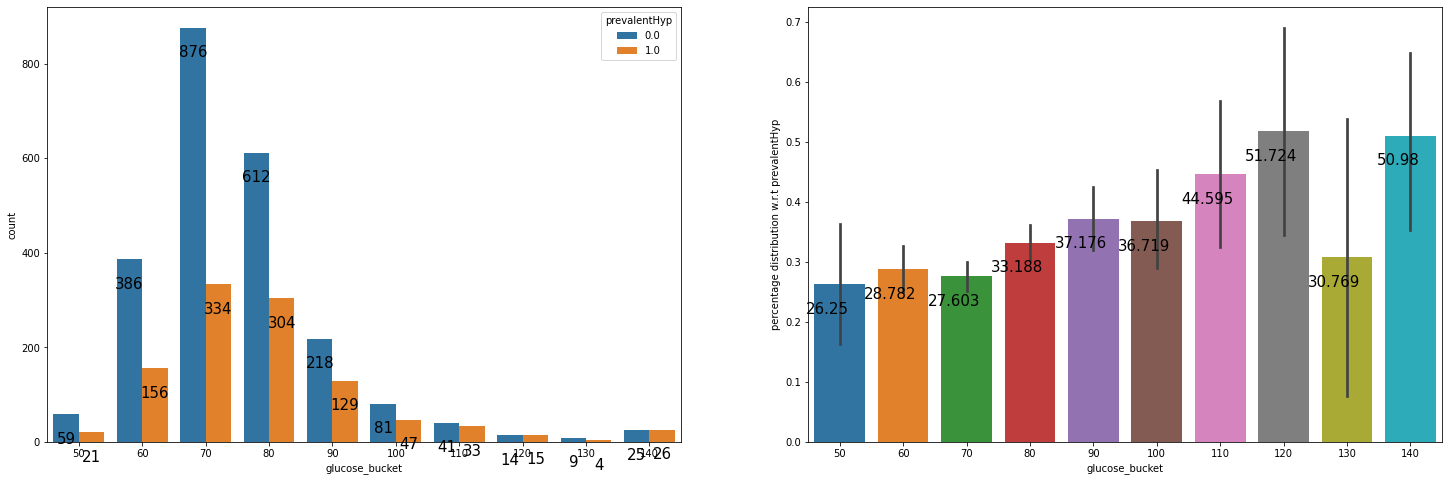

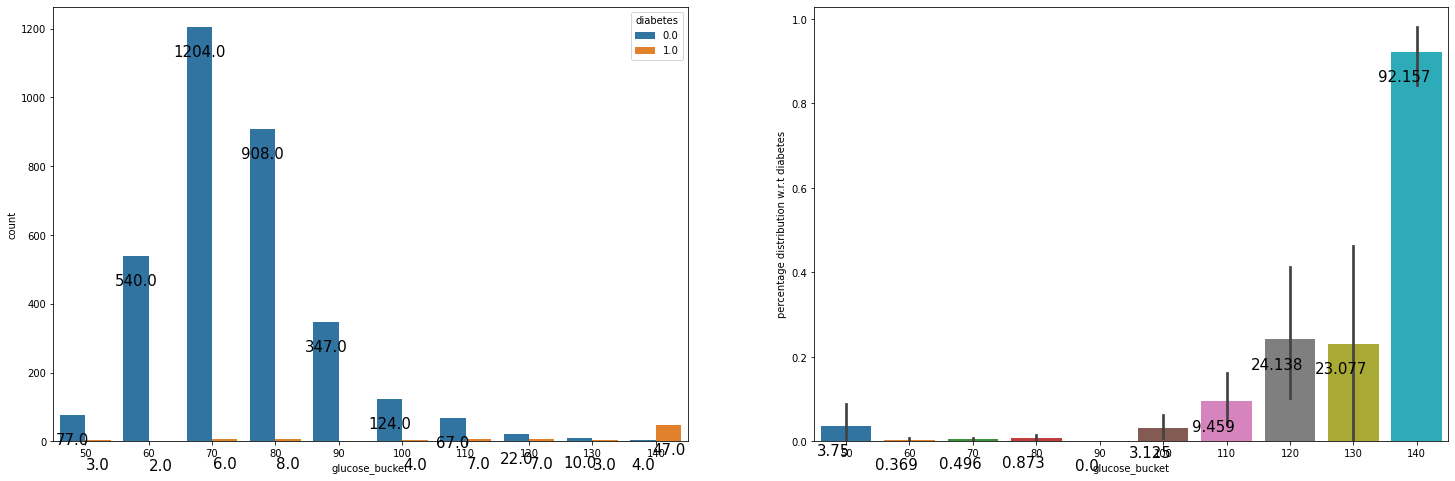

In [115]:
#For better further analysis binning is implemented on age feature
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10)))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   People with prevalent hypertension tend to have higher glucose levels.



**Analysing numerical features with respect to target feature :**

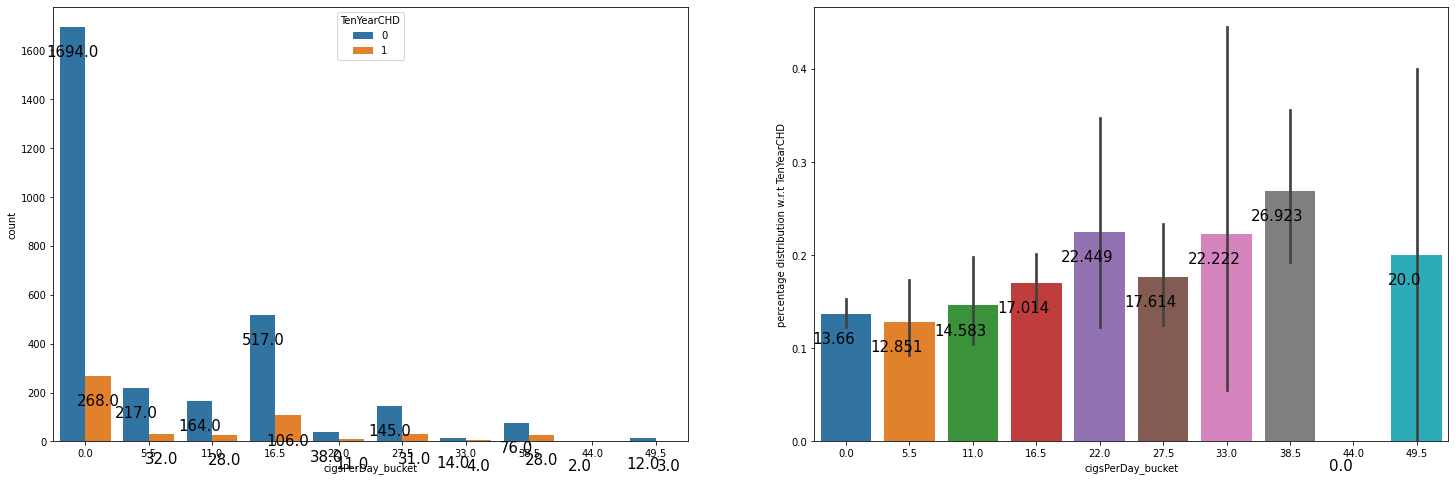

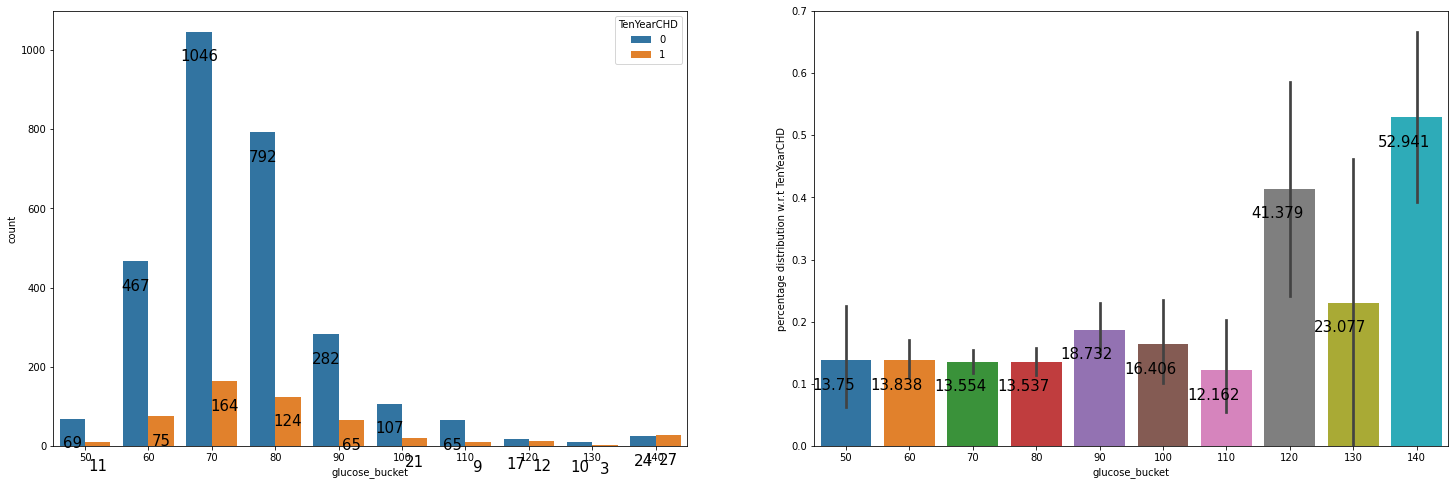

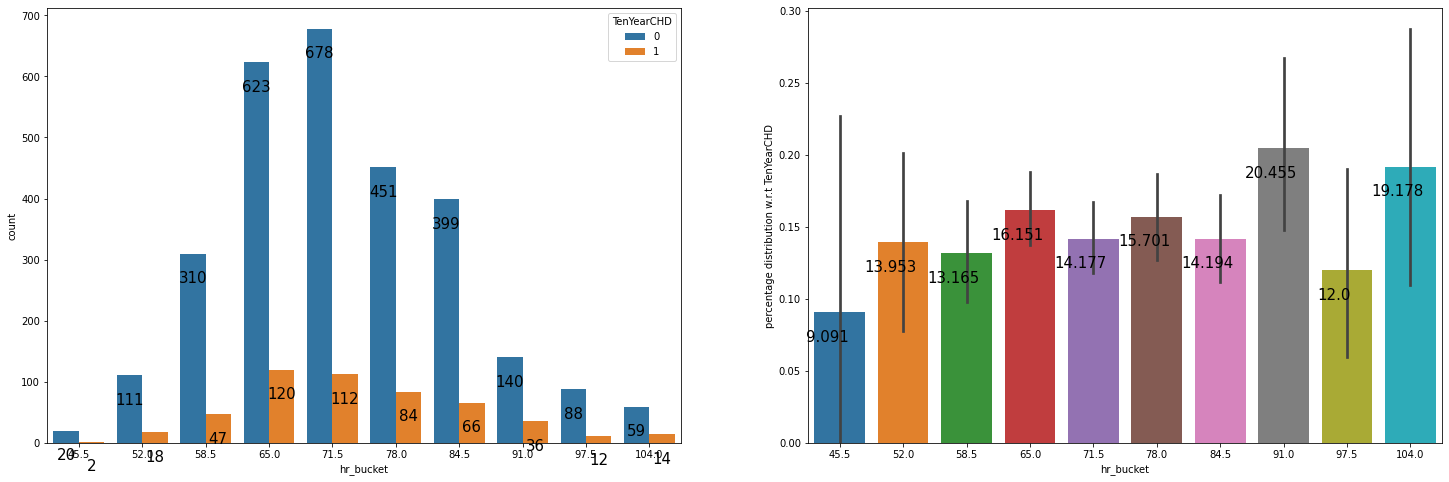

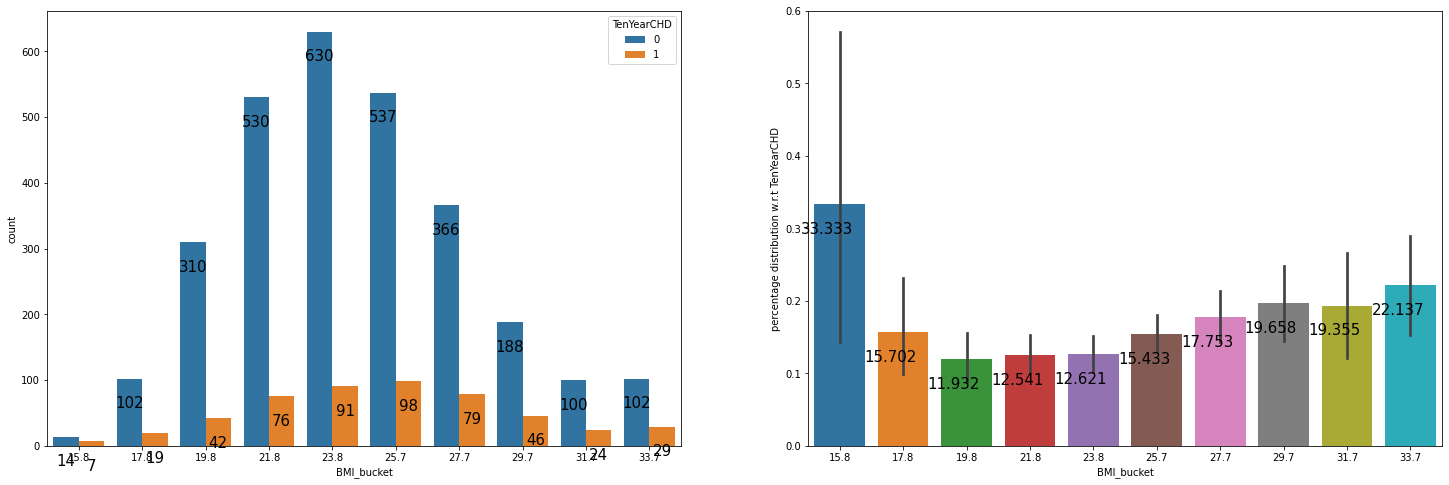

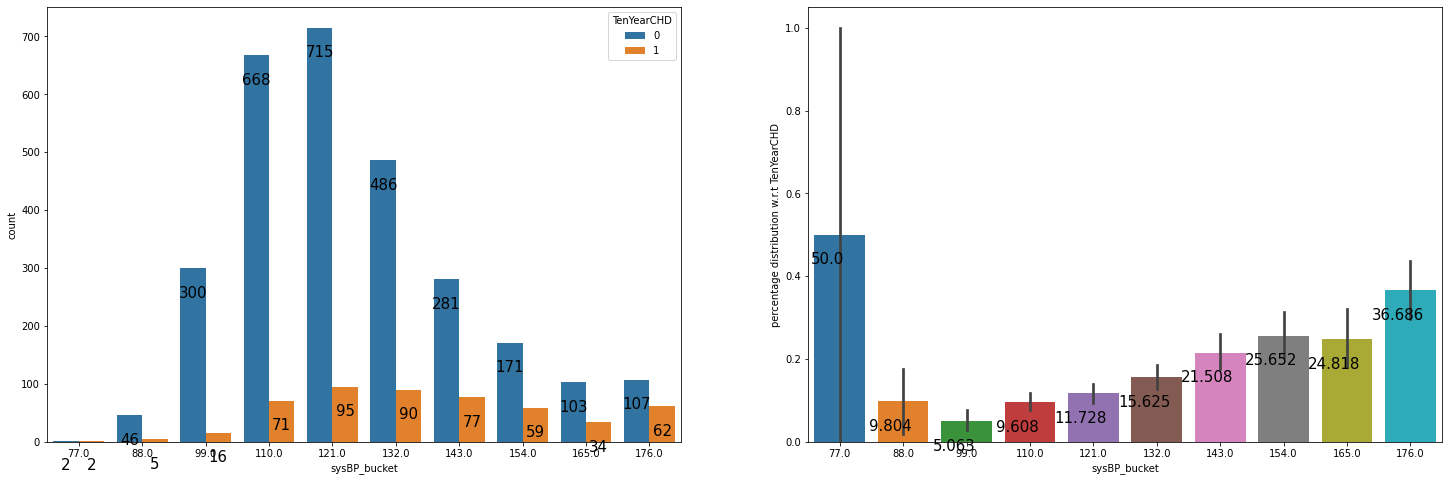

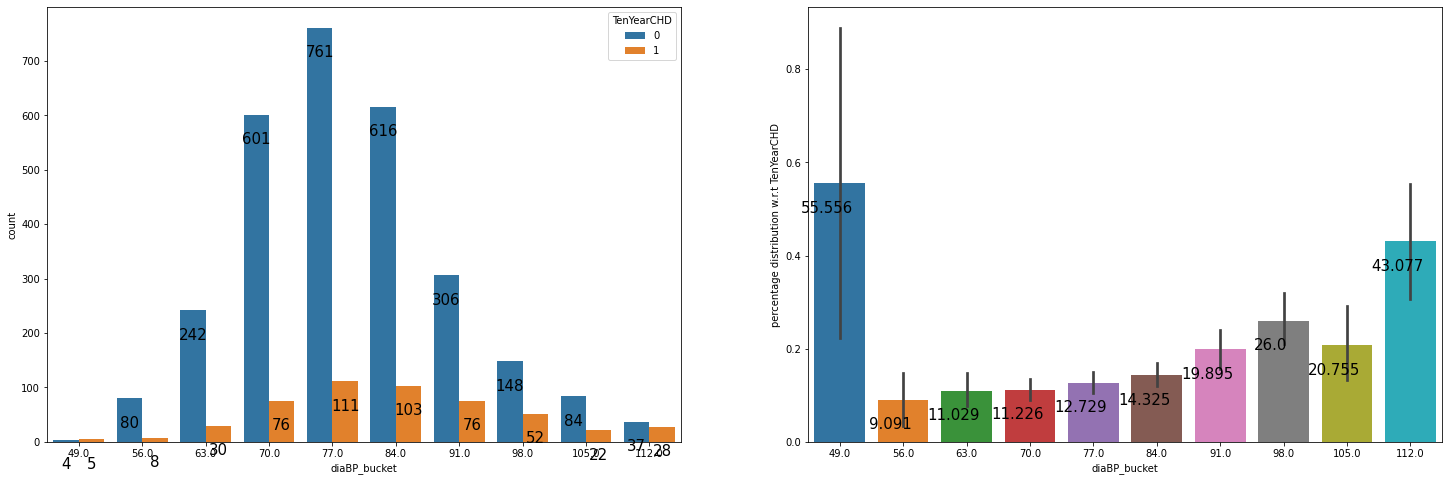

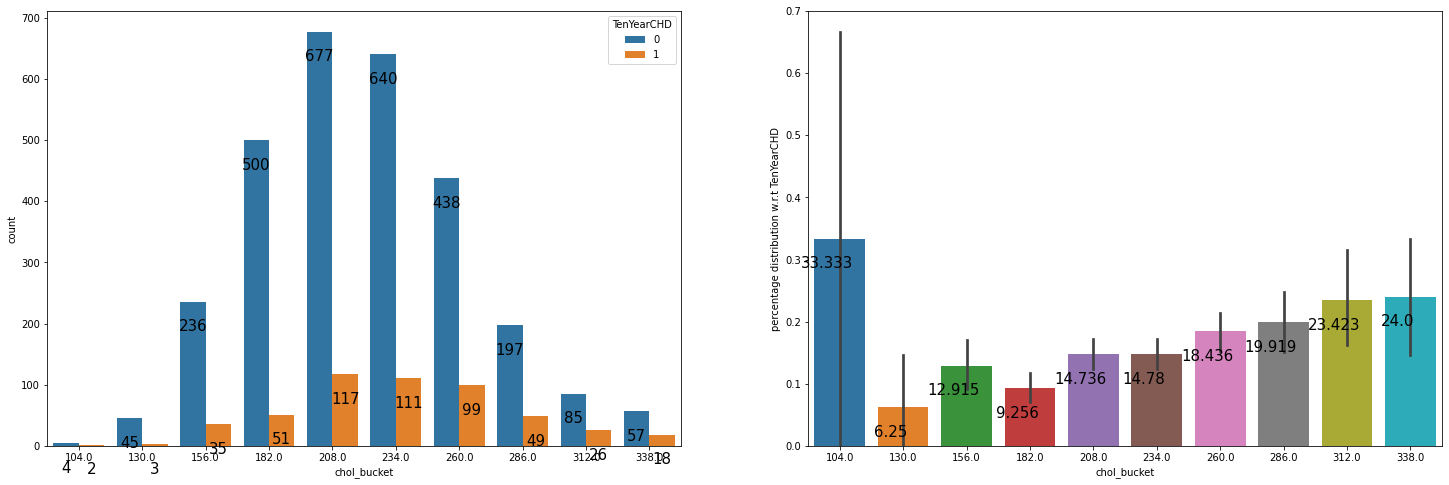

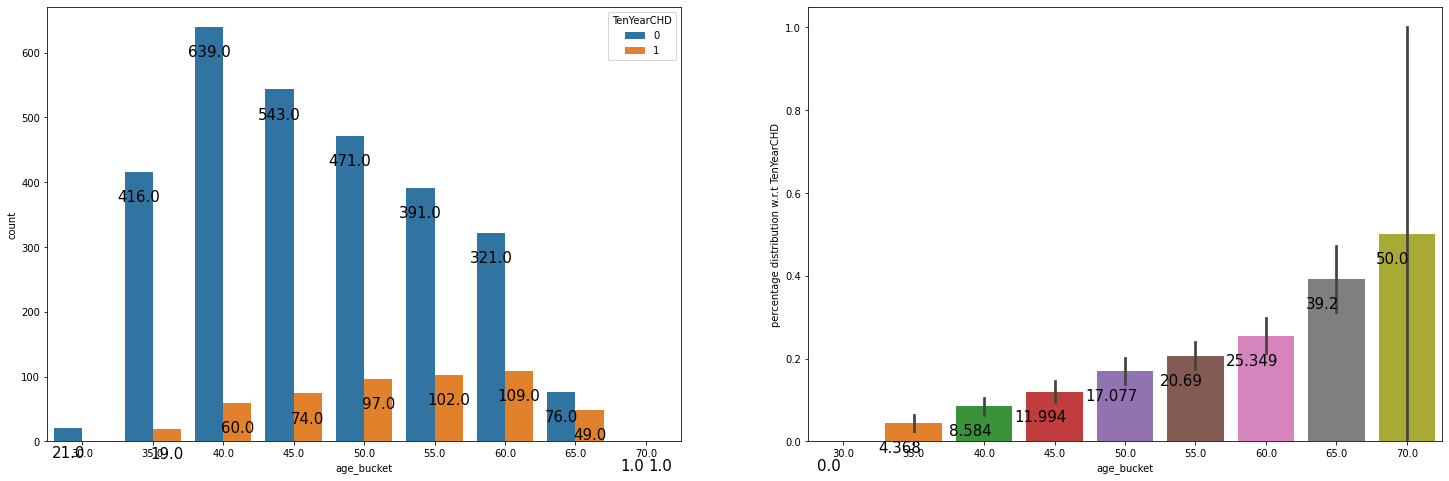

In [116]:
#Analysising age feature with respect to other categorical features
for v in ['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(v,'TenYearCHD', data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.



In [117]:
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

# Feature selection and correlation analysis

In [118]:
data_df=data_df.apply(pd.to_numeric)#for further analysis,converting data values to numeric since some values are encoded as object
data_df=data_df.drop(columns=['id'])#'id' feature has no relevence in this analysis so droping it from further analysis

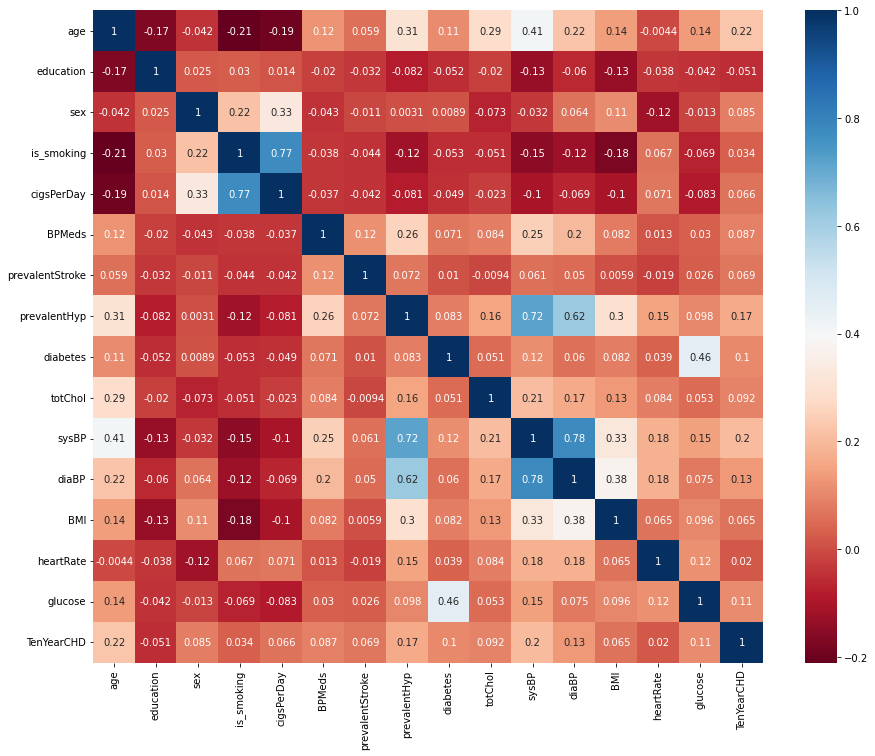

In [119]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)

In [120]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])

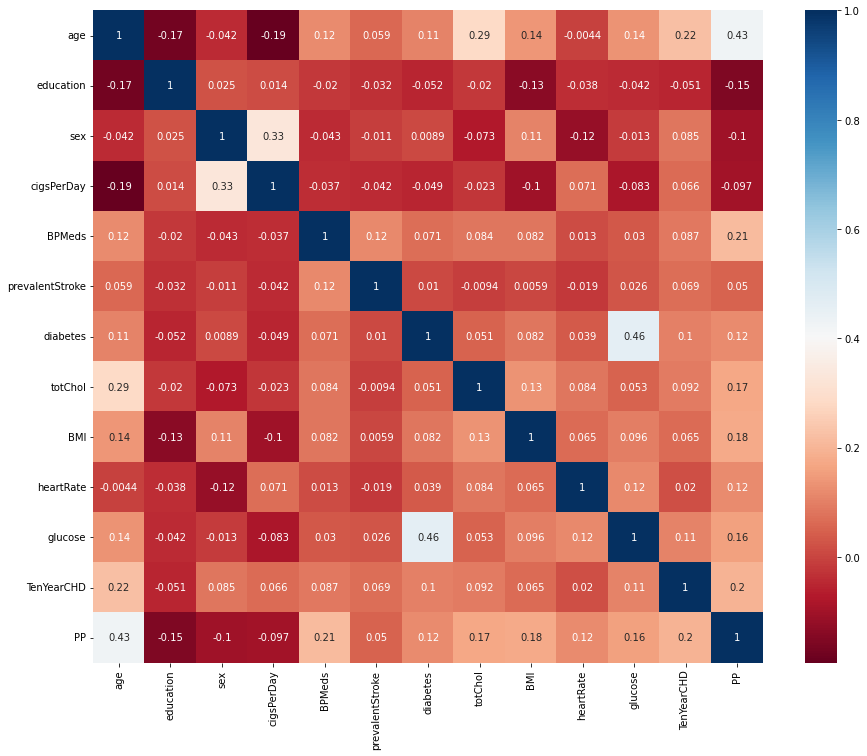

In [121]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)

In [156]:
X = data_df.drop(columns=['TenYearCHD'], axis=1)
y = data_df['TenYearCHD']

In [157]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [158]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

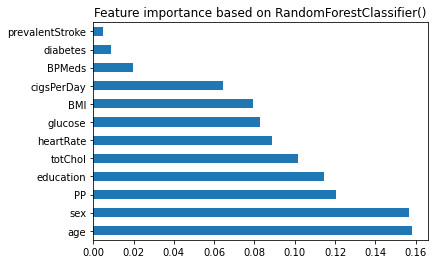

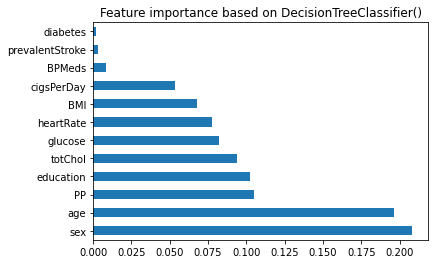

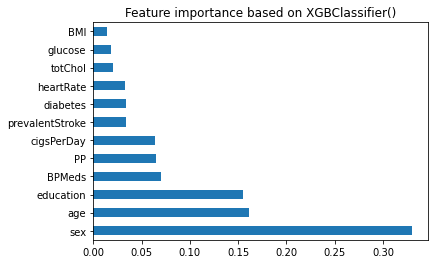

In [159]:

for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')
    plt.title(f'Feature importance based on {v}')
    plt.show()

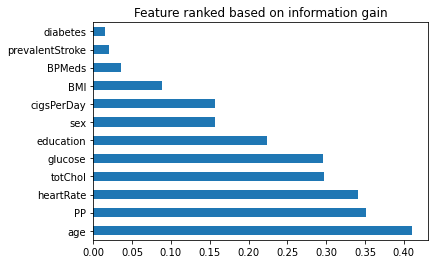

In [160]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
ranked_features=pd.Series(mutual_data,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.title('Feature ranked based on information gain')
plt.show()

In [161]:
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])

In [162]:
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

**Train and Test data sets**

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [164]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Model

## **Libraries required for Model**

In [165]:
# Creating a dataframe
model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1'])
 
# Creating necessary dictionaries
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [166]:
# Creating a dataframe for paramereter wise
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])  

In [167]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df=model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [168]:
# Creating a function for model building
def model_build_param_wise(X_train, y_train, X_test, y_test, model_dict,model_df_1):
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)
    model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
    model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

    model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
    model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

    model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
    model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

    model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
    model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

    model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
    model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

    model_df_1['score']=0
    for col in ["Test Accuracy Rank",
            "Test Precision Rank","Test Recall Rank",
            "Test ROC AUC Rank","Test F1 Rank"]:
        model_df_1['score']= model_df_1['score']+ model_df_1[col]

    model_df_1=model_df_1.sort_values(by='score',ascending=False)
    

  return model_df_1

1. Decision Tree Classifier

In [169]:
# Creating a dictionary for models
models = {'Decision Tree Classifier'        : DecisionTreeClassifier(random_state=42) }

In [170]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [171]:
model_df

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Decision Tree Classifier             1.0       0.829167              1.0   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.813605           1.0     0.845827            1.0      0.829462   

   Train F1   Test F1  
0       1.0  0.829404

In [176]:
for x in range(5,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)                                                            


In [177]:
model_df_1[model_df_1['Test Recall']>0.845827		][['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
503         0.997684       0.831250         0.998157        0.805263   
502         0.997684       0.831250         0.998157        0.805263   
547         1.000000       0.828472         1.000000        0.803430   
546         1.000000       0.828472         1.000000        0.803430   
540         0.999537       0.828472         0.999080        0.804233   
541         0.999537       0.828472         0.999080        0.804233   
543         0.999768       0.828472         0.999540        0.804233   
542         0.999768       0.828472         0.999540        0.804233   
515         0.997221       0.829167         0.996780        0.805298   
514         0.997221       0.829167         0.996780        0.805298   
6613        0.693145       0.656250         0.640744        0.605578   
271         0.990736       0.834722         0.984986        0.816464   
703         0.983789       0.822917         0.976428        0.799735   
704         0.983789       0.822917         0.976428        0.799735   
620         0.997453       0.824306         0.996325        0.803476   
621         0.997453       0.824306         0.996325        0.803476   
710         0.978462       0.822222         0.968877        0.800266   
389         0.995137       0.829167         0.992671        0.811908   
346         0.995831       0.830556         0.994945        0.814111   
415         0.996758       0.828472         0.994954        0.811653   
414         0.996758       0.828472         0.994954        0.811653   
307         0.998842       0.830556         0.999539        0.814966   
352         0.999768       0.829861         0.999540        0.813859   
601         0.999074       0.824306         0.998620        0.805108   
600         0.999074       0.824306         0.998620        0.805108   
366         1.000000       0.829167         1.000000        0.813605   
365         1.000000       0.829167         1.000000        0.813605   

      Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
503       0.997238     0.865629       0.997687      0.831860  0.834356   
502       0.997238     0.865629       0.997687      0.831860  0.834356   
547       1.000000     0.861386       1.000000      0.829056  0.831399   
546       1.000000     0.861386       1.000000      0.829056  0.831399   
540       1.000000     0.859972       0.999534      0.829031  0.831169   
541       1.000000     0.859972       0.999534      0.829031  0.831169   
543       1.000000     0.859972       0.999767      0.829031  0.831169   
542       1.000000     0.859972       0.999767      0.829031  0.831169   
515       0.997698     0.859972       0.997218      0.829713  0.831737   
514       0.997698     0.859972       0.997218      0.829713  0.831737   
6613      0.887661     0.859972       0.691967      0.659863  0.710695   
271       0.996777     0.855728       0.990700      0.835095  0.835635   
703       0.991713     0.852900       0.983741      0.823448  0.825462   
704       0.991713     0.852900       0.983741      0.823448  0.825462   
620       0.998619     0.850071       0.997445      0.824763  0.826117   
621       0.998619     0.850071       0.997445      0.824763  0.826117   
710       0.988950     0.850071       0.978399      0.822716  0.824417   
389       0.997698     0.848656       0.995121      0.829512  0.829876   
346       0.996777     0.848656       0.995826      0.830877  0.831025   
415       0.998619     0.847242       0.996746      0.828805  0.829066   
414       0.998619     0.847242       0.996746      0.828805  0.829066   
307       0.998158     0.847242       0.998846      0.830851  0.830791   
352       1.000000     0.847242       0.999767      0.830169  0.830215   
601       0.999540     0.847242       0.999071      0.824712  0.825637   
600       0.999540     0.847242       0.999071      0.824712  0.825637   
366       1.000000     0.845827       1.000000      0.829462  0.8

In [178]:
model_df_1['Parameters'][271]

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 1}

In [179]:
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           param_grid={'max_depth':  [16],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': [None],
                                                                      'criterion': ['gini']},cv=5)}

In [180]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

DecisionTreeClassifier(max_depth=16, random_state=42)


In [181]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827         1.0000   
1         1.000000        0.790040      1.000000     0.830269         1.0000   
2         0.984986        0.816464      0.996777     0.855728         0.9907   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635

2. Logistic Regression classification

In [204]:
# Creating a dictionary for models
models = {'Logistic Regression'        : LogisticRegression(random_state=42)}

In [205]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [206]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   
3       Logistic Regression tunned        0.668133       0.681944   
4       Logistic Regression tunned        0.668133       0.681944   
5              Logistic Regression        0.667902       0.681250   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827       1.000000   
1         1.000000        0.790040      1.000000     0.830269       1.000000   
2         0.984986        0.816464      0.996777     0.855728       0.990700   
3         0.667270        0.671252      0.678637     0.690240       0.668070   
4         0.667270        0.671252      0.678637     0.690240       0.668070   
5         0.666968        0.670799      0.678637     0.688826       0.667837   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635  
3      0.682092  0.672906  0.680614  
4      0.682092  0.672906  0.680614  
5      0.681384  0.672752  0.679693

In [185]:
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])  

In [186]:
for x in ['l1', 'l2']:
  for y in np.logspace(-5, 4, 30):
    for z in ['liblinear']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)                                                            
for x in ['l2','none']:
  for y in np.logspace(-5, 4, 30):
    for z in ['lbfgs','newton-cg']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)   
for x in ['elasticnet']:
  for y in np.logspace(-5, 4, 30):
    for z in ['saga']:
      for a in np.logspace(-5, 0, 30):
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z],
                                                                   'l1_ratio' :[a]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)    

In [196]:
df=model_df_1[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].sort_values(by='Train Precision',ascending=False)

In [198]:
df[(df['Test Recall']>0.688826) & (df['Test Accuracy']>0.681250)].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
26        0.668133       0.681944         0.667270        0.671252   
1         0.667439       0.681944         0.666667        0.671252   
34        0.667207       0.681944         0.666516        0.671252   
31        0.667207       0.681944         0.666516        0.671252   
2         0.667207       0.681944         0.666516        0.671252   
..             ...            ...              ...             ...   
78        0.667207       0.681944         0.666516        0.671724   
79        0.667207       0.681944         0.666516        0.671724   
81        0.667207       0.681944         0.666516        0.671724   
82        0.667207       0.681944         0.666516        0.671724   
75        0.665586       0.682639         0.665907        0.672652   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
26      0.678637     0.690240       0.668070      0.682092  0.680614   
1       0.677716     0.690240       0.667376      0.682092  0.680614   
34      0.677256     0.690240       0.667146      0.682092  0.680614   
31      0.677256     0.690240       0.667146      0.682092  0.680614   
2       0.677256     0.690240       0.667146      0.682092  0.680614   
..           ...          ...            ...           ...       ...   
78      0.677256     0.688826       0.667146      0.682066  0.680168   
79      0.677256     0.688826       0.667146      0.682066  0.680168   
81      0.677256     0.688826       0.667146      0.682066  0.680168   
82      0.677256     0.688826       0.667146      0.682066  0.680168   
75      0.672652     0.688826       0.665543      0.682749  0.680643   

    Train F1                                         Parameters  
26  0.672906  {'C': 0.22122162910704501, 'l1_ratio': 0.00010...  
1   0.672146  {'C': 0.22122162910704501, 'l1_ratio': 0.09236...  
34  0.671843  {'C': 0.1082636733874054, 'penalty': 'l2', 'so...  
31  0.671843  {'C': 0.1082636733874054, 'l1_ratio': 0.005736...  
2   0.671843  {'C': 0.1082636733874054, 'l1_ratio': 4.893900...  
..       ...                                                ...  
78  0.671843  {'C': 0.22122162910704501, 'l1_ratio': 0.45203...  
79  0.671843  {'C': 0.9236708571873865, 'penalty': 'l1', 'so...  
81  0.671843  {'C': 0.45203536563602403, 'l1_ratio': 0.67233...  
82  0.671843  {'C': 0.22122162910704501, 'l1_ratio': 0.30391...  
75  0.669262  {'C': 0.01268961003167922, 'l1_ratio': 0.45203...  

[83 rows x 11 columns]

In [199]:
model_df_1['Parameters'][26]

{'C': 0.22122162910704501,
 'l1_ratio': 0.00010826367338740541,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [207]:
models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : ['elasticnet'],
                                                                   'C'       : [0.22122162910704501],
                                                                   'solver'  : ['saga'],
                                                                   'l1_ratio' :[0.00010826367338740541]}
                                                      )}

In [208]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

LogisticRegression(C=0.22122162910704501, l1_ratio=0.00010826367338740541,
                   penalty='elasticnet', random_state=42, solver='saga')


In [209]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   
3       Logistic Regression tunned        0.668133       0.681944   
4       Logistic Regression tunned        0.668133       0.681944   
5              Logistic Regression        0.667902       0.681250   
6       Logistic Regression tunned        0.668133       0.681944   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827       1.000000   
1         1.000000        0.790040      1.000000     0.830269       1.000000   
2         0.984986        0.816464      0.996777     0.855728       0.990700   
3         0.667270        0.671252      0.678637     0.690240       0.668070   
4         0.667270        0.671252      0.678637     0.690240       0.668070   
5         0.666968        0.670799      0.678637     0.688826       0.667837   
6         0.667270        0.671252      0.678637     0.690240       0.668070   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635  
3      0.682092  0.672906  0.680614  
4      0.682092  0.672906  0.680614  
5      0.681384  0.672752  0.679693  
6      0.682092  0.672906  0.680614

3. KN Classifier

In [210]:
# Creating a dictionary for models
models = {'KNN' : KNeighborsClassifier()}

In [211]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [212]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   
3       Logistic Regression tunned        0.668133       0.681944   
4       Logistic Regression tunned        0.668133       0.681944   
5              Logistic Regression        0.667902       0.681250   
6       Logistic Regression tunned        0.668133       0.681944   
7                              KNN        0.881427       0.812500   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827       1.000000   
1         1.000000        0.790040      1.000000     0.830269       1.000000   
2         0.984986        0.816464      0.996777     0.855728       0.990700   
3         0.667270        0.671252      0.678637     0.690240       0.668070   
4         0.667270        0.671252      0.678637     0.690240       0.668070   
5         0.666968        0.670799      0.678637     0.688826       0.667837   
6         0.667270        0.671252      0.678637     0.690240       0.668070   
7         0.819969        0.744681      0.979282     0.940594       0.880834   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635  
3      0.682092  0.672906  0.680614  
4      0.682092  0.672906  0.680614  
5      0.681384  0.672752  0.679693  
6      0.682092  0.672906  0.680614  
7      0.814772  0.892572  0.831250

In [213]:
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [216]:
for x in range(1,10):
  for y in ['uniform','distance']:
    for z in ['minkowski','euclidean','manhattan']:
        models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [x],
                                                   'weights' : [y],
                                                   'metric' : [z]},
                                      cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [219]:
model_df_1[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
3         1.000000       0.879167         1.000000        0.818399   
37        1.000000       0.819444         1.000000        0.742671   
38        1.000000       0.819444         1.000000        0.742671   
28        1.000000       0.829861         1.000000        0.755531   
27        1.000000       0.829861         1.000000        0.755531   
32        1.000000       0.827778         1.000000        0.753032   
31        1.000000       0.827778         1.000000        0.753032   
11        1.000000       0.870833         1.000000        0.809015   
25        1.000000       0.836806         1.000000        0.765169   
24        1.000000       0.836806         1.000000        0.765169   
18        1.000000       0.846528         1.000000        0.777397   
40        1.000000       0.815972         1.000000        0.740217   
41        1.000000       0.815972         1.000000        0.740217   
17        1.000000       0.846528         1.000000        0.777397   
12        1.000000       0.870833         1.000000        0.810489   
15        1.000000       0.862500         1.000000        0.799060   
2         1.000000       0.895833         1.000000        0.847690   
23        1.000000       0.839583         1.000000        0.769841   
22        1.000000       0.839583         1.000000        0.769841   
0         1.000000       0.895833         1.000000        0.847690   
1         1.000000       0.895833         1.000000        0.847690   
7         1.000000       0.877778         1.000000        0.821818   
8         1.000000       0.877778         1.000000        0.821818   
9         1.000000       0.877778         1.000000        0.821818   
5         1.000000       0.877778         1.000000        0.821818   
6         1.000000       0.877778         1.000000        0.821818   
10        1.000000       0.877778         1.000000        0.821818   
16        1.000000       0.870139         1.000000        0.811751   
20        1.000000       0.860417         1.000000        0.799054   
19        0.931681       0.861806         0.890879        0.804556   
53        1.000000       0.854861         1.000000        0.795024   
35        0.914775       0.831250         0.863710        0.766055   
34        0.914775       0.831250         0.863710        0.766055   
46        0.881427       0.812500         0.819969        0.744681   
45        0.881427       0.812500         0.819969        0.744681   
48        0.860352       0.797917         0.801383        0.730599   
47        0.860352       0.797917         0.801383        0.730599   
26        0.908059       0.843056         0.859166        0.790810   
39        0.885364       0.831944         0.842664        0.788820   
30        0.924965       0.838194         0.896226        0.798489   
29        0.924965       0.838194         0.896226        0.798489   
14        0.985178       0.874306         1.000000        0.856369   
13        0.985178       0.874306         1.000000        0.856369   
4         0.984947       0.888194         1.000000        0.881285   
43        0.888143       0.818750         0.852610        0.773956   
44        0.888143       0.818750         0.852610        0.773956   
42        0.870310       0.827083         0.833886        0.786967   
21        0.938397       0.854861         0.925067        0.832888   
33        0.907133       0.838194         0.888889        0.820270   
36        0.885595       0.834722         0.868306        0.822558   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
3       1.000000     0.968883       1.000000      0.880758  0.887306   
37      1.000000     0.967468       1.000000      0.822070  0.840295   
38      1.000000     0.967468       1.000000      0.822070  0.840295   
28      1.000000     0.966054       1.000000      0.832277  0.847921   
27      1.000000     0.966054       1.000000      0.832277  0.847921   
3

In [220]:
model_df_1['Parameters'][3]

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [221]:
models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [4],
                                                   'weights' : ['distance'],
                                                   'metric' : ['manhattan']},
                                      cv=5)}

In [222]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [223]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   
3       Logistic Regression tunned        0.668133       0.681944   
4       Logistic Regression tunned        0.668133       0.681944   
5              Logistic Regression        0.667902       0.681250   
6       Logistic Regression tunned        0.668133       0.681944   
7                              KNN        0.881427       0.812500   
8                       KNN tunned        1.000000       0.879167   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827       1.000000   
1         1.000000        0.790040      1.000000     0.830269       1.000000   
2         0.984986        0.816464      0.996777     0.855728       0.990700   
3         0.667270        0.671252      0.678637     0.690240       0.668070   
4         0.667270        0.671252      0.678637     0.690240       0.668070   
5         0.666968        0.670799      0.678637     0.688826       0.667837   
6         0.667270        0.671252      0.678637     0.690240       0.668070   
7         0.819969        0.744681      0.979282     0.940594       0.880834   
8         1.000000        0.818399      1.000000     0.968883       1.000000   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635  
3      0.682092  0.672906  0.680614  
4      0.682092  0.672906  0.680614  
5      0.681384  0.672752  0.679693  
6      0.682092  0.672906  0.680614  
7      0.814772  0.892572  0.831250  
8      0.880758  1.000000  0.887306

4. Support vector classifier

In [224]:
# Creating a dictionary for models
models = {'SVC'        : SVC(probability=True,random_state=42)}

In [225]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [226]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.829167   
1  Decision Tree Classifier tunned        1.000000       0.808333   
2  Decision Tree Classifier tunned        0.990736       0.834722   
3       Logistic Regression tunned        0.668133       0.681944   
4       Logistic Regression tunned        0.668133       0.681944   
5              Logistic Regression        0.667902       0.681250   
6       Logistic Regression tunned        0.668133       0.681944   
7                              KNN        0.881427       0.812500   
8                       KNN tunned        1.000000       0.879167   
9                              SVC        0.790644       0.769444   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.813605      1.000000     0.845827       1.000000   
1         1.000000        0.790040      1.000000     0.830269       1.000000   
2         0.984986        0.816464      0.996777     0.855728       0.990700   
3         0.667270        0.671252      0.678637     0.690240       0.668070   
4         0.667270        0.671252      0.678637     0.690240       0.668070   
5         0.666968        0.670799      0.678637     0.688826       0.667837   
6         0.667270        0.671252      0.678637     0.690240       0.668070   
7         0.819969        0.744681      0.979282     0.940594       0.880834   
8         1.000000        0.818399      1.000000     0.968883       1.000000   
9         0.815737        0.778603      0.754144     0.741160       0.790865   

   Test ROC AUC  Train F1   Test F1  
0      0.829462  1.000000  0.829404  
1      0.808722  1.000000  0.809655  
2      0.835095  0.990847  0.835635  
3      0.682092  0.672906  0.680614  
4      0.682092  0.672906  0.680614  
5      0.681384  0.672752  0.679693  
6      0.682092  0.672906  0.680614  
7      0.814772  0.892572  0.831250  
8      0.880758  1.000000  0.887306  
9      0.768943  0.783732  0.759420

In [227]:
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [229]:
for x in [0.1, 1, 10, 100, 1000]:
        models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [x]}
                                            )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [230]:
model_df_1[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.977536       0.848611         0.976136        0.820446   
9        0.977536       0.848611         0.976136        0.820446   
1        0.937008       0.824306         0.934982        0.805108   
2        0.937008       0.824306         0.934982        0.805108   
3        0.865215       0.793750         0.876420        0.787921   
4        0.865215       0.793750         0.876420        0.787921   
5        0.790644       0.769444         0.815737        0.778603   
6        0.790644       0.769444         0.815737        0.778603   
7        0.710051       0.707639         0.704626        0.694293   
8        0.710051       0.707639         0.704626        0.694293   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  \
0      0.979282     0.885431       0.977525      0.849264  0.977706  0.851701   
9      0.979282     0.885431       0.977525      0.849264  0.977706  0.851701   
1      0.940147     0.847242       0.936989      0.824712  0.937557  0.825637   
2      0.940147     0.847242       0.936989      0.824712  0.937557  0.825637   
3      0.852210     0.793494       0.865294      0.793745  0.864146  0.790698   
4      0.852210     0.793494       0.865294      0.793745  0.864146  0.790698   
5      0.754144     0.741160       0.790865      0.768943  0.783732  0.759420   
6      0.754144     0.741160       0.790865      0.768943  0.783732  0.759420   
7      0.729282     0.722772       0.709934      0.707907  0.716742  0.708247   
8      0.729282     0.722772       0.709934      0.707907  0.716742  0.708247   

                     Parameters  
0  {'C': 1000, 'kernel': 'rbf'}  
9  {'C': 1000, 'kernel': 'rbf'}  
1   {'C': 100, 'kernel': 'rbf'}  
2   {'C': 100, 'kernel': 'rbf'}  
3    {'C': 10, 'kernel': 'rbf'}  
4    {'C': 10, 'kernel': 'rbf'}  
5     {'C': 1, 'kernel': 'rbf'}  
6     {'C': 1, 'kernel': 'rbf'}  
7   {'C': 0.1, 'kernel': 'rbf'}  
8   {'C': 0.1, 'kernel': 'rbf'}

In [231]:
model_df_1['Parameters'][0]

{'C': 1000, 'kernel': 'rbf'}

In [232]:
models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [1000]}
                                            )}

In [233]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

SVC(C=1000, probability=True, random_state=42)


In [234]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.829167   
1   Decision Tree Classifier tunned        1.000000       0.808333   
2   Decision Tree Classifier tunned        0.990736       0.834722   
3        Logistic Regression tunned        0.668133       0.681944   
4        Logistic Regression tunned        0.668133       0.681944   
5               Logistic Regression        0.667902       0.681250   
6        Logistic Regression tunned        0.668133       0.681944   
7                               KNN        0.881427       0.812500   
8                        KNN tunned        1.000000       0.879167   
9                               SVC        0.790644       0.769444   
10                       SVC tunned        0.977536       0.848611   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.813605      1.000000     0.845827       1.000000   
1          1.000000        0.790040      1.000000     0.830269       1.000000   
2          0.984986        0.816464      0.996777     0.855728       0.990700   
3          0.667270        0.671252      0.678637     0.690240       0.668070   
4          0.667270        0.671252      0.678637     0.690240       0.668070   
5          0.666968        0.670799      0.678637     0.688826       0.667837   
6          0.667270        0.671252      0.678637     0.690240       0.668070   
7          0.819969        0.744681      0.979282     0.940594       0.880834   
8          1.000000        0.818399      1.000000     0.968883       1.000000   
9          0.815737        0.778603      0.754144     0.741160       0.790865   
10         0.976136        0.820446      0.979282     0.885431       0.977525   

    Test ROC AUC  Train F1   Test F1  
0       0.829462  1.000000  0.829404  
1       0.808722  1.000000  0.809655  
2       0.835095  0.990847  0.835635  
3       0.682092  0.672906  0.680614  
4       0.682092  0.672906  0.680614  
5       0.681384  0.672752  0.679693  
6       0.682092  0.672906  0.680614  
7       0.814772  0.892572  0.831250  
8       0.880758  1.000000  0.887306  
9       0.768943  0.783732  0.759420  
10      0.849264  0.977706  0.851701

5. XGB Classifier

In [235]:
# Creating a dictionary for models
models = {'XGB Classifier'        : XGBClassifier(random_state=42)}

In [236]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [237]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.829167   
1   Decision Tree Classifier tunned        1.000000       0.808333   
2   Decision Tree Classifier tunned        0.990736       0.834722   
3        Logistic Regression tunned        0.668133       0.681944   
4        Logistic Regression tunned        0.668133       0.681944   
5               Logistic Regression        0.667902       0.681250   
6        Logistic Regression tunned        0.668133       0.681944   
7                               KNN        0.881427       0.812500   
8                        KNN tunned        1.000000       0.879167   
9                               SVC        0.790644       0.769444   
10                       SVC tunned        0.977536       0.848611   
11                   XGB Classifier        0.883279       0.854861   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.813605      1.000000     0.845827       1.000000   
1          1.000000        0.790040      1.000000     0.830269       1.000000   
2          0.984986        0.816464      0.996777     0.855728       0.990700   
3          0.667270        0.671252      0.678637     0.690240       0.668070   
4          0.667270        0.671252      0.678637     0.690240       0.668070   
5          0.666968        0.670799      0.678637     0.688826       0.667837   
6          0.667270        0.671252      0.678637     0.690240       0.668070   
7          0.819969        0.744681      0.979282     0.940594       0.880834   
8          1.000000        0.818399      1.000000     0.968883       1.000000   
9          0.815737        0.778603      0.754144     0.741160       0.790865   
10         0.976136        0.820446      0.979282     0.885431       0.977525   
11         0.942206        0.920608      0.818140     0.770863       0.883674   

    Test ROC AUC  Train F1   Test F1  
0       0.829462  1.000000  0.829404  
1       0.808722  1.000000  0.809655  
2       0.835095  0.990847  0.835635  
3       0.682092  0.672906  0.680614  
4       0.682092  0.672906  0.680614  
5       0.681384  0.672752  0.679693  
6       0.682092  0.672906  0.680614  
7       0.814772  0.892572  0.831250  
8       0.880758  1.000000  0.887306  
9       0.768943  0.783732  0.759420  
10      0.849264  0.977706  0.851701  
11      0.853371  0.875801  0.839107

In [247]:
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [248]:
for x in [3,  5,  7,  9,  11, 13]:
  for y in np.arange(0.0,40.0,5):
        models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [x],
                                                                    'gamma'   : [y]},  
                                                       )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [249]:
model_df_1[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
5         1.000000       0.883333         1.000000        0.913978   
0         0.997684       0.890972         1.000000        0.933754   
2         0.988421       0.887500         0.998122        0.929134   
6         0.961556       0.881944         0.990225        0.925515   
1         0.939324       0.884028         0.976547        0.942623   
4         0.940713       0.877778         0.979000        0.933116   
3         0.928439       0.877778         0.971646        0.935961   
9         0.914544       0.872222         0.963496        0.927987   
11        0.926123       0.869444         0.976840        0.926108   
8         0.907828       0.872222         0.953476        0.938023   
7         0.902038       0.874306         0.949614        0.944257   
13        0.902038       0.865278         0.960506        0.931092   
10        0.893932       0.868750         0.949161        0.938983   
12        0.889069       0.865278         0.945761        0.935484   
37        0.837425       0.829861         0.872340        0.863208   
47        0.832330       0.824306         0.867513        0.853583   
42        0.832330       0.824306         0.867513        0.853583   
20        0.855720       0.847917         0.904017        0.901316   
26        0.847846       0.839583         0.893098        0.886364   
14        0.883048       0.861806         0.943587        0.936426   
15        0.883279       0.854861         0.942206        0.920608   
41        0.839046       0.827083         0.873546        0.862342   
33        0.840435       0.834722         0.875824        0.877617   
32        0.840435       0.834722         0.875824        0.877617   
40        0.834414       0.829167         0.870361        0.867624   
27        0.851320       0.841667         0.897196        0.894563   
31        0.845299       0.835417         0.893717        0.881494   
24        0.857805       0.845139         0.915688        0.903333   
19        0.861510       0.850694         0.924030        0.915541   
18        0.872395       0.853472         0.933191        0.921769   
38        0.844372       0.834722         0.887397        0.882545   
35        0.843214       0.835417         0.890748        0.883987   
39        0.843214       0.834028         0.889932        0.882353   
17        0.872626       0.854861         0.930467        0.929310   
25        0.860815       0.843750         0.918042        0.904362   
21        0.867300       0.849306         0.927312        0.916667   
44        0.825845       0.818056         0.865979        0.852615   
43        0.841362       0.829861         0.884635        0.876221   
16        0.879805       0.856250         0.936609        0.934028   
23        0.875405       0.849306         0.936898        0.919521   
22        0.875868       0.849306         0.934644        0.919521   
36        0.854794       0.837500         0.904662        0.893511   
28        0.860120       0.843056         0.918356        0.906937   
34        0.851552       0.838194         0.904385        0.897651   
30        0.863594       0.843056         0.917238        0.909710   
46        0.819361       0.812500         0.853299        0.846276   
29        0.861973       0.843750         0.923201        0.912671   
45        0.826308       0.815972         0.868394        0.861111   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
5       1.000000     0.841584       1.000000      0.882593  1.000000   
0       0.995396     0.837341       0.997698      0.890021  0.997693   
2       0.978821     0.834512       0.988479      0.886560  0.988377   
6       0.932781     0.826025       0.961731      0.880953  0.960645   
1       0.901013     0.813296       0.939556      0.882773  0.937261   
4       0.901473     0.809052       0.940951      0.876559  0.938639   
3       0.883517     0.806223       0.928711      0.876509  0.925488 

In [250]:
model_df_1['Parameters'][0]

{'gamma': 0.0, 'max_depth': 11}

In [251]:
models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [11],
                                                                    'gamma'   : [0]},  
                                                       )}

In [252]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

XGBClassifier(max_depth=11, random_state=42)


In [255]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.829167   
2   Decision Tree Classifier tunned        0.990736       0.834722   
5               Logistic Regression        0.667902       0.681250   
6        Logistic Regression tunned        0.668133       0.681944   
7                               KNN        0.881427       0.812500   
8                        KNN tunned        1.000000       0.879167   
9                               SVC        0.790644       0.769444   
10                       SVC tunned        0.977536       0.848611   
11                   XGB Classifier        0.883279       0.854861   
12            XGB Classifier tunned        0.997684       0.890972   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.813605      1.000000     0.845827       1.000000   
2          0.984986        0.816464      0.996777     0.855728       0.990700   
5          0.666968        0.670799      0.678637     0.688826       0.667837   
6          0.667270        0.671252      0.678637     0.690240       0.668070   
7          0.819969        0.744681      0.979282     0.940594       0.880834   
8          1.000000        0.818399      1.000000     0.968883       1.000000   
9          0.815737        0.778603      0.754144     0.741160       0.790865   
10         0.976136        0.820446      0.979282     0.885431       0.977525   
11         0.942206        0.920608      0.818140     0.770863       0.883674   
12         1.000000        0.933754      0.995396     0.837341       0.997698   

    Test ROC AUC  Train F1   Test F1  
0       0.829462  1.000000  0.829404  
2       0.835095  0.990847  0.835635  
5       0.681384  0.672752  0.679693  
6       0.682092  0.672906  0.680614  
7       0.814772  0.892572  0.831250  
8       0.880758  1.000000  0.887306  
9       0.768943  0.783732  0.759420  
10      0.849264  0.977706  0.851701  
11      0.853371  0.875801  0.839107  
12      0.890021  0.997693  0.882923

6. RandomForest Classifier

In [256]:
# Creating a dictionary for models
models = {'Random Forest' : RandomForestClassifier(random_state=42)}

In [257]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [258]:
# Models and their scores
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.829167   
1   Decision Tree Classifier tunned        0.990736       0.834722   
2               Logistic Regression        0.667902       0.681250   
3        Logistic Regression tunned        0.668133       0.681944   
4                               KNN        0.881427       0.812500   
5                        KNN tunned        1.000000       0.879167   
6                               SVC        0.790644       0.769444   
7                        SVC tunned        0.977536       0.848611   
8                    XGB Classifier        0.883279       0.854861   
9             XGB Classifier tunned        0.997684       0.890972   
10                    Random Forest        1.000000       0.892361   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.813605      1.000000     0.845827       1.000000   
1          0.984986        0.816464      0.996777     0.855728       0.990700   
2          0.666968        0.670799      0.678637     0.688826       0.667837   
3          0.667270        0.671252      0.678637     0.690240       0.668070   
4          0.819969        0.744681      0.979282     0.940594       0.880834   
5          1.000000        0.818399      1.000000     0.968883       1.000000   
6          0.815737        0.778603      0.754144     0.741160       0.790865   
7          0.976136        0.820446      0.979282     0.885431       0.977525   
8          0.942206        0.920608      0.818140     0.770863       0.883674   
9          1.000000        0.933754      0.995396     0.837341       0.997698   
10         1.000000        0.920732      1.000000     0.854314       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.829462  1.000000  0.829404  
1       0.835095  0.990847  0.835635  
2       0.681384  0.672752  0.679693  
3       0.682092  0.672906  0.680614  
4       0.814772  0.892572  0.831250  
5       0.880758  1.000000  0.887306  
6       0.768943  0.783732  0.759420  
7       0.849264  0.977706  0.851701  
8       0.853371  0.875801  0.839107  
9       0.890021  0.997693  0.882923  
10      0.891686  1.000000  0.886280

In [259]:
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [261]:
for x in ['entropy', 'gini']:
  for y in [6,9,11,15,17,19,21,24]:
    for z in [50,100]:
      for a in ["auto", "sqrt", "log2",None,1,3,5,7]:
        models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': [x],
                                                                'max_depth': [y],
                                                                'n_estimators': [z],
                                                                'max_features': [a] },
                                                          cv = 3)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)          

In [264]:
model_df_1[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0         1.000000       0.903472         1.000000        0.925150   
18        0.999074       0.900000         0.999079        0.918276   
19        0.999074       0.900000         0.999079        0.918276   
1         1.000000       0.903472         1.000000        0.925150   
40        1.000000       0.897222         1.000000        0.916542   
39        1.000000       0.897222         1.000000        0.916542   
14        1.000000       0.899306         1.000000        0.921922   
24        1.000000       0.898611         1.000000        0.920540   
23        1.000000       0.898611         1.000000        0.920540   
15        1.000000       0.899306         1.000000        0.921922   
30        0.998379       0.897917         0.998159        0.919162   
13        1.000000       0.899306         1.000000        0.923193   
44        0.998379       0.896528         0.998159        0.917665   
5         1.000000       0.900694         1.000000        0.927273   
8         1.000000       0.900694         1.000000        0.927273   
2         1.000000       0.901389         1.000000        0.928680   
7         1.000000       0.900694         1.000000        0.927273   
6         1.000000       0.900694         1.000000        0.927273   
42        0.999768       0.896528         1.000000        0.920181   
43        0.999768       0.896528         1.000000        0.920181   
36        1.000000       0.897222         1.000000        0.921569   
45        1.000000       0.895833         1.000000        0.918797   
35        1.000000       0.897222         1.000000        0.921569   
34        1.000000       0.897222         1.000000        0.921569   
33        1.000000       0.897222         1.000000        0.921569   
46        1.000000       0.895833         1.000000        0.918797   
25        0.995137       0.897917         0.996767        0.922961   
38        1.000000       0.897222         1.000000        0.922844   
29        1.000000       0.897917         1.000000        0.924242   
3         1.000000       0.902778         1.000000        0.934150   
4         1.000000       0.902778         1.000000        0.934150   
20        1.000000       0.899306         1.000000        0.927052   
9         1.000000       0.900694         1.000000        0.929878   
37        1.000000       0.897222         1.000000        0.922844   
28        1.000000       0.897917         1.000000        0.924242   
10        1.000000       0.900694         1.000000        0.929878   
41        1.000000       0.897222         1.000000        0.924127   
31        0.999768       0.897917         1.000000        0.925532   
32        0.999768       0.897917         1.000000        0.925532   
47        1.000000       0.895833         1.000000        0.922610   
27        1.000000       0.898611         1.000000        0.929556   
16        1.000000       0.900694         1.000000        0.933846   
17        1.000000       0.900694         1.000000        0.933846   
26        1.000000       0.898611         1.000000        0.929556   
12        1.000000       0.901389         1.000000        0.936631   
11        1.000000       0.901389         1.000000        0.936631   
21        1.000000       0.900694         1.000000        0.935185   
22        1.000000       0.900694         1.000000        0.935185   
48        1.000000       0.896528         1.000000        0.929231   
49        1.000000       0.896528         1.000000        0.929231   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
0       1.000000     0.874116       1.000000      0.902952  1.000000   
18      0.999079     0.874116       0.999074      0.899541  0.999079   
19      0.999079     0.874116       0.999074      0.899541  0.999079   
1       1.000000     0.874116       1.000000      0.902952  1.000000   
40      1.000000     0.869873       1.000000      0.896737  1.000000   
3

In [265]:
model_df_1['Parameters'][0]

{'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 'auto',
 'n_estimators': 100}

In [266]:
models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy'],
                                                                'max_depth': [24],
                                                                'n_estimators': [100],
                                                                'max_features': ['auto'] },
                                                          cv = 3)}

In [267]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

RandomForestClassifier(criterion='entropy', max_depth=24, random_state=42)


In [268]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.829167   
1   Decision Tree Classifier tunned        0.990736       0.834722   
2               Logistic Regression        0.667902       0.681250   
3        Logistic Regression tunned        0.668133       0.681944   
4                               KNN        0.881427       0.812500   
5                        KNN tunned        1.000000       0.879167   
6                               SVC        0.790644       0.769444   
7                        SVC tunned        0.977536       0.848611   
8                    XGB Classifier        0.883279       0.854861   
9             XGB Classifier tunned        0.997684       0.890972   
10                    Random Forest        1.000000       0.892361   
11         Random Classifier tunned        1.000000       0.903472   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.813605      1.000000     0.845827       1.000000   
1          0.984986        0.816464      0.996777     0.855728       0.990700   
2          0.666968        0.670799      0.678637     0.688826       0.667837   
3          0.667270        0.671252      0.678637     0.690240       0.668070   
4          0.819969        0.744681      0.979282     0.940594       0.880834   
5          1.000000        0.818399      1.000000     0.968883       1.000000   
6          0.815737        0.778603      0.754144     0.741160       0.790865   
7          0.976136        0.820446      0.979282     0.885431       0.977525   
8          0.942206        0.920608      0.818140     0.770863       0.883674   
9          1.000000        0.933754      0.995396     0.837341       0.997698   
10         1.000000        0.920732      1.000000     0.854314       1.000000   
11         1.000000        0.925150      1.000000     0.874116       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.829462  1.000000  0.829404  
1       0.835095  0.990847  0.835635  
2       0.681384  0.672752  0.679693  
3       0.682092  0.672906  0.680614  
4       0.814772  0.892572  0.831250  
5       0.880758  1.000000  0.887306  
6       0.768943  0.783732  0.759420  
7       0.849264  0.977706  0.851701  
8       0.853371  0.875801  0.839107  
9       0.890021  0.997693  0.882923  
10      0.891686  1.000000  0.886280  
11      0.902952  1.000000  0.898909

Model : Decision Tree Classifier


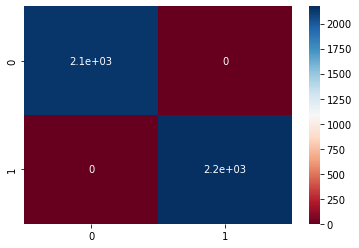

Model : Decision Tree Classifier tunned


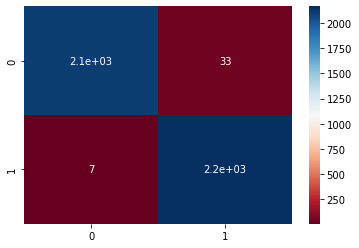

Model : Logistic Regression


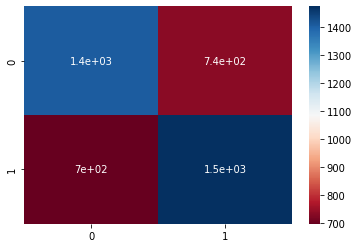

Model : Logistic Regression tunned


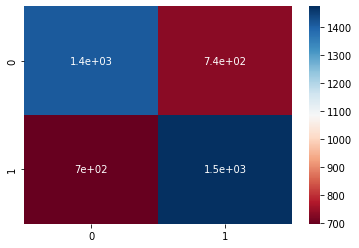

Model : KNN


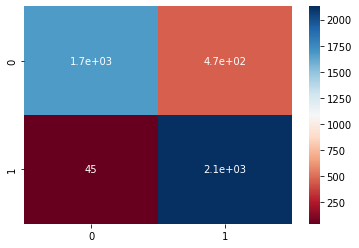

Model : KNN tunned


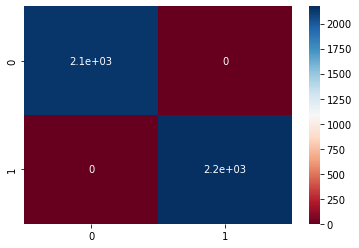

Model : SVC


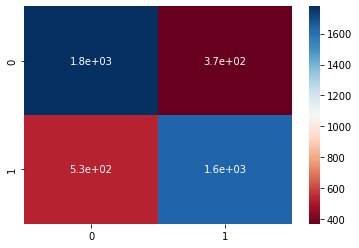

Model : SVC tunned


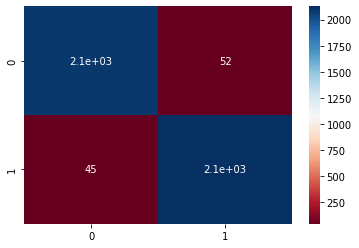

Model : XGB Classifier


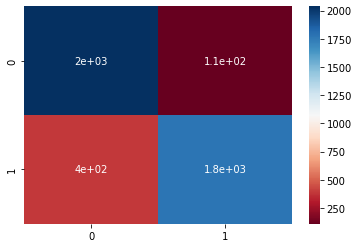

Model : XGB Classifier tunned


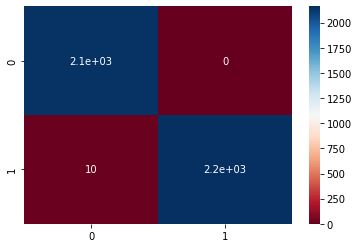

Model : Random Forest


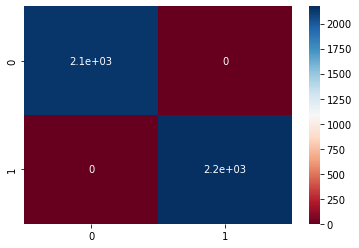

Model : Random Classifier tunned


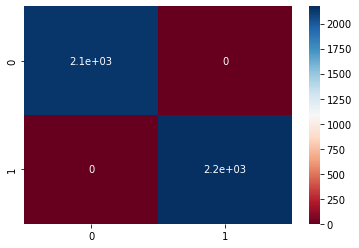

In [270]:
# Train confusion matrix
for name, matrix in train_confusion_matrix.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()

Model : Decision Tree Classifier


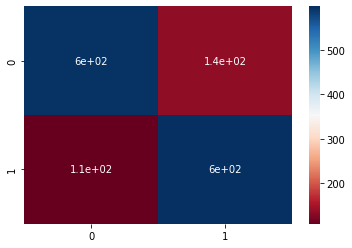

Model : Decision Tree Classifier tunned


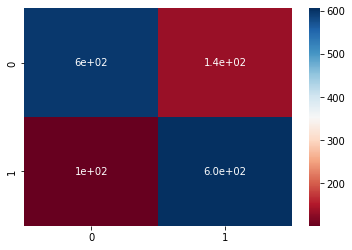

Model : Logistic Regression


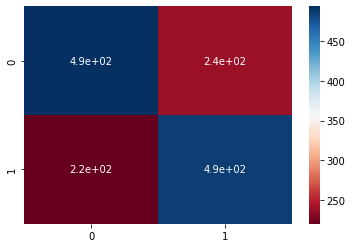

Model : Logistic Regression tunned


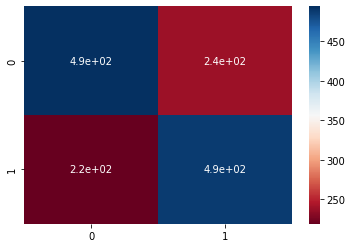

Model : KNN


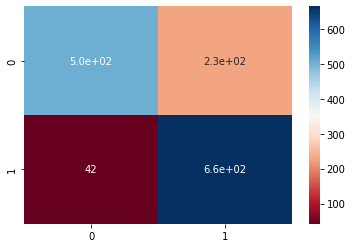

Model : KNN tunned


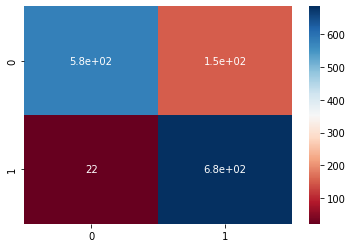

Model : SVC


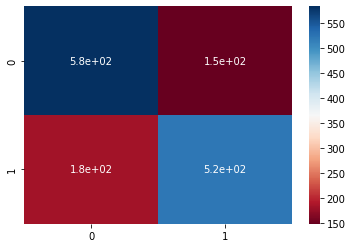

Model : SVC tunned


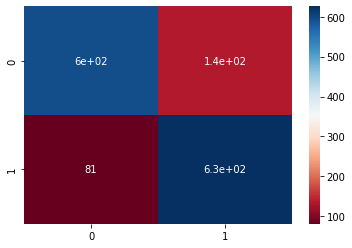

Model : XGB Classifier


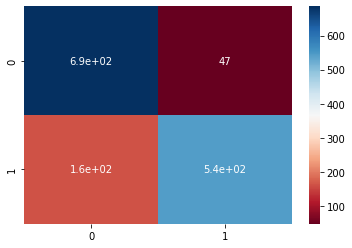

Model : XGB Classifier tunned


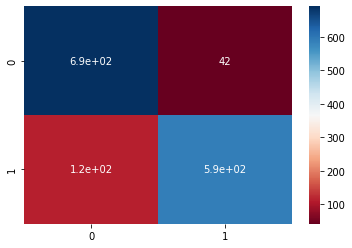

Model : Random Forest


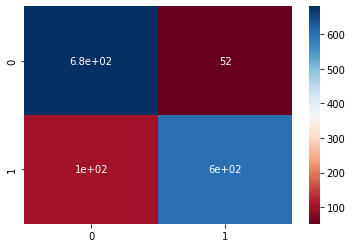

Model : Random Classifier tunned


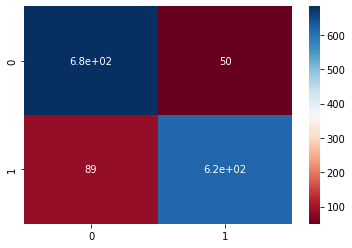

In [271]:
# Test confusion matrix
for name, matrix in test_confusion_matrix.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()
 


Text(0.5, 1.0, 'ROC CURVE')

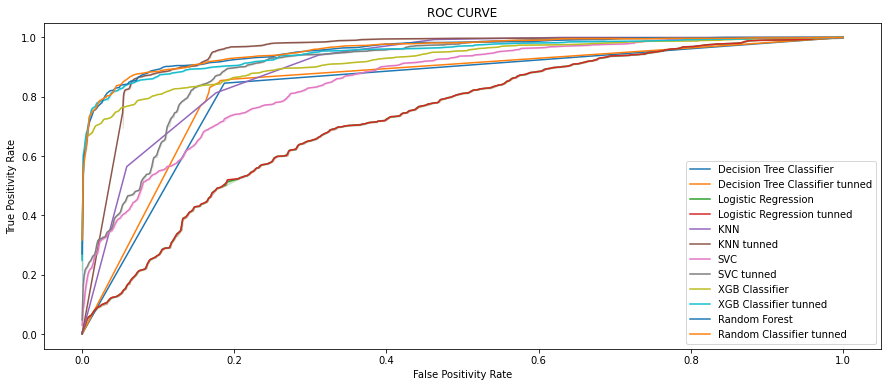

In [272]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')






   ## **Conclusion :**

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.

# **Hyperparameter Tuning**

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  range(5,24),
                                                                      'min_samples_leaf': range(15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5),
          
          'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),
                                                      scoring='accuracy',
                                                      param_grid={'penalty' : ['l1', 'l2', 'elasticnet'],
                                                                  'C' : np.logspace(-4, 4, 20),
                                                                  'solver' : ['lbfgs','newton-cg','liblinear']},
                                                      cv=5),
          
          'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : range(4,10),
                                                   'weights' : ['uniform','distance'],
                                                   'metric' : ['minkowski','euclidean','manhattan']},
                                      cv=5),
          
          'SVC tunned' : RandomizedSearchCV(SVC(probability=True,random_state=42),
                                            param_distributions={'kernel' : ['rbf'],
                                             "C":[0.1, 1, 10, 100, 1000]}, 
                                            n_iter = 50,
                                            cv = 5, 
                                            verbose= 5, 
                                            random_state=42),
          
          'XGB Classifier tunned' : RandomizedSearchCV(XGBClassifier(random_state=42), 
                                                       param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                                                            'gamma': np.arange(0.0,40.0,0.005)},  
                                                       n_iter = 100,
                                                       verbose= 2, 
                                                       scoring="accuracy", 
                                                       cv=5),
          
          'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy', 'gini'],
                                                                'max_depth': [6,9,11,15,17,19,21,24],
                                                                'n_estimators': [50,100],
                                                                'max_features': ["auto", "sqrt", "log2",None,1,3,5,7] },
                                                          scoring='recall',
                                                          cv = 3, 
                                                          verbose= 2
                                                          )}

In [ ]:
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models,'tunning')

In [ ]:
model_table

In [ ]:
# Creating a dictionary for models
models = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
          'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [21],
                                                                      'min_samples_leaf': range(1,15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5)}

In [ ]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

DecisionTreeClassifier(max_depth=21, max_features=0.9, random_state=42)


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.999183       0.827546   
1  Decision Tree Classifier tunned        0.706988       0.663194   
2         Decision Tree Classifier        0.999183       0.827546   
3  Decision Tree Classifier tunned        0.962812       0.847222   
4         Decision Tree Classifier        0.999183       0.827546   
5  Decision Tree Classifier tunned        0.993666       0.828704   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.797778      0.998375     0.860911       0.999188   
1         0.649680        0.600962      0.906174     0.899281       0.705760   
2         1.000000        0.797778      0.998375     0.860911       0.999188   
3         0.984694        0.855362      0.940699     0.822542       0.962948   
4         1.000000        0.797778      0.998375     0.860911       0.999188   
5         0.997544        0.809195      0.989846     0.844125       0.993689   

   Test ROC AUC  Test F1  Train F1  max_depth  min_samples_leaf  max_features  \
0      0.828666      NaN       NaN        NaN               NaN           NaN   
1      0.671117      NaN       NaN        NaN               NaN           NaN   
2      0.828666      NaN       NaN        NaN               NaN           NaN   
3      0.846394      NaN       NaN        NaN               NaN           NaN   
4      0.828666      NaN       NaN        NaN               NaN           NaN   
5      0.829221      NaN       NaN        NaN               NaN           NaN   

   criterion  Test F1   Train F1   
0        NaN  0.828143   0.999187  
1        NaN  0.720461   0.756784  
2        NaN  0.828143   0.999187  
3        NaN  0.838631   0.962194  
4        NaN  0.828143   0.999187  
5        NaN  0.826291   0.993680

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=42),refit=False,
                                                           scoring=['recall','accuracy'],
                                                           param_grid={'max_depth':  [19,21,23],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5, return_train_score=False)
clf.fit(X_train, y_train)


{'mean_fit_time': array([0.01690173, 0.0090415 , 0.01141477, 0.0189281 , 0.00751462,
        0.00696044, 0.01055002, 0.01211181, 0.0129015 , 0.01356888,
        0.01743183, 0.01926417, 0.02022462, 0.00712781, 0.00902729,
        0.0137898 , 0.01309891, 0.01476092, 0.01636291, 0.01980791,
        0.0087019 , 0.01073656, 0.01135664, 0.02133193, 0.00743184,
        0.00750442, 0.00948319, 0.01227837, 0.01340909, 0.01320162,
        0.01614766, 0.01646419, 0.01879191, 0.00708208, 0.00885224,
        0.01192837, 0.01320786, 0.01836476, 0.01702371, 0.01937957,
        0.00917158, 0.00937362, 0.01113811, 0.02244563, 0.00722232,
        0.00731802, 0.00922565, 0.01225357, 0.01293979, 0.01278973,
        0.01490116, 0.01663051, 0.01832976, 0.00840063, 0.00913639,
        0.01113548, 0.01402116, 0.01686082, 0.01654515, 0.01795101,
        0.01240625, 0.01246176, 0.01692071, 0.03034987, 0.00881524,
        0.00888705, 0.0124846 , 0.01745443, 0.01511159, 0.01275988,
        0.01452932, 0.01628361,

In [ ]:
df[['param_criterion','param_max_depth','param_min_samples_leaf','param_max_features','mean_test_accuracy','mean_test_recall']]

param_criterion param_max_depth param_min_samples_leaf param_max_features  \
0              gini              19                      1               auto   
1              gini              19                      1               sqrt   
2              gini              19                      1               log2   
3              gini              19                      1               None   
4              gini              19                      1                0.1   
..              ...             ...                    ...                ...   
115         entropy              23                      1                  3   
116         entropy              23                      1                  4   
117         entropy              23                      1                  5   
118         entropy              23                      1                  6   
119         entropy              23                      1                  7   

     mean_test_accuracy  mean_test_recall  
0              0.836125          0.834681  
1              0.836125          0.834681  
2              0.824682          0.828590  
3              0.843071          0.850937  
4              0.817733          0.807470  
..                  ...               ...  
115            0.814872          0.818432  
116            0.831428          0.839972  
117            0.846139          0.844862  
118            0.837762          0.848514  
119            0.838577          0.839159  

[120 rows x 6 columns]

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.016902      0.008703         0.007243        0.004103   
1         0.009042      0.000278         0.003857        0.000060   
2         0.011415      0.000264         0.003961        0.000162   
3         0.018928      0.000255         0.003778        0.000051   
4         0.007515      0.001020         0.003921        0.000180   
..             ...           ...              ...             ...   
115       0.010723      0.000463         0.002275        0.000008   
116       0.012721      0.000501         0.002295        0.000009   
117       0.015107      0.001210         0.002294        0.000022   
118       0.017293      0.001068         0.002445        0.000335   
119       0.019882      0.001531         0.002741        0.000584   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0              gini              19               auto                      1   
1              gini              19               sqrt                      1   
2              gini              19               log2                      1   
3              gini              19               None                      1   
4              gini              19                0.1                      1   
..              ...             ...                ...                    ...   
115         entropy              23                  3                      1   
116         entropy              23                  4                      1   
117         entropy              23                  5                      1   
118         entropy              23                  6                      1   
119         entropy              23                  7                      1   

                                                params  split0_test_recall  \
0    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
1    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
2    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.817444   
3    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.835700   
4    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.805274   
..                                                 ...                 ...   
115  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.817444   
116  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.821501   
117  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.797160   
118  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.827586   
119  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.825558   

     ...  std_test_recall  rank_test_recall  split0_test_accuracy  \
0    ...         0.014863                53              0.842697   
1    ...         0.014863                53              0.842697   
2    ...         0.012010                75              0.823289   
3    ...         0.017101                 4              0.843718   
4    ...         0.014443               118              0.820225   
..   ...              ...               ...                   ...   
115  ...         0.014667               100              0.821246   
116  ...         0.010705                27              0.828396   
117  ...         0.027558                15              0.826353   
118  ...         0.023599                 8              0.828396   
119  ...         0.010410                32              0.836568   

     split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0                0.839632              0.828396              0.836568   
1                0.839632              0.828396              0.836568   
2                0.840654              0.830439              0.808989   
3                0.845761              0.839632              0.854954   
4                0.819203              0.811032              0.835546   

In [ ]:
# Creating a dataframe
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])


In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df_1,x,y,z,a):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)

  return model_df_1

In [ ]:
for x in range(21,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)                                                            


In [ ]:
model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

In [ ]:
model_df_1['score']=0
for col in ["Train Accuracy Rank","Test Accuracy Rank","Train Precision Rank",
            "Test Precision Rank","Train Recall Rank","Test Recall Rank",
            "Train ROC AUC Rank","Test ROC AUC Rank","Train F1 Rank","Test F1 Rank"]:
   model_df_1['score']= model_df_1['score']+ model_df_1[col]

In [ ]:
temp=model_df_1.sort_values(by='score',ascending=False)

In [ ]:
temp

Model  Train Accuracy  Test Accuracy  \
861   Decision Tree Classifier tunned        0.999074       0.818750   
851   Decision Tree Classifier tunned        0.999074       0.818750   
847   Decision Tree Classifier tunned        1.000000       0.820139   
869   Decision Tree Classifier tunned        1.000000       0.820139   
431   Decision Tree Classifier tunned        0.997684       0.818750   
...                               ...             ...            ...   
1148  Decision Tree Classifier tunned        0.786475       0.715972   
1156  Decision Tree Classifier tunned        0.786475       0.715972   
316   Decision Tree Classifier tunned        0.786475       0.715972   
797   Decision Tree Classifier tunned        0.788328       0.686111   
789   Decision Tree Classifier tunned        0.788328       0.686111   

      Train Precision  Test Precision  Train Recall  Test Recall  \
861          0.999539        0.808864      0.998619     0.826025   
851          0.999539        0.808864      0.998619     0.826025   
847          1.000000        0.799465      1.000000     0.845827   
869          1.000000        0.799465      1.000000     0.845827   
431          0.997698        0.808011      0.997698     0.827440   
...               ...             ...           ...          ...   
1148         0.799904        0.726444      0.767495     0.676096   
1156         0.799904        0.726444      0.767495     0.676096   
316          0.799904        0.726444      0.767495     0.676096   
797          0.798387        0.682927      0.774862     0.673267   
789          0.798387        0.682927      0.774862     0.673267   

      Train ROC AUC  Test ROC AUC   Test F1  ...  Test Accuracy Rank  \
861        0.999076      0.818879  0.817355  ...              1233.5   
851        0.999076      0.818879  0.817355  ...              1233.5   
847        1.000000      0.820594  0.821993  ...              1244.5   
869        1.000000      0.820594  0.821993  ...              1244.5   
431        0.997684      0.818904  0.817610  ...              1233.5   
...             ...           ...       ...  ...                 ...   
1148       0.786590      0.715265  0.700366  ...                21.5   
1156       0.786590      0.715265  0.700366  ...                21.5   
316        0.786590      0.715265  0.700366  ...                21.5   
797        0.788410      0.685883  0.678063  ...                 1.5   
789        0.788410      0.685883  0.678063  ...                 1.5   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
861                1229.5               1043.5             1226.0   
851                1229.5               1043.5             1226.0   
847                1246.5                820.5             1249.5   
869                1246.5                820.5             1249.5   
431                1213.5               1020.5             1219.5   
...                   ...                  ...                ...   
1148                 21.5                 47.5                3.5   
1156                 21.5                 47.5                3.5   
316                  21.5                 47.5                3.5   
797                  17.5                  1.5               10.5   
789                  17.5                  1.5               10.5   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
861             1201.5              1227.5             1232.5         1227.5   
851             1201.5              1227.5             1232.5         1227.5   
847             1241.5              1251.5             1244.5         1251.5   
869             1241.5              1251.5             1244.5         1251.5   
431             1203.5              1220.5             1234.5         1220.5   
...                ...                 ...                ...            ...   
1148              19.5                 5.5               23.5            3.5   
1156            

In [ ]:
temp_1=temp[['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']]
                              

In [ ]:
temp_1

Model  Train Accuracy  Test Accuracy  \
861   Decision Tree Classifier tunned        0.999074       0.818750   
851   Decision Tree Classifier tunned        0.999074       0.818750   
847   Decision Tree Classifier tunned        1.000000       0.820139   
869   Decision Tree Classifier tunned        1.000000       0.820139   
431   Decision Tree Classifier tunned        0.997684       0.818750   
...                               ...             ...            ...   
1148  Decision Tree Classifier tunned        0.786475       0.715972   
1156  Decision Tree Classifier tunned        0.786475       0.715972   
316   Decision Tree Classifier tunned        0.786475       0.715972   
797   Decision Tree Classifier tunned        0.788328       0.686111   
789   Decision Tree Classifier tunned        0.788328       0.686111   

      Train Precision  Test Precision  Train Recall  Test Recall  \
861          0.999539        0.808864      0.998619     0.826025   
851          0.999539        0.808864      0.998619     0.826025   
847          1.000000        0.799465      1.000000     0.845827   
869          1.000000        0.799465      1.000000     0.845827   
431          0.997698        0.808011      0.997698     0.827440   
...               ...             ...           ...          ...   
1148         0.799904        0.726444      0.767495     0.676096   
1156         0.799904        0.726444      0.767495     0.676096   
316          0.799904        0.726444      0.767495     0.676096   
797          0.798387        0.682927      0.774862     0.673267   
789          0.798387        0.682927      0.774862     0.673267   

      Train ROC AUC  Test ROC AUC   Test F1  Train F1  \
861        0.999076      0.818879  0.817355  0.999079   
851        0.999076      0.818879  0.817355  0.999079   
847        1.000000      0.820594  0.821993  1.000000   
869        1.000000      0.820594  0.821993  1.000000   
431        0.997684      0.818904  0.817610  0.997698   
...             ...           ...       ...       ...   
1148       0.786590      0.715265  0.700366  0.783365   
1156       0.786590      0.715265  0.700366  0.783365   
316        0.786590      0.715265  0.700366  0.783365   
797        0.788410      0.685883  0.678063  0.786449   
789        0.788410      0.685883  0.678063  0.786449   

                                             Parameters  
861   {'criterion': 'entropy', 'max_depth': 23, 'max...  
851   {'criterion': 'entropy', 'max_depth': 23, 'max...  
847   {'criterion': 'entropy', 'max_depth': 23, 'max...  
869   {'criterion': 'entropy', 'max_depth': 23, 'max...  
431   {'criterion': 'entropy', 'max_depth': 22, 'max...  
...                                                 ...  
1148  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
1156  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
316   {'criterion': 'gini', 'max_depth': 21, 'max_fe...  
797   {'criterion': 'entropy', 'max_depth': 22, 'max...  
789   {'criterion': 'entropy', 'max_depth': 22, 'max...  

[1260 rows x 12 columns]

In [ ]:
for x in range(5,24):
  for y in range(15):
    for z in ["auto", "sqrt", "log2",None,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)    

KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier(metric='euclidean', n_neighbors=4)
KNeighborsClassifier(metric='manhattan', n_neighbors=4)
KNeighborsClassifier(n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
KNeighborsClassifier()
KNeighborsClassifier(metric='euclidean')
KNeighborsClassifier(metric='manhattan')
KNeighborsClassifier(weights='distance')
KNeighborsClassifier(metric='euclidean', weights='distance')
KNeighborsClassifier(metric='manhattan', weights='distance')
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(metric='euclidean', n_neighbors=6)
KNeighborsClassifier(metric='manhattan', n_neighbors=6)
KNeighborsClassifier(n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
KNeighborsClassifier

In [ ]:
model_df_1

Model  Train Accuracy  Test Accuracy  \
0   Decision Tree Classifier tunned        0.897834       0.806713   
1   Decision Tree Classifier tunned        0.897834       0.806713   
2   Decision Tree Classifier tunned        0.909890       0.824074   
3   Decision Tree Classifier tunned        0.999183       0.822917   
4   Decision Tree Classifier tunned        0.999183       0.822917   
5   Decision Tree Classifier tunned        0.999183       0.857639   
6   Decision Tree Classifier tunned        0.863302       0.780093   
7   Decision Tree Classifier tunned        0.863302       0.780093   
8   Decision Tree Classifier tunned        0.895995       0.826389   
9   Decision Tree Classifier tunned        0.999183       0.807870   
10  Decision Tree Classifier tunned        0.999183       0.807870   
11  Decision Tree Classifier tunned        0.999183       0.854167   
12  Decision Tree Classifier tunned        0.861054       0.785880   
13  Decision Tree Classifier tunned        0.861054       0.785880   
14  Decision Tree Classifier tunned        0.881079       0.825231   
15  Decision Tree Classifier tunned        0.999183       0.807870   
16  Decision Tree Classifier tunned        0.999183       0.807870   
17  Decision Tree Classifier tunned        0.999183       0.857639   
18  Decision Tree Classifier tunned        0.833470       0.766204   
19  Decision Tree Classifier tunned        0.833470       0.766204   
20  Decision Tree Classifier tunned        0.871680       0.809028   
21  Decision Tree Classifier tunned        0.999183       0.800926   
22  Decision Tree Classifier tunned        0.999183       0.800926   
23  Decision Tree Classifier tunned        0.999183       0.843750   
24  Decision Tree Classifier tunned        0.834287       0.766204   
25  Decision Tree Classifier tunned        0.834287       0.766204   
26  Decision Tree Classifier tunned        0.857581       0.800926   
27  Decision Tree Classifier tunned        0.999183       0.806713   
28  Decision Tree Classifier tunned        0.999183       0.806713   
29  Decision Tree Classifier tunned        0.999183       0.846065   
30  Decision Tree Classifier tunned        0.812219       0.751157   
31  Decision Tree Classifier tunned        0.812219       0.751157   
32  Decision Tree Classifier tunned        0.848386       0.797454   
33  Decision Tree Classifier tunned        0.999183       0.791667   
34  Decision Tree Classifier tunned        0.999183       0.791667   
35  Decision Tree Classifier tunned        0.999183       0.837963   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          0.885917        0.785388      0.914703     0.824940       0.897730   
1          0.885917        0.785388      0.914703     0.824940       0.897730   
2          0.926551        0.849604      0.891552     0.772182       0.910003   
3          1.000000        0.768293      0.998375     0.906475       0.999188   
4          1.000000        0.768293      0.998375     0.906475       0.999188   
5          1.000000        0.828125      0.998375     0.889688       0.999188   
6          0.807126        0.720388      0.956946     0.889688       0.862724   
7          0.807126        0.720388      0.956946     0.889688       0.862724   
8          0.867797        0.805492      0.935825     0.844125       0.895749   
9          1.000000        0.742747      0.998375     0.920863       0.999188   
10         1.000000        0.742747      0.998375     0.920863       0.999188   
11         1.000000        0.816993      0.998375     0.899281       0.999188   
12         0.834962        0.754386      0.902112     0.824940       0.860801   
13         0.834962        0.754386      0.902112     0.824940       0.860801   
14         0.893635        0.844560      0.866775     0.781775       0.881167   
15         1.000000        0.748515      0.998375     0.906475       0.999188   
16         1.000000        0.748515      0.998375     0.906475